# Computer Vision - Assignment 2 - Deep Learning for Computer Vision

#### 10 points   |   Due date: November 26, 23:59   |   Submission site: https://pradogrado2324.ugr.es/

### Student's Full Name: <mark>Juan Manuel Rodríguez Gómez</mark>

The goal of this assignment is to learn how to implement and use Convolutional Neural Networks using the fastai library (https://docs.fast.ai/).

<font color='blue'>The goal of this assignmnet is to gain experience designing and training deep neural networks (in particular, convolutional neural networks). From a base network architecture that is provided, you have to learn to perform experiments with it and to improve it by adding, modifying or deleting layers.

<font color='blue'>A help guide (`Assignment_2_HG.ipynb`) is also provided to know how:
1. Basic functions of reading data, training and optimization can be performed;
2. Graphs for the evolution of the classification error in
the training and validation sets can be created;
3. The classification error in the test set can be computed.

In [ ]:
# The first thing we should do is to apply hardware acceleration via GPU. So, we have to go to Editar - Configuracion del Cuaderno - Acelerador por Hardware GPU

# Now we SET UP Fastai
!pip install -Uqq fastbook
!pip install nbdev
import fastbook
fastbook.setup_book()
import fastai
import fastcore
print(f'fastcore version {fastcore.__version__} installed')
print(f'fastai version {fastai.__version__} installed')
from nbdev.showdoc import *
from fastai.vision.all import *

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.1/66.1 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.9 MB/s eta 0:00:00
Mounted at /content/gdrive
fastcore version 1.5.29 installed
fastai version 2.7.13 installed


In [ ]:
# Function to display evaluation metrics
# Developed by Ignacio Oguiza: https://forums.fast.ai/t/plotting-metrics-after-learning/69937

@patch
@delegates(subplots)
def plot_metrics(self: Recorder, nrows=None, ncols=None, figsize=None, **kwargs):
    metrics = np.stack(self.values)
    names = self.metric_names[1:-1]
    n = len(names) - 1
    if nrows is None and ncols is None:
        nrows = int(math.sqrt(n))
        ncols = int(np.ceil(n / nrows))
    elif nrows is None: nrows = int(np.ceil(n / ncols))
    elif ncols is None: ncols = int(np.ceil(n / nrows))
    figsize = figsize or (ncols * 6, nrows * 4)
    fig, axs = subplots(nrows, ncols, figsize=figsize, **kwargs)
    axs = [ax if i < n else ax.set_axis_off() for i, ax in enumerate(axs.flatten())][:n]
    for i, (name, ax) in enumerate(zip(names, [axs[0]] + axs)):
        ax.plot(metrics[:, i], color='#1f77b4' if i == 0 else '#ff7f0e', label='valid' if i > 0 else 'train')
        ax.set_title(name if i > 1 else 'losses')
        ax.legend(loc='best')
    plt.show()



---



---



---



# <font color='blue'>**Exercise 1: BaseNet in CIFAR100 (3 points)**

<font color='blue'>*Dataset:*
In this exercise, we will work with part of the CIFAR100 dataset (https://www.cs.toronto.edu/~kriz/cifar.html). This dataset consists of 60K color images of 32x32x3 (RGB) depicting 100 different classes (600 images per class). There are 50K images for training and 10K for testing. For the development of the exercise we will only consider 25 classes (out of 100). Therefore, the training set has 12,500 images and the test set 2,500 images. 10% of the training set will be used for validation.

<font color='blue'>**Model BaseNet:**
We start by creating a base model called *BaseNet* which, after its training and execution, will give us a classification error which will be used as reference or baseline for further improvements.

<font color='blue'>Our BaseNet model consists of two convolutional blocks (Conv+ReLU) at different scales (MaxPooling), and one head composed of two fully-connected (FC) layers (also called dense layers). The precise architecture is defined in the table below:

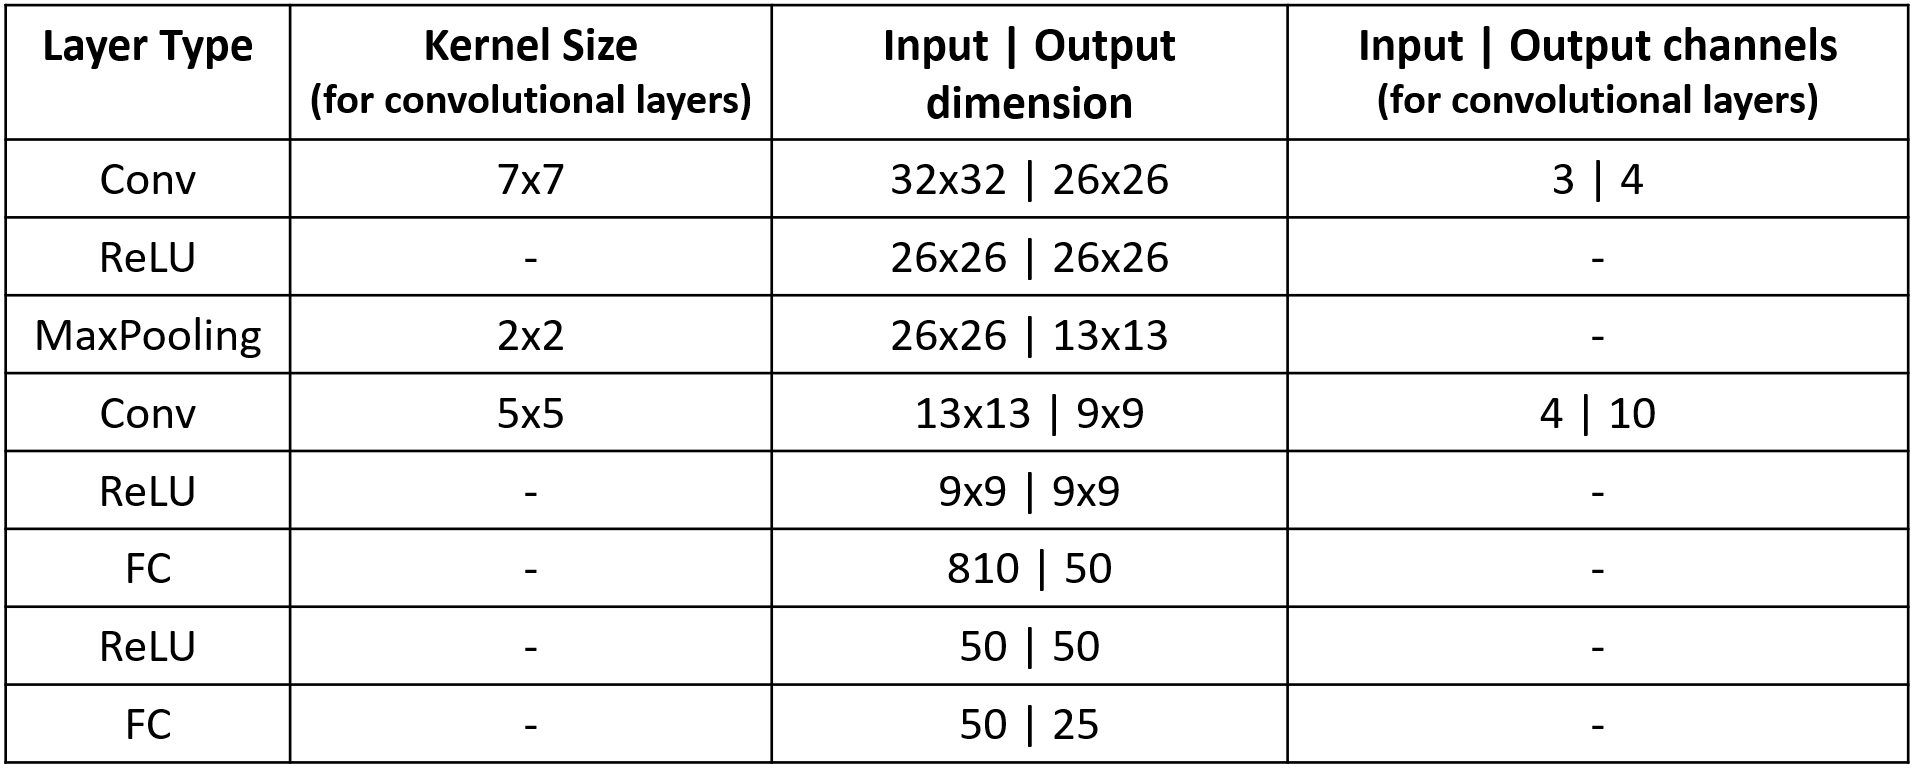


<font color='blue'>The students must:
1. Become familiar with the *BaseNet* architecture described above, the meaning of the different hyperparameters and the purpose of each layer. Create the code for the *BaseNet* model employing the fastai library.
2. Train the model (justifying all decisions made) and evaluate its performance. To do so, you should employ: the confusion matrix in training and testing; the accuracy in training, validation and test; and the evolution of both the loss function (in training and validation) and accuracy (in validation) with respect to the training epochs.

<font color='blue'>Note: This is the base model that we will try to improve in the next section. In this sense, it is not necessary to carry out a very sophisticated or complex training procedure. In any case, it is not advisable to use the default values of functions without having a justification for it. One must demonstrate that he/she understands what is doing, as well as what the framework does underneath.

In [ ]:
# We get the CIFAR100 dataset
path = untar_data(URLs.CIFAR_100,force_download=True)

In [ ]:
# The CIFAR_100 dataset, as well as the MNIST dataset, follows a common layout for machine learning datasets:
# separate folders for the training set and the validation set (and/or test set).
# Let's see what's inside both the training and test sets
print(path)
print(path.ls())
print((path/'train').ls())
print((path/'test').ls())
train_classes = (path/'train').ls()
test_classes = (path/'test').ls()
print(len(train_classes))

/root/.fastai/data/cifar100
[Path('/root/.fastai/data/cifar100/test'), Path('/root/.fastai/data/cifar100/train')]
[Path('/root/.fastai/data/cifar100/train/food_containers'), Path('/root/.fastai/data/cifar100/train/small_mammals'), Path('/root/.fastai/data/cifar100/train/vehicles_2'), Path('/root/.fastai/data/cifar100/train/medium_mammals'), Path('/root/.fastai/data/cifar100/train/large_man-made_outdoor_things'), Path('/root/.fastai/data/cifar100/train/fish'), Path('/root/.fastai/data/cifar100/train/reptiles'), Path('/root/.fastai/data/cifar100/train/fruit_and_vegetables'), Path('/root/.fastai/data/cifar100/train/vehicles_1'), Path('/root/.fastai/data/cifar100/train/household_electrical_devices'), Path('/root/.fastai/data/cifar100/train/people'), Path('/root/.fastai/data/cifar100/train/large_natural_outdoor_scenes'), Path('/root/.fastai/data/cifar100/train/trees'), Path('/root/.fastai/data/cifar100/train/large_carnivores'), Path('/root/.fastai/data/cifar100/train/large_omnivores_and_her


"This dataset is just like the CIFAR-10, except it has 100 classes containing 600 images each. There are 500 training images and 100 testing images per class. The 100 classes in the CIFAR-100 are grouped into 20 superclasses. Each image comes with a "fine" label (the class to which it belongs) and a "coarse" label (the superclass to which it belongs)." https://github.com/fastai/dlcert2/blob/master/docs/datasets.md

In [ ]:
# We want to verify that within each of the 20 superclasses there are 5 classes,
# which gives the 100 classes there are. We also want to verify that the number of images is correct
print('Classes within the first superclass (',train_classes[0],'): ', train_classes[0].ls())
for i in range(20):
  print('Number of classes within superclass ',i,': ', len(train_classes[i].ls()))
files_train = get_image_files(path/'train')
files_test = get_image_files(path/'test')
print('Total training images: ', len(files_train))
print('Total test images: ', len(files_test))

Classes within the first superclass ( /root/.fastai/data/cifar100/train/food_containers ):  [Path('/root/.fastai/data/cifar100/train/food_containers/plate'), Path('/root/.fastai/data/cifar100/train/food_containers/can'), Path('/root/.fastai/data/cifar100/train/food_containers/bottle'), Path('/root/.fastai/data/cifar100/train/food_containers/cup'), Path('/root/.fastai/data/cifar100/train/food_containers/bowl')]
Number of classes within superclass  0 :  5
Number of classes within superclass  1 :  5
Number of classes within superclass  2 :  5
Number of classes within superclass  3 :  5
Number of classes within superclass  4 :  5
Number of classes within superclass  5 :  5
Number of classes within superclass  6 :  5
Number of classes within superclass  7 :  5
Number of classes within superclass  8 :  5
Number of classes within superclass  9 :  5
Number of classes within superclass  10 :  5
Number of classes within superclass  11 :  5
Number of classes within superclass  12 :  5
Number of c

In [ ]:
# We keep the first 25 classes (we remove the last 75 from the dataset)
#https://stackoverflow.com/questions/185936/how-to-delete-the-contents-of-a-folder
import shutil
number_of_classes_to_keep = 25
number_of_superclasses_to_keep = int(number_of_classes_to_keep/5)
print('REMOVED SUPERCLASSES:')
for i in range(number_of_superclasses_to_keep,len(train_classes)):
  print(train_classes[i])
  shutil.rmtree(train_classes[i])
print('SUPERCLASSES WE KEEP:')
for i in range(number_of_superclasses_to_keep):
  print(train_classes[i])

REMOVED SUPERCLASSES:
/root/.fastai/data/cifar100/train/fish
/root/.fastai/data/cifar100/train/reptiles
/root/.fastai/data/cifar100/train/fruit_and_vegetables
/root/.fastai/data/cifar100/train/vehicles_1
/root/.fastai/data/cifar100/train/household_electrical_devices
/root/.fastai/data/cifar100/train/people
/root/.fastai/data/cifar100/train/large_natural_outdoor_scenes
/root/.fastai/data/cifar100/train/trees
/root/.fastai/data/cifar100/train/large_carnivores
/root/.fastai/data/cifar100/train/large_omnivores_and_herbivores
/root/.fastai/data/cifar100/train/non-insect_invertebrates
/root/.fastai/data/cifar100/train/flowers
/root/.fastai/data/cifar100/train/insects
/root/.fastai/data/cifar100/train/aquatic_mammals
/root/.fastai/data/cifar100/train/household_furniture
SUPERCLASSES WE KEEP:
/root/.fastai/data/cifar100/train/food_containers
/root/.fastai/data/cifar100/train/small_mammals
/root/.fastai/data/cifar100/train/vehicles_2
/root/.fastai/data/cifar100/train/medium_mammals
/root/.fasta

In [ ]:
# We also remove the classes from the test set
for i in range(number_of_superclasses_to_keep,len(test_classes)):
  print(test_classes[i])
  shutil.rmtree(test_classes[i])

/root/.fastai/data/cifar100/test/fish
/root/.fastai/data/cifar100/test/reptiles
/root/.fastai/data/cifar100/test/fruit_and_vegetables
/root/.fastai/data/cifar100/test/vehicles_1
/root/.fastai/data/cifar100/test/household_electrical_devices
/root/.fastai/data/cifar100/test/people
/root/.fastai/data/cifar100/test/large_natural_outdoor_scenes
/root/.fastai/data/cifar100/test/trees
/root/.fastai/data/cifar100/test/large_carnivores
/root/.fastai/data/cifar100/test/large_omnivores_and_herbivores
/root/.fastai/data/cifar100/test/non-insect_invertebrates
/root/.fastai/data/cifar100/test/flowers
/root/.fastai/data/cifar100/test/insects
/root/.fastai/data/cifar100/test/aquatic_mammals
/root/.fastai/data/cifar100/test/household_furniture


In [ ]:
# Now we check if we have remove them correctly
print(path)
train_classes = (path/'train').ls()
test_classes = (path/'test').ls()
print(len(train_classes))
print(len(test_classes))

/root/.fastai/data/cifar100
5
5


In [ ]:
# And that the number of examples in training and test is correct
print('Classes within the first superclass (',train_classes[0],'): ', train_classes[0].ls())
files_train = get_image_files(path/'train')
files_test = get_image_files(path/'test')
print('Total training images: ', len(files_train))
print('Total test images: ', len(files_test))

Classes within the first superclass ( /root/.fastai/data/cifar100/train/food_containers ):  [Path('/root/.fastai/data/cifar100/train/food_containers/plate'), Path('/root/.fastai/data/cifar100/train/food_containers/can'), Path('/root/.fastai/data/cifar100/train/food_containers/bottle'), Path('/root/.fastai/data/cifar100/train/food_containers/cup'), Path('/root/.fastai/data/cifar100/train/food_containers/bowl')]
Total training images:  12500
Total test images:  2500


## **1.1. Preparación y Carga de Datos**

Tal y como se explica en el enunciado, en este ejercicio, trabajaremos con parte del conjunto de datos CIFAR100 (Canadian Institute for Advanced Research - 100 classes):

https://www.cs.toronto.edu/~kriz/cifar.html

Este conjunto de datos consta de 60 000 imágenes a color de 32 x 32 x 3 (RGB) que representan 100 clases diferentes (600 imágenes por clase, estando cada una de las 100 clases igualmente distribuida en los conjuntos de entrenamiento y prueba). Las 100 clases se dividen en 20 superclases, y cada superclase contiene cinco clases individuales. Hay 50 000 imágenes para entrenamiento y 10 000 para pruebas. Para el desarrollo del ejercicio, solo consideraremos 25 clases (de 100 posibles). Por lo tanto, el conjunto de entrenamiento tiene 12 500 imágenes y el conjunto de prueba tiene 2 500 imágenes. Se utilizará un 10% del conjunto de entrenamiento para la validación.

Es un conjunto de datos diseñado para la tarea de clasificación de imágenes. Además, como las imágenes son relativamente pequeñas (32 x 32 píxeles), hace que la tarea de clasificación sea un desafío interesante para modelos de deep learning. CIFAR100 se utiliza comúnmente como un benchmark en el campo de visión por computador.

### **1.1.1. DataBlock**

La función `DataBlock()` de FastAI es una función que simplifica la preparación y carga de datos para entrenar modelos de deep learning. Al definir un DataBlock, se encapsula toda la lógica relacionada con la preparación de datos en un solo lugar, facilitando así la experimentación y modificación del dataset sin tener que cambiar el código en varios lugares.

Los principales parámetros de esta función (y los que usamos en nuestra definición del DataBlock) son los siguientes:

- `blocks`: Especifica los tipos de bloques de datos que se utilizarán. En nuestro caso, utilizamos `(ImageBlock, CategoryBlock)`, lo que indica que trabajamos con imágenes (para la entrada del modelo) y categorías (para la salida del modelo).

- `get_items`: Especifica cómo obtener los elementos (en nuestro caso, archivos de imágenes) que se utilizarán para construir el conjunto de datos. La función `get_image_files` se utiliza para obtener la lista de archivos de imágenes.

- `splitter`: Define cómo dividir el conjunto de datos en conjuntos de entrenamiento y validación. En nuestro caso, usamos la función `RandomSplitter(valid_pct = 0.1, seed = 42)`, la cual divide aleatoriamente el conjunto de datos, asignando el 10% de las muestras para validación (el cual parece un valor razonable teniendo en cuenta el tamaño de entrenamiento) y utilizando una semilla fija (seed = $42$) para asegurar reproducibilidad (es decir, garantizar que los experimentos sean consistentes y que los resultados puedan ser verificados por otros).

- `get_y`: Especifica cómo obtener las etiquetas de los datos. `parent_label` se utiliza para extraer las etiquetas de las carpetas padres de los archivos de imágenes.

Para más información, se puede consultar la siguiente documentación de FastAI:

[1] https://docs.fast.ai/data.block.html#general-api

[2] https://docs.fast.ai/data.transforms.html#get_image_files

[3] https://docs.fast.ai/data.transforms.html#parent_label

[4] https://docs.fast.ai/tutorial.datablock.html

### **1.1.2. DataLoad**

Por otra parte, en FastAI, el método `dataloaders()` se utiliza para crear un objeto `DataLoad`, que representa los datos listos para ser utilizados en el entrenamiento y la validación de modelos de deep learning. Este objeto encapsula tanto el conjunto de entrenamiento como el conjunto de validación, junto con la lógica asociada definida en el `DataBlock` para cargar y procesar los datos en lotes (batches) durante el entrenamiento. Gracias a esto, se permite el uso de la GPU de manera efectiva al cargar datos en paralelo durante el entrenamiento. Si analizamos la línea de código que usamos en nuestro caso:

`train_val_CIFAR100dl = CIFAR100db.dataloaders(path/'train', bs=32)`

- `CIFAR100db` es el objeto DataBlock definido previamente, en el cual se especifica cómo se deben cargar y procesar los datos.

- `dataloaders()` es un método del objeto DataBlock que toma como entrada la ubicación de los datos `(path/'train')` y otros parámetros, en nuestro caso, `bs = 32` que establece el tamaño del lote (batch size) en 32 imágenes (sabemos que es una buena práctica usar potencias de dos para el batch size, por lo que se ha escogido un tamaño de batch size de $32 = 2^6$ imágenes).

Para más información, se puede consultar la siguiente documentación de FastAI:

[5] https://docs.fast.ai/data.block.html#datablock.dataloaders

[6] https://docs.fast.ai/data.load.html

In [ ]:
# Definición del Datablock
CIFAR100db = DataBlock(
                    blocks    = (ImageBlock, CategoryBlock),                  # Definir el tipo de bloque de datos (Entradas del modelo: Imágenes | Salidas del modelo: Categorías)
                    get_items = get_image_files,                              # Leer todas las imágenes en las subcarpetas de "path"
                    splitter  = RandomSplitter(valid_pct = 0.1, seed = 42),   # Dividimos los datos aleatoriamente entre entrenamiento (90%) y validación (10%)
                    get_y     = parent_label                                  # Crear las etiquetas
             )

# Definición del DataLoad para el conjunto de datos de entrenamiento y el conjunto de datos de validación
train_val_CIFAR100dl = CIFAR100db.dataloaders(path/'train', bs = 32)   # Crear el DataLoad a partir del DataBlock en batches con un tamaño de 32 imágenes

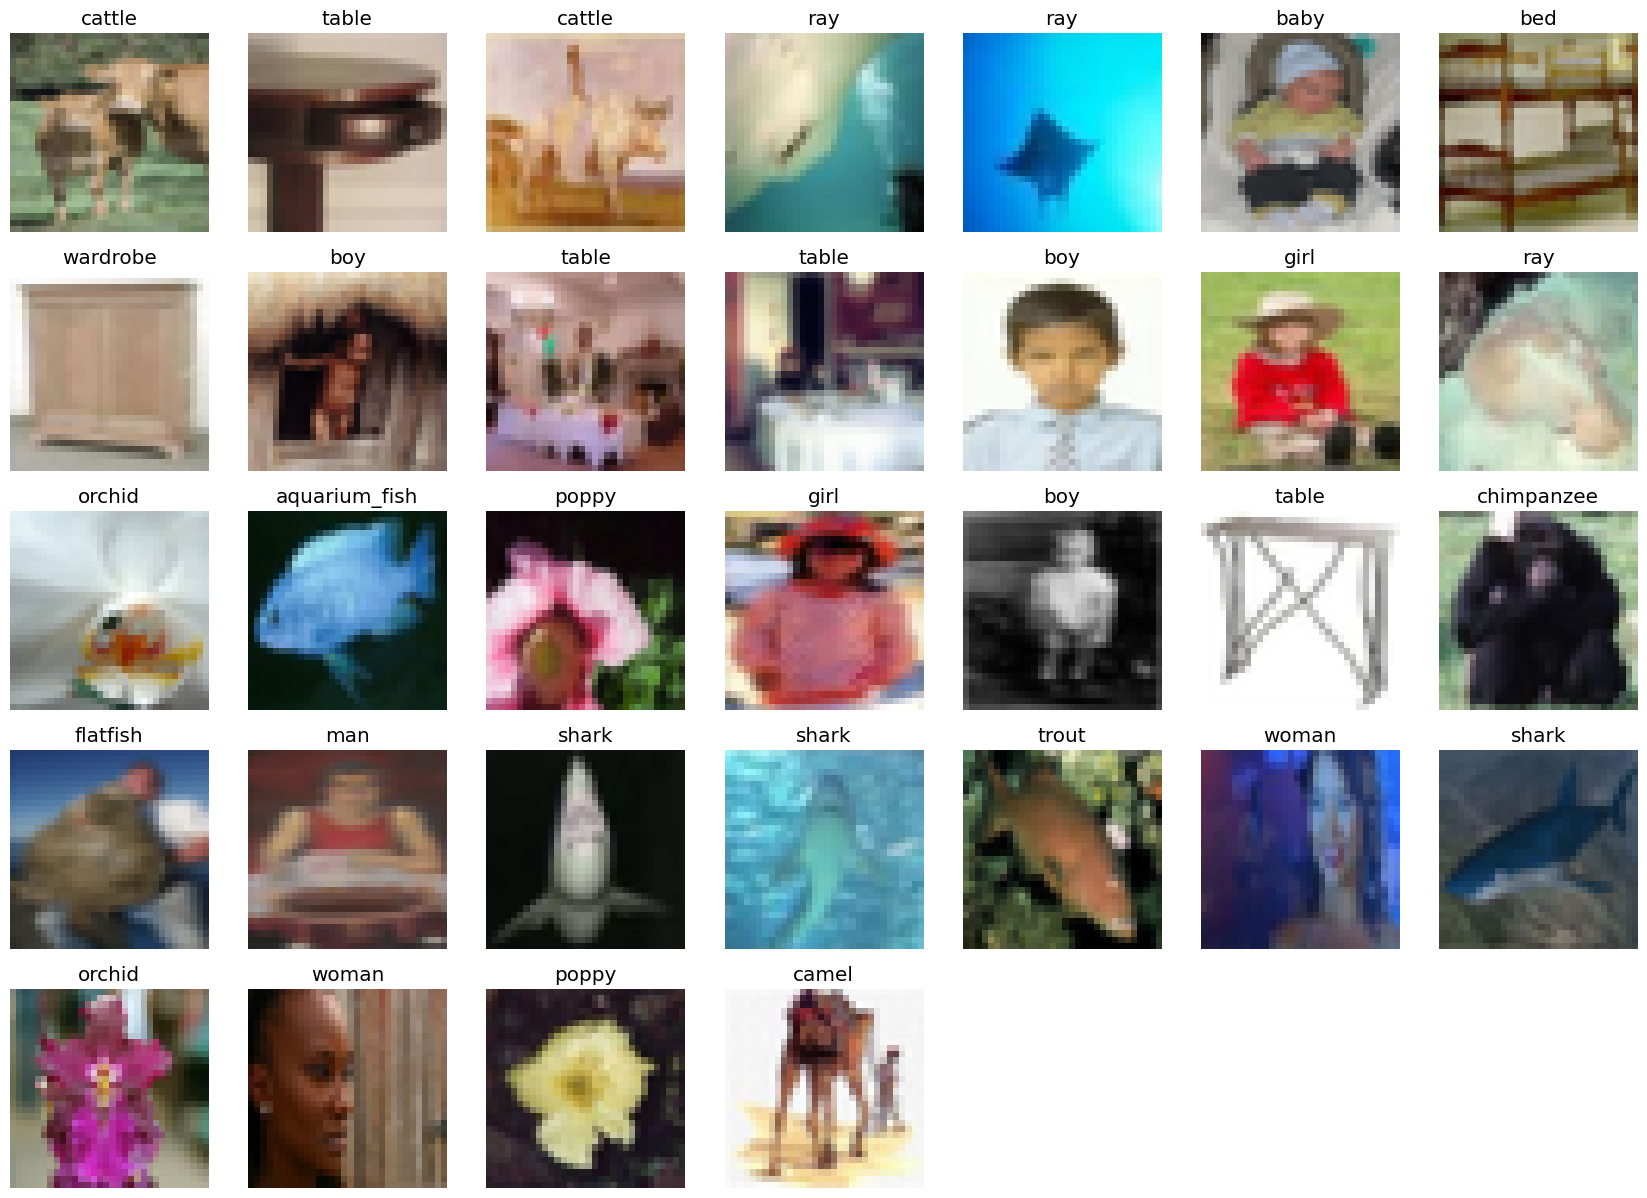

In [ ]:
# Muestra un batch de imágenes del conjunto de entrenamiento
train_val_CIFAR100dl.train.show_batch(max_n = 32)

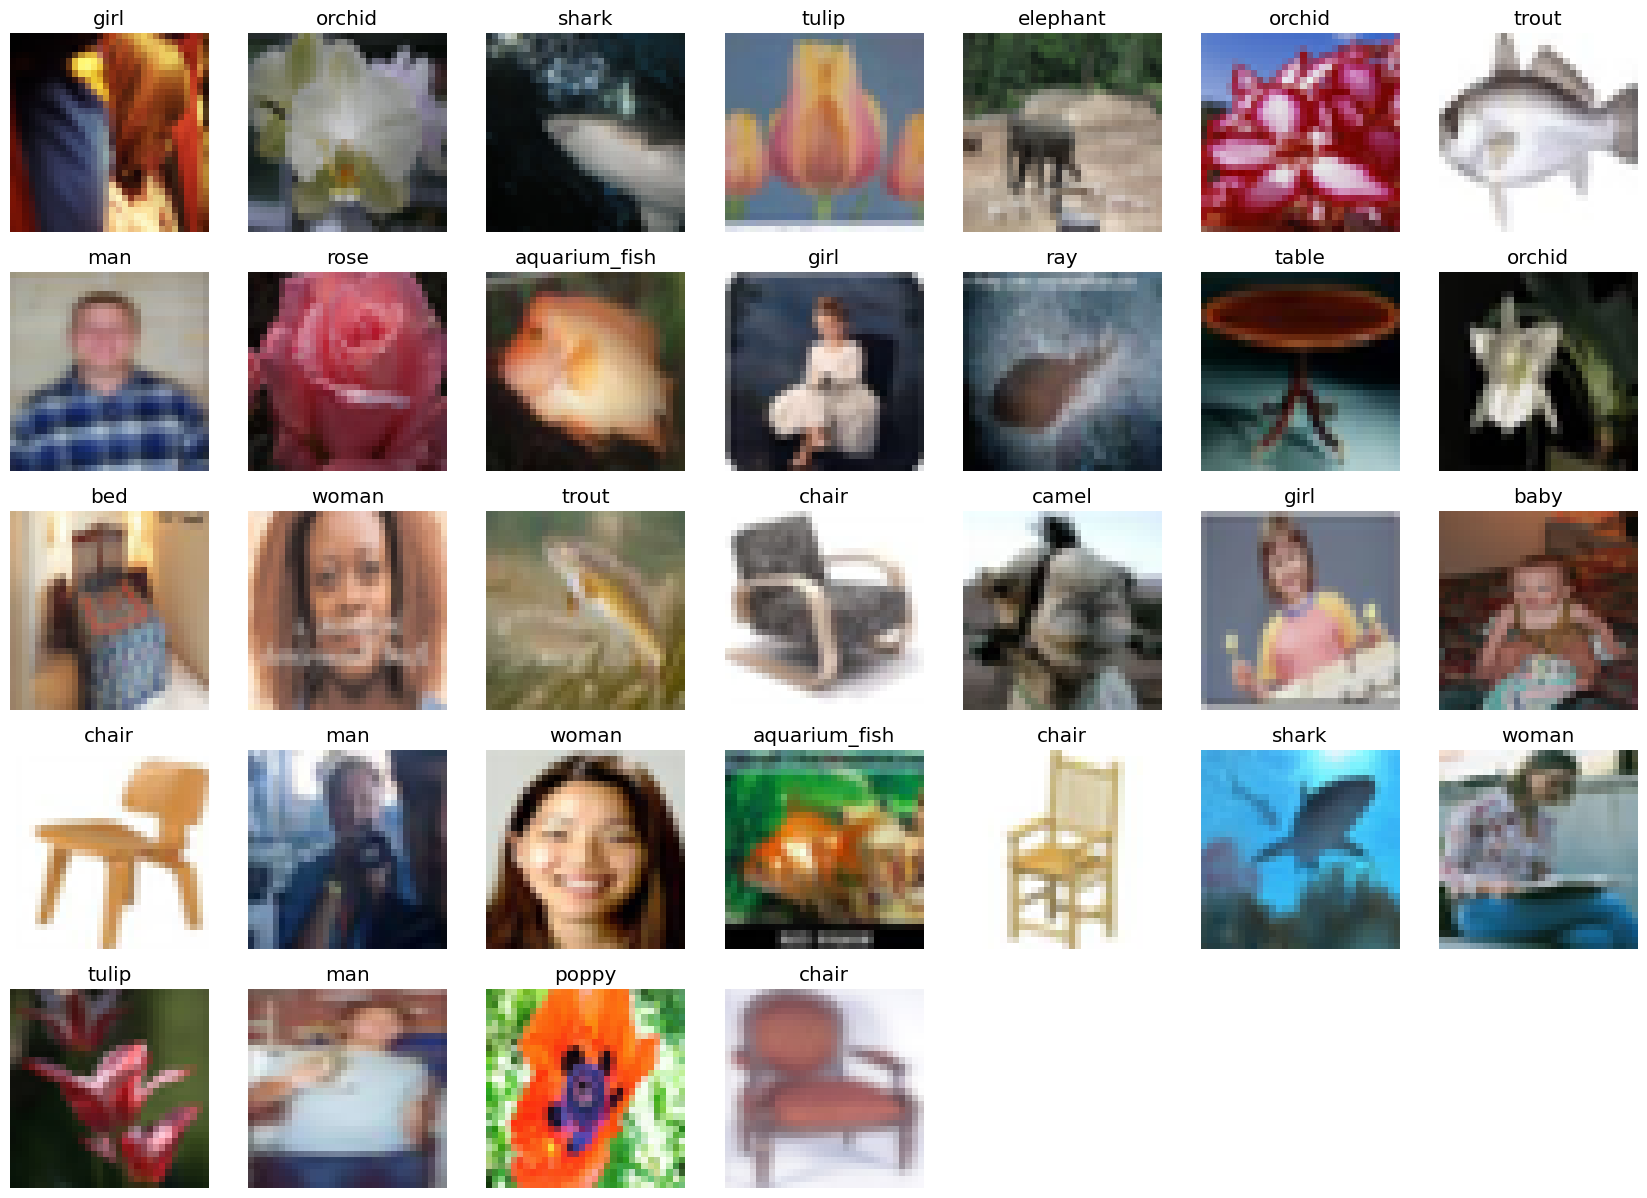

In [ ]:
# Muestra un batch de imágenes del conjunto de validación
train_val_CIFAR100dl.valid.show_batch(max_n = 32)

## **1.2. Definición del Modelo**

Como se explica en el enunciado, nuestro modelo BaseNet consiste en dos bloques convolucionales (Conv + ReLU) a diferentes escalas (MaxPooling), y un head compuesto de dos capas totalmente conectadas (en inglés, fully-connected, FC, también llamadas capas densas). Siguiendo la arquitectura precisada en la tabla del enunciado, la definición del modelo BaseNet en FastAI sería la siguiente:

In [ ]:
# Creación el modelo baseNet desde cero
baseNet = sequential(
    nn.Conv2d(in_channels = 3, out_channels = 4, kernel_size = (7,7)),  # Capa 1: Convolución
    nn.ReLU(),                                                          # Capa 2: Función de Activación ReLU
    nn.MaxPool2d(kernel_size = (2,2)),                                  # Capa 3: Agrupación Máxima (MaxPooling2D 2x2)
    nn.Conv2d(in_channels = 4, out_channels = 10, kernel_size = (5,5)), # Capa 4: Convolución
    nn.ReLU(),                                                          # Capa 5: Función de Activación ReLU
    nn.Flatten(),                                                       # Capa 6: Pasar de tensor tridimensional a tensor unidimensional (vector 1D)
    nn.Linear(in_features = 810, out_features = 50),                    # Capa 7: Fully-Connected
    nn.ReLU(),                                                          # Capa 8: Función de Activación ReLU
    nn.Linear(in_features = 50, out_features = 25)                      # Capa 9: Fully-Connected (25 clases de salida)
    # nn.Softmax()  No es necesaria la capa Softmax (explicación en la respuesta de la segunda pregunta de este primer ejercicio)
)

Procedemos a describir cada capa del modelo con más detalle:



### **1.2.1. Función `sequential()`**

En FastAI, `sequential()` es una función que se utiliza para construir una secuencia lineal de capas en un modelo de deep learning. La salida de una capa es la entrada de la siguiente. De esta forma, dicha función toma una serie de capas como argumentos y las ejecuta en orden para formar el modelo completo.

Para más información, se puede consultar la siguiente documentación de FastAI y PyTorch:

[7] https://docs.fast.ai/layers.html#sequential-extensions

[8] https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html#torch.nn.Sequential

### **1.2.2. Módulo `nn`**

El `nn.` en `nn.Conv2d()` y el resto de capas de nuestro modelo BaseNet se refiere al módulo `nn` (neural network) de PyTorch. DIcho módulo proporciona las herramientas y bloques de construcción básicos para construir y entrenar redes neuronales. El módulo `nn` incluye definiciones de capas, funciones de pérdida, optimizadores y otras utilidades para trabajar con redes neuronales.

Para más información, se puede consultar la siguiente documentación de PyTorch:

[9] https://pytorch.org/docs/stable/nn.html

### **1.2.3. Método `Conv2d()`**

El método `Conv2d()` en PyTorch (y, por lo tanto, también en FastAI, que recordemos que es una API basada en PyTorch)  representa una capa de convolución en una red neuronal convolucional (CNN). Esta capa se utiliza para extraer características espaciales de las imágenes de entrada mediante el uso de filtros convolucionales.

Los parámetros más comunes utilizados en dicho método son los siguientes:

- `in_channels`: Número de canales en la imagen de entrada. Por ejemplo, una imagen en escala de grises tendría 1 canal, mientras que una imagen en color RGB tendría 3 canales (como se tiene en la primera declaración de dicho método en nuestro modelo BaseNet).

- `out_channels`: Número de canales producidos por la convolución (es decir, el número de filtros). Cada filtro detecta diferentes características en la imagen.

- `kernel_size`: Tamaño del filtro o kernel. Puede ser un solo número (como es nuestro caso, donde se asume que el kernel es cuadrado) o una tupla de dos números especificando la altura y la anchura del kernel.

- `stride`: Número de píxeles que el filtro se mueve horizontalmente y verticalmente en cada paso durante la convolución. Si no se especifica, se toma por defecto `stride = 1`, lo que significa que el filtro se mueve de píxel en píxel.

- `padding`: Cantidad de relleno alrededor de la imagen de entrada antes de aplicar la convolución. El relleno ayuda a mantener el tamaño de la imagen después de la convolución. Si no se especifica, se toma por defecto `padding = 0`, lo que significa que se rellena con ceros.

- `bias`: Booleano que indica si la capa debe incluir un término de sesgo o no. Si no se especifica, se toma por defecto `bias = True`.

- `padding_mode`: Método de relleno (si se especifica `padding`). Puede ser 'zeros' o 'circular', entre otros. Si no se especifica, se toma por defecto `padding_mode = zeros`.

Se observa que el número de canales de entrada en la primera capa de convolución es 3 debido a que estamos leyendo imágenes en color RGB. El número de canales producidos tras dicha convolución es cuatro, siendo esta cantidad el número de canales de entrada de la próxima capa de convolución. El número de canales de salida tras esta segunda capa de convolución es 10. Si tuviésemos una tercera capa de convolución (no es el caso), el número de canales de entrada de dicha capa, sería el número de canales de salida de la anterior capa (la segunda), siendo 10 en nuestro caso, y así sucesivamente en caso de tener más capas de convolución.

Para más información, se puede consultar la siguiente documentación de PyTorch:

[10] https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html#torch.nn.Conv2d

### **1.2.4. Método `ReLU()`**

El método `ReLU()` en PyTorch representa la función de activación ReLU (Rectified Linear Unit). Esta es una función no lineal comúnmente utilizada en redes neuronales para introducir no linealidades en el modelo. La función ReLU se define matemáticamente como $f(x) = max(0,x)$. En otras palabras, si el valor de entrada $x$ es positivo, la salida de la función es igual a $x$ y si
el valor de entrada $x$ es negativo, la salida es igual a cero.

La mayor ventaja que aporta esta función de activación es su bajo coste computacional: Comparada con funciones de activación más complejas, como la función sigmoide o la tangente hiperbólica, la función ReLU es computacionalmente eficiente y fácil de calcular. Además, no sufre del problema de desvanecimiento del gradiente que puede afectar a funciones de activación saturadas.

Esta función de activación se aplica elemento por elemento a la salida de cada neurona, introduciendo no linealidades y permitiendo que la red capture patrones y características más complejas en los datos.

Para más información, se puede consultar la siguiente documentación de PyTorch:

[11] https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html#torch.nn.ReLU



### **1.2.5. Método `MaxPool2d()`**

El método `MaxPool2d()` en PyTorch representa una capa de agrupación máxima (max pooling) en dos dimensiones, y se utiliza comúnmente en arquitecturas de redes neuronales convolucionales para reducir la dimensionalidad espacial de las representaciones de las capas anteriores. La operación de agrupación máxima opera sobre regiones locales de la entrada y selecciona el valor máximo de cada región. Esto se hace por separado para cada canal de la entrada.

Los parámetros más comunes utilizados en dicho método son los siguientes:

- `kernel_size`: El tamaño de la ventana sobre la cual se aplica la operación de agrupación máxima. Puede ser un solo número (en cuyo caso se asume que la ventana es cuadrada) o una tupla de dos números especificando la altura y la anchura de la ventana.

- `stride`: El paso de la ventana durante la operación de agrupación (cuántos píxeles se desplaza la ventana en cada dirección). Similar al parámetro `stride` en `Conv2d()`. Si no se especifica, se toma por defecto `stride = None`.

- `padding`: Cantidad de relleno de alrededor de la entrada antes de aplicar la operación de agrupación. Al igual que en `Conv2d()`, el relleno ayuda a mantener el tamaño de la salida. Si no se especifica, se toma por defecto `padding = 0`.

La función principal de la capa de agrupación máxima es reducir la dimensionalidad espacial de la entrada al seleccionar los valores máximos en regiones locales (reduce la cantidad de información espacial en la representación, manteniendo de esta forma las características más importantes), consiguiendo así invarianza a pequeñas traslaciones y reducción del número de parámetros y de la carga computacional en las capas subsiguientes de la red.

Para más información, se puede consultar la siguiente documentación de PyTorch:

[12] https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html#torch.nn.MaxPool2d


### **1.2.6. Método `Flatten()`**

El método `Flatten()` en PyTorch representa una capa simple que se utiliza para transformar un tensor tridimensional, resultado de las capas convolucionales o de agrupación, en un tensor unidimensional (es decir, un vector 1D), el cual puede ser utilizado como entrada para las capas completamente conectadas (fully-connected).

Por ejemplo, si se tiene un tensor tridimensional de la forma $(canales, altura, anchura)$, el méotodo `Flatten()` lo transformará en un tensor unidimensional $(canales * altura * anchura)$.

Para más información, se puede consultar la siguiente documentación de PyTorch:

[13] https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html#torch.nn.Flatten

### **1.2.7. Método `Linear()`**

El método `Linear()` en PyTorch representa una capa totalmente conectada (fully-connected). Esta capa realiza una transformación lineal de los datos de entrada de la siguiente forma: Multiplica un vector 1D con los datos de entrada por una matriz de pesos y a esto se le suma un sesgo (bias). Matemáticamente, la operación se expresa de la siguiente manera:

$$output = input ⋅ weight^T + bias,$$

donde:

- $input$ es el tensor de entrada.
- $weight$ es la matriz de pesos (parámetros entrenables de la capa).
- $bias$ es el sesgo (término constante que se suma).

Los parámetros más comunes utilzados en dicho método son los siguientes:

- `in_features`: Número de características en la entrada.

- `out_features`: Número de características en la salida. Este parámetro determina la forma de la matriz de pesos.

- `bias`: Booleano que indica si la capa debe incluir un término de sesgo o no. Si no se especifica, se toma por defecto `bias = True`.

Para más información, se puede consultar la siguiente documentación de PyTorch:

[14] https://pytorch.org/docs/stable/generated/torch.nn.Linear.html#torch.nn.Linear

### **1.2.8. Método `Softmax()`**

El método `Softmax()` implementa la función de activación softmax. Esta función es utilizada comúnmente en la capa de salida de una red neuronal, especialmente en problemas de clasificación con múltiples clases. La función softmax toma un vector de números reales y los convierte en una distribución de probabilidad, asignando probabilidades a cada clase en un problema de clasificación.

La fórmula matemática de la función softmax aplicada a un vector z de K elementos es la siguiente:

$$\sigma: \mathbb {R}^K \longrightarrow [0,1]^ K$$

$$\sigma (x)_i = \frac{e^{x_i}}{\sum_{j=1}^K e^{x_j}},$$

para cada componente $j$-ésima del vector $x$.

Así, función softmax produce un nuevo vector del mismo tamaño que
z, donde cada componente del nuevo vector está en el rango $[0,1]$ y la suma de todas las componentes de dicho nuevo vector es igual a 1, formando así una distribución de probabilidad.

Cabe destacar también que la función softmax es diferenciable, lo que es esencial para el entrenamiento de la red neuronal mediante algoritmos de optimización como el descenso del gradiente.

Para más información, se puede consultar la siguiente documentación de PyTorch:

[15] https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html


## **1.3. Entrenamiento y Validación del Modelo**

### **1.3.1. Learner**

El objeto `Learner` en FastAI es fundamental para el proceso de entrenamiento de modelos de deep learning. Es una parte central de la biblioteca y proporciona una interfaz unificada para realizar diversas tareas relacionadas con el entrenamiento de modelos. Algunas características clave del objeto Learner son las siguientes:

- Toma como entrada un objeto DataLoad, que contiene la información sobre cómo cargar y presentar los datos al modelo durante el entrenamiento (en nuestro caso, dicho objeto es `train_val_CIFAR100dl`).

- También toma como entrada un modelo específico que será entrenado. Puede ser un modelo preentrenado o uno creado desde cero (como es el caso de nuestro modelo `baseNet`).

- Se puede especificar la función de pérdida (`loss_func`) que el modelo intentará minimizar durante el entrenamiento. En nuestro caso, especificamos `loss_func = CrossEntropyLossFlat()` la cual representa la función de pérdida de entropía cruzada categórica (mide la discrepancia entre la distribución de probabilidad predicha por el modelo y la distribución de probabilidad real asociada con las etiquetas de clase). Esta función de pérdida es comúnmente utilizada en problemas de clasificación multiclase, donde cada ejemplo de entrenamiento puede pertenecer a una de varias clases diferentes (como es nuestro caso).

- Se puede especificar el optimizador (`opt_func`) que se utilizará para ajustar los parámetros del modelo (véase la sección 1.3.2).

- Se pueden especificar métricas de evaluación (`metrics`) que se calcularán y mostrarán durante y después del entrenamiento. En nuestro caso, solo usaremos la métrica `accuracy`. Dicha métrica la proporción de ejemplos clasificados correctamente (para todas las clases en nuestro caso, ya que recordemos que estamos ante un problema de clasificación multiclase) con respecto al total de ejemplos. Un accuracy del 1.0 significa que todas las predicciones fueron correctas, mientras que un accuracy de 0.0 significa que ninguna predicción fue correcta. Aunque el accuracy es una métrica fácil de entender y calcular, no siempre es adecuada para todos los problemas, especialmente cuando las clases están desbalanceadas (el cual no es nuestro caso ya que vimos que el dataset CIFAR100 está perfectamente balanceado). Si las clases estuviesen desbalanceadas, tendríamos que usar otras métricas como la precisión, la sensibilidad (recall) y la F1-score. La fórmula general para calcular el accuracy es:

$$ \text{Accuracy} = \frac{\text{Número de predicciones correctas}}{\text{Número total de ejemplos}}$$

- Posee el método `lr_find()`, el cual ayuda a encontrar una buena tasa de aprendizaje (learning rate) para el modelo (dicha tasa controla el tamaño de los pasos que se dan en términos de convergencia. Una tasa de aprendizaje más pequeña conduce a pasos más pequeños y a una convergencia más lenta, pero puede ser más estable). Queremos elegir una tasa de aprendizaje lo más grande posible (sin que el entrenamiento diverja) para avanzar/entrenar/optimizar lo más rápido posible.

- Proporciona métodos convenientes para entrenar modelos, como:

     1. `fit(n_epoch)`: Entrena el modelo para un cierto número de épocas indicado.
     2. `fit_one_cycle(n_epoch, lr_max)`: Entrena el modelo para un cierto número de épocas indicado usando la 1cycle policy de Leslie N. Smith (https://arxiv.org/abs/1708.07120), la cual es una estrategia combinada que nos permite entrenar mucho más rápido (super-convergencia). La tasa de aprendizaje máxima utilizada en 1cycle policy se elige con el Learning Rate Finder (`lr_find()`). **En nuestro caso, se ha decidido entrenar este primer modelo con 6 épocas, ya que, tras varias comprobaciones, se ha observado que un número mayor provocaría sobreentrenamiento.**
     3. `fine_tune(n_epoch, freeze_epochs)`: Primero entra las capas agregadas (head) durante una época (por defecto, `freeze_epochs = 1`), con todas las demás capas "congeladas", y luego "descongela" todas las capas y las entrena para un cierto número de épocas indicado. Este método es especialmente útil para ajustar modelos preentrenados a un nuevo conjunto de datos, como veremos en el ejercicio 3 de esta práctica.

- Utiliza un sistema de "callbacks" que permite extender y personalizar el comportamiento del entrenamiento. Los callbacks pueden realizar acciones específicas en diferentes etapas del proceso de entrenamiento. Por ejemplo, `ShowGraphCallback()` proporciona una visualización en tiempo real del proceso de entrenamiento, mostrando la pérdida y las métricas en un gráfico interactivo.

- Proporciona métodos para guardar (`save()`) y cargar modelos entrenados (`load_learner()`), lo que permite retomar el entrenamiento o utilizar modelos preentrenados.

- Posee un atributo improtante llamado `recorder` que registra y almacena información clave sobre el proceso de entrenamiento del modelo. Se utiliza para acceder a información sobre la pérdida, las métricas y otros detalles relacionados con el entrenamiento del modelo.

- Posee el método `summary()`, mediante el cual podemos obtener un resumen detallado de la arquitectura del modelo, mostrando información sobre cada capa, el número de parámetros entrenables y no entrenables, así como el tamaño de las salidas de cada capa.

- Después del entrenamiento, puede usarse para realizar inferencias en nuevos datos mediante el método `predict()`.

[16] https://docs.fast.ai/learner.html#learner

[17] https://docs.fast.ai/losses.html

[18] https://docs.fast.ai/metrics.html

[19] https://docs.fast.ai/callback.schedule.html

### **1.3.2. Acerca del Optimizador**

FastAI usa una clase `Optimizer` que incluye la mayoría de optimizadores que se encuentran en PyTorch. Los optimizadores son responsables de actualizar los parámetros del modelo durante el proceso de entrenamiento con el objetivo de minimizar la función de pérdida. La elección del optimizador y sus hiperparámetros puede afectar significativamente el rendimiento y la velocidad de convergencia del modelo. Se pueden ver los diferentes optimizadores que podemos encontrar en FastAI en el siguiente enlace:

[20] https://docs.fast.ai/optimizer.html

Tras indagar cuál podría ser el mejor optimizador para el problema que estamos abordando y experimentar con varios optimizadores, llegamos a la conclusión de que la mejor opción es el optimizador Adam (Adaptive Moment Estimation), el cual es un algoritmo de optimización ampliamente utilizado en el entrenamiento de modelos de deep learning. Fue propuesto por D. P. Kingma y J. Ba en su artículo "Adam: A Method for Stochastic Optimization".

[21] https://arxiv.org/abs/1412.6980

Adam combina conceptos de descenso de gradiente estocástico (SGD) y técnicas de ajuste dinámico de la tasa de aprendizaje. Algunas características clave del optimizador Adam son las siguientes:

- Momento:  Adam utiliza un término de momento similar al empleado en SGD con momento. Este término acumula una media móvil exponencial de los gradientes pasados para acelerar el entrenamiento y superar regiones planas en la función de pérdida.

- Adaptación de la Tasa de Aprendizaje: Adam adapta dinámicamente la tasa de aprendizaje para cada parámetro. Esto se logra mediante el cálculo de estimaciones de primer y segundo orden de los momentos de los gradientes. La tasa de aprendizaje se escala por la raíz cuadrada de la estimación del segundo momento (momento de segundo orden).

- Estimación de Momento de Primer y Segundo Orden: Adam mantiene dos estimaciones exponenciales móviles: una para el momento de primer orden (media de los gradientes) y otra para el momento de segundo orden (media de los cuadrados de los gradientes).

- Corrección del Sesgo: Adam incorpora un mecanismo de corrección de sesgo para compensar el hecho de que las estimaciones de momento inicialmente se sesgan hacia cero. Esto es importante especialmente en las primeras iteraciones del entrenamiento.

- Regularización Explícita (Weight Decay): Adam incluye un término de regularización explícito llamado "weight decay" que penaliza los valores grandes de los parámetros y ayuda a prevenir el sobreajuste.

La fórmula de actualización de parámetros para Adam es la siguiente:

donde:

- $θ_{t}$ son los parámetros en la iteración $t$.
- $α$ es la tasa de aprendizaje
- $m_{t}$ es la estimación del momento de primer orden (media de los gradientes).
- $v_{t}$ es la estimación del momento de segundo orden (media de los cuadrados de los gradientes).
- $ϵ$ es una pequeña constante para evitar divisiones por cero.










**Si no se proporciona explícitamente ningún optimizador en la función `Learner()` de FastAI mediante `opt_func = ...`, dicha función usa como optimizador por defecto el optimizador Adam.**

[22] https://fastai.github.io/fastbook2e/accel_sgd.html#:~:text=In%20fastai%2C%20Adam%20is%20the,of%20schedule%20we%20are%20using.

LEARNING RATE: 0.0020892962347716093 



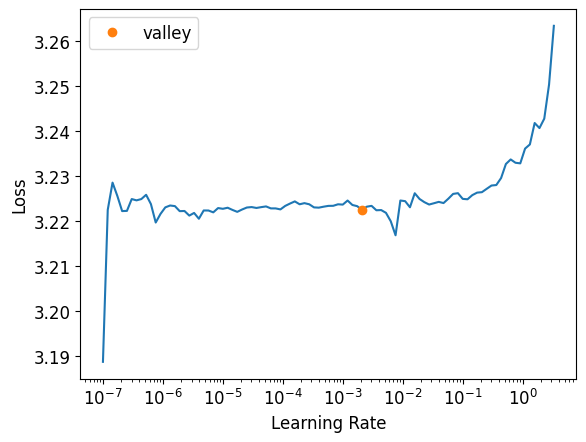

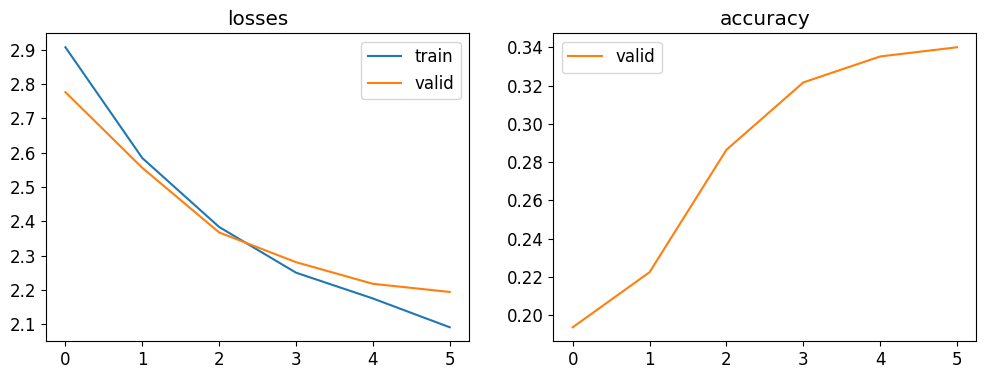


ACCURACY POR ÉPOCA en el conjunto VALIDATION:

	ÉPOCA 0 :  19.36 %

	ÉPOCA 1 :  22.24 %

	ÉPOCA 2 :  28.64 %

	ÉPOCA 3 :  32.16 %

	ÉPOCA 4 :  33.52 %

	ÉPOCA 5 :  34.0 %

ACCURACY en el conjunto VALIDATION:  34.0 %



Sequential (Input shape: 32 x 3 x 32 x 32)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 4 x 26 x 26    
Conv2d                                    592        True      
ReLU                                                           
____________________________________________________________________________
                     32 x 4 x 13 x 13    
MaxPool2d                                                      
____________________________________________________________________________
                     32 x 10 x 9 x 9     
Conv2d                                    1010       True      
ReLU                                                           
____________________________________________________________________________
                     32 x 810            
Flatten                                                        
____________________________________________________________________________
                     32 x 50     

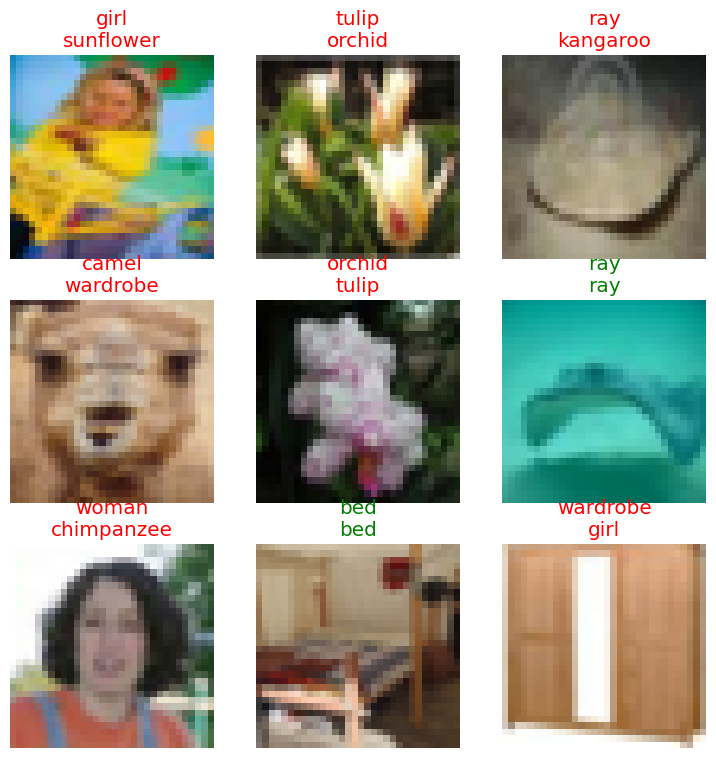

In [ ]:
# Objeto Learner
learn = Learner(train_val_CIFAR100dl, baseNet, loss_func = CrossEntropyLossFlat(), metrics = accuracy)

#learn.recorder.train_metrics = True   # Hace aparecer también train_accuracy en las métricas del modelo

# Encontrar el valor óptimo del learning rate (lr)
lr = learn.lr_find()
print(f'LEARNING RATE: {lr[0]} \n')

# Ejecutar el optimizador one-cycle
learn.fit_one_cycle(n_epoch = 6, lr_max = lr[0])

# Intercambio de posición de las columnas train_accuracy y valid_loss
#learn.recorder.metric_names[2], learn.recorder.metric_names[3] = learn.recorder.metric_names[3], learn.recorder.metric_names[2] # Nombre de train_accuracy <--> Nombre de valid_loss

#for i in range(len(learn.recorder.values)):
  #epoch_metrics_val = learn.recorder.values[i]                                                # Valores de las métricas en la época correspondiente
  #epoch_metrics_val[1], epoch_metrics_val[2] = epoch_metrics_val[2], epoch_metrics_val[1]     # Valores de train_accuracy <--> Valores de valid_loss

# Mostrar la curva de accuracy en validación a lo largo de las diferentes épocas
learn.recorder.plot_metrics()

# Accuracy en el conjunto de validación
final_metrics_val = learn.recorder.values[-1] # Últimos valores de las métricas almacenados en el historial

print('\nACCURACY POR ÉPOCA en el conjunto VALIDATION:')
for i in range(len(learn.recorder.values)):
  epoch_metrics_val = learn.recorder.values[i]           # Valores de las métricas en la época correspondiente
  epoch_acc_val = epoch_metrics_val[-1]                  # Accuracy en validación en la época correspondiente
  print('\n\tÉPOCA', i, ': ', round(float(epoch_acc_val) * 100, 4), '%')

final_acc_val = final_metrics_val[-1]                    # Accuracy en validación de la última época de entrenamiento

print('\nACCURACY en el conjunto VALIDATION: ', round(float(final_acc_val) * 100, 4), '%\n')

# Mostrar resultados tras el entrenamiento del modelo
learn.show_results()

# Mostrar todos los detalles del objeto Learner
learn.summary()

### **1.3.3. Observación del Código**

Se observan líneas comentadas en la celda de código anterior. Vamos paso por paso explicando qué implementan dichas líneas de código y por qué están comentadas:

1. La línea `learn.recorder.train_metrics = True` hace que aparezca también el accuracy en entrenamiento de cada época de entrenamiento del modelo (por defecto, este no aparece).

2. Tras añadir esta línea, se observó que la función `learn.recorder.plot_metrics()` no dibujaba correctamente la gráfica `losses`. Esto se debe a que antes de añadir la línea comentada en el paso 1, las dos primeras columnas de la tabla son `train_loss` y `valid_loss`. En esa situación, la gráfica `losses` se dibujaba perfectamente. Sin embargo, al añadir la línea del paso 1, las dos primeras columnas pasan a ser `train_loss` y `train_accuracy`, por lo que a la hora de graficar, la función `learn.recorder.plot_metrics()` tomaba de forma erronea los valores de la nueva columna `train_accuracy` como si fueran los de la columna `valid_loss`.

3. Como solución al problema indicado en el paso 2, se intentó intercambiar las columnas `train_accuracy` y `valid_loss` de la tabla (tanto el nombre de la métrica como sus valores).

4. Tras ello , el problema de las gráficas estaría solucionado. Sin embargo, se observó que el valor de `train_accuracy` final proporcionado de esta forma es diferente a los valores de `train_accuracy` proporcionado tras generar predicciones del modelo entrenado en el conjunto de entrenamiento y `train_accuracy` calculado mediante la matriz de confusión (estos dos últimos sí coinciden, como es de esperar).

5. Los tres valores de `train_accuracy` descritos en el paso 4 deberían de coincidir, pero no es así. Tras reflexionarlo un poco y comentarlo con el profesor, la explicación posible más coherente de por qué está pasando sería la siguiente: Si hacemos que se muestren las métricas de entrenamiento por cada época durante el entrenamiento del modelo, estas se calculan como un promedio de los resultados obtenidos en las iteraciones realizadas dentro de dicha
época. Es decir, uno presenta un batch de datos de entrenamiento, realiza
los forward pass pertinentes (calculando los errores obtenidos a la salida
de la red), calcula los gradientes correspondientes, hace una media de los
mismos, y actualiza los pesos de la red. Esto se realiza X veces, una por
cada batch hasta finalizar una época, y el error de training asociado con
esa época (que es lo que vemos visualizado) será una media (como pudiese
ser una exponential moving average) de los errores obtenidos durante esa
época. En cambio, cuando ya hemos entrenado, asumimos que lo que hacemos es
calcular el error sobre todo el conjunto de entrenamiento (sin separar por
batches, sin calcular ninguna media, y una vez todos los pesos han sido
actualizados). Esta diferencia de forma de cálculo durante el entrenamiento y tras el entrenamiento puede ser el motivo por el cual ambos errores pueden diferir, produciéndose así un `train_accuracy` diferente.

Una vez hecha esta reflexión, se ha optado por no mostrar el `train_accuracy ` durante el entrenamiento del modelo ya que complica el esquema del código de forma innecesaria (realmente, no se nos pide el `train_accuracy` en cada época de entrenamiento, sino solo el final). Por ello, aparece comentado dicho código en la celda anterior. Por tanto, vamos a calcular el `train_accuracy` tras generar predicciones del modelo entrenado en el conjunto de entrenamiento y comprobaremos que es igual al `train_accuracy` calculado mediante la matriz de confusión, como es de esperar.

### **1.3.4. Predicciones y Matriz de Confusión**

Una vez que hayamos entrenado nuestro modelo podemos:

- Realizar predicciones de un solo ejemplo:

  `learn.predict(example)`.

- Realizar predicciones de un conjunto de ejemplos (el conjunto test en nuestro caso):

  `test_CIFAR100dl = learn.dls.test_dl(files_test, with_labels = True)`

  `preds, targs, _ = learn.get_preds(dl = test_CIFAR100dl, with_decoded = True)`

Es clave escalar/normalizar los datos de la prueba siguiendo exactamente el mismo protocolo utilizado en el entrenamiento (usando la misma media y desviación típica). Esto lo hace FastAI automáticamente, usando `learn.get_preds()` o `learn.dls.test_dl()`.

Para más información, se puede consultar la siguiente documentación de FastAI:

[23] https://docs.fast.ai/learner.html#inference-functions

Finalmente, para interpretar mejor los resultados tras el entrenamiento del modelo construido para el problema de clasificación multiclase al que nos enfrentamos, FastAI posee la clase `ClassificationInterpretation`. Dicha clase posee varios métodos, entre los cuales destacan:

-  `from_learner()`: Crea una instancia de la clase `ClassificationInterpretation` a partir de un objeto `Learner` dado.

- `confusion_matrix()`: Calcula y devuelve la matriz de confusión.

- `plot_confusion_matrix()`: Visualiza la matriz de confusión mediante un gráfico.

- `plot_top_losses()`: Muestra las clases que tengan un mayor nivel de confusión.

La matriz de confusión es una herramienta que se utiliza en problemas de clasificación para evaluar el rendimiento de un modelo al comparar las predicciones del modelo con las etiquetas reales. Cada columna de la matriz representa el número de predicciones de cada clase, mientras que cada fila representa a las instancias en la clase real

Para más información, se puede consultar la siguiente documentación:

[24] https://docs.fast.ai/interpret.html#classificationinterpretation

[25] https://es.wikipedia.org/wiki/Matriz_de_confusi%C3%B3n

In [ ]:
# Generación de predicciones del modelo entrenado en el conjunto de entrenamiento
preds, targs, _ = learn.get_preds(dl = train_val_CIFAR100dl.train, with_decoded = True)

# Accuracy en el conjunto de entrenamiento
acc_train = accuracy(preds, targs)
print('\nACCURACY en el conjunto TRAINING: ', round(float(acc_train) * 100, 4), '%')


ACCURACY en el conjunto TRAINING:  36.6489 %



Número de ejemplos de training: 11250



ACCURACY en el conjunto TRAINING:  36.6489 %


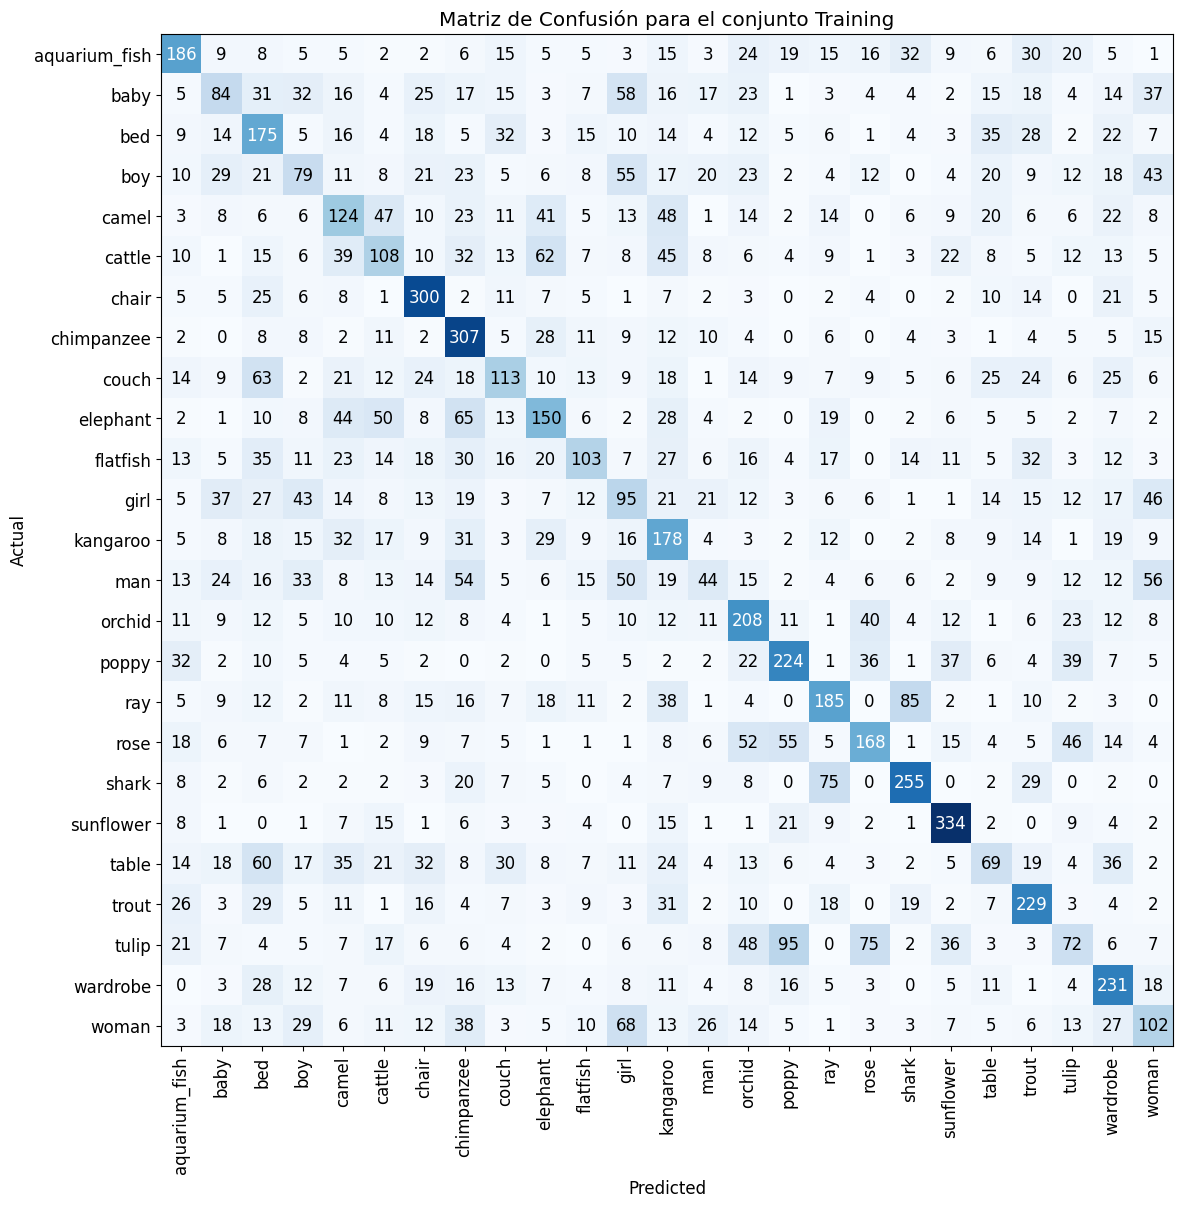

In [ ]:
# Matriz de confusión del conjunto de entrenamiento
interp_train = ClassificationInterpretation.from_learner(learn, 0, train_val_CIFAR100dl.train)
cm_train = interp_train.confusion_matrix()

print('\nNúmero de ejemplos de training:', np.sum(cm_train))
interp_train.plot_confusion_matrix(figsize = (12, 12), title = 'Matriz de Confusión para el conjunto Training')
print('\nACCURACY en el conjunto TRAINING: ', round(np.sum(np.diagonal(cm_train)) / np.sum(cm_train) * 100, 4), '%')

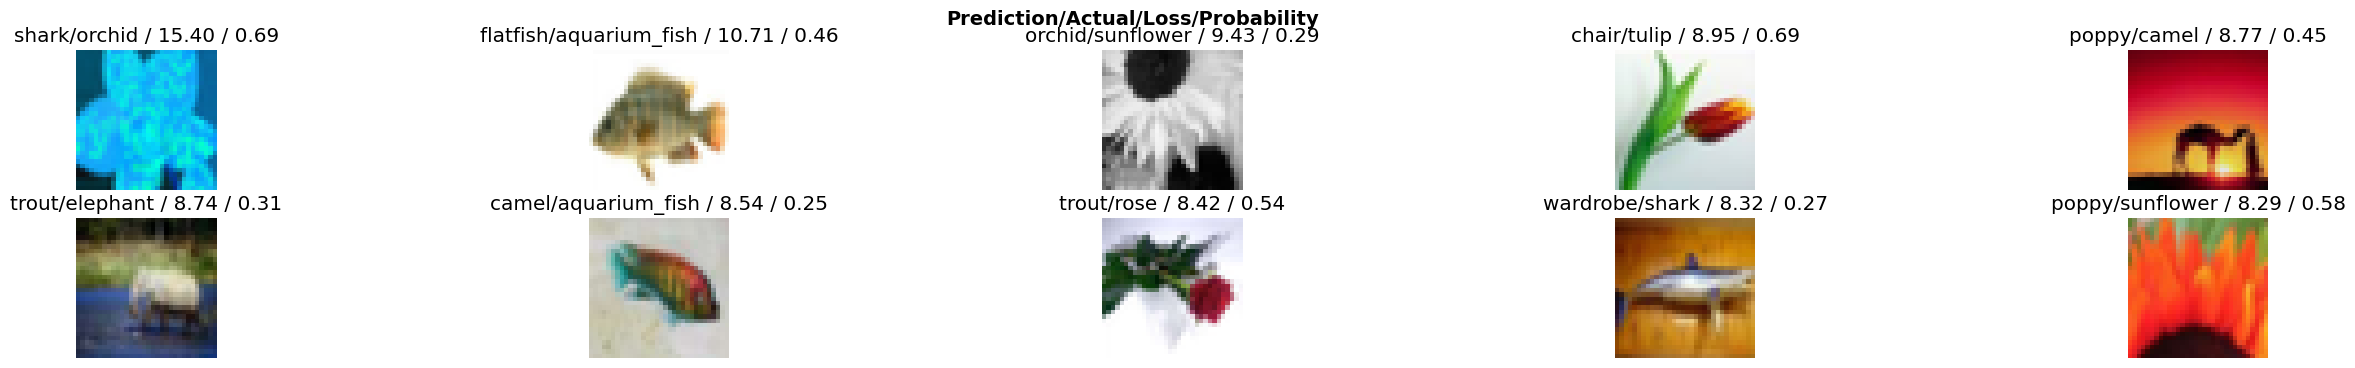

In [ ]:
# Mostrar las 10 clases del conjunto de entrenamiento con el mayor nivel de confusión
interp_train.plot_top_losses(10, nrows = 2, figsize = (32,4))

In [ ]:
# Definición del DataLoad para el conjunto de datos de prueba (test)
test_CIFAR100dl = learn.dls.test_dl(files_test, with_labels = True)

# Generación de predicciones del modelo entrenado en el conjunto de test
preds, targs, _ = learn.get_preds(dl = test_CIFAR100dl, with_decoded = True)

# Accuracy en el conjunto de test
acc_test = accuracy(preds, targs)
print('\nACCURACY en el conjunto TEST: ', round(float(acc_test) * 100, 4), '%')


ACCURACY en el conjunto TEST:  33.6 %



Número de ejemplos de test: 2500



ACCURACY en el conjunto TEST:  33.6 %


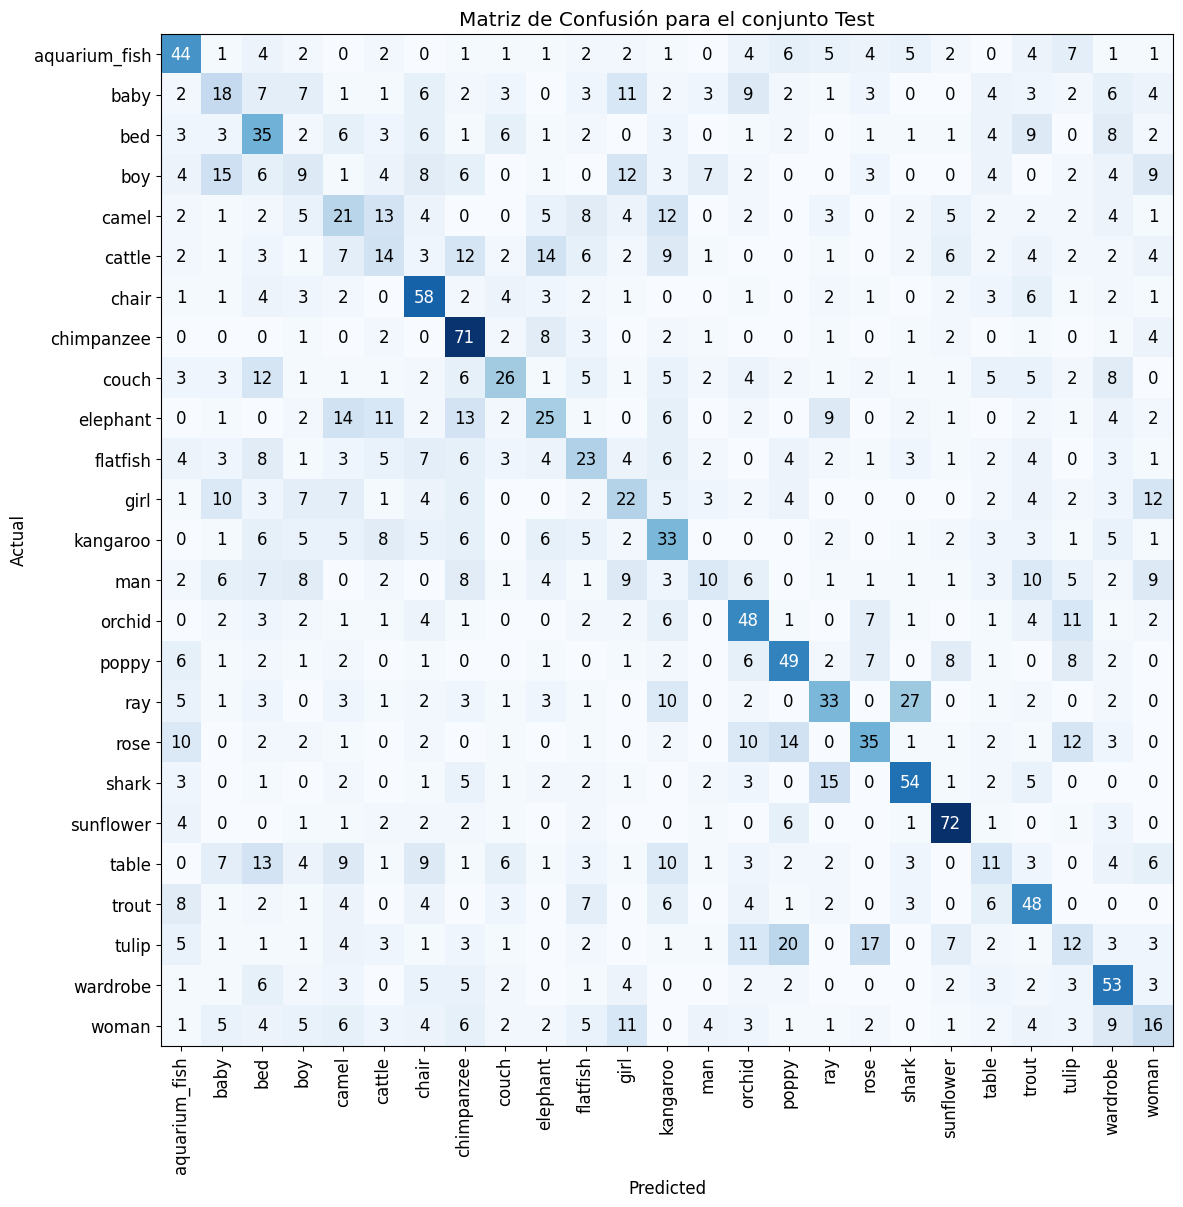

In [ ]:
# Matriz de confusión del conjunto de test
interp_test = ClassificationInterpretation.from_learner(learn, 1, test_CIFAR100dl)
cm_test = interp_test.confusion_matrix()

print('\nNúmero de ejemplos de test:', np.sum(cm_test))
interp_test.plot_confusion_matrix(figsize = (12, 12), title = 'Matriz de Confusión para el conjunto Test')
print('\nACCURACY en el conjunto TEST: ', round(np.sum(np.diagonal(cm_test)) / np.sum(cm_test) * 100, 4), '%')

Podemos ver que, si bien la diagonal destaca por encima de las demás zonas, hay algunos elementos que no pertenecen a la diagonal que también destacan y que nuestro modelo confunde. Comentemos algunos:

- Fila: Tulipán (tulip) , Columna: Amapola (poppy): 20 veces se ha confundido un tulipán con una amapola.

- Fila: Mesa (table) , Columna: Cama (bed): 13 veces se ha confundido una mesa con una cama.


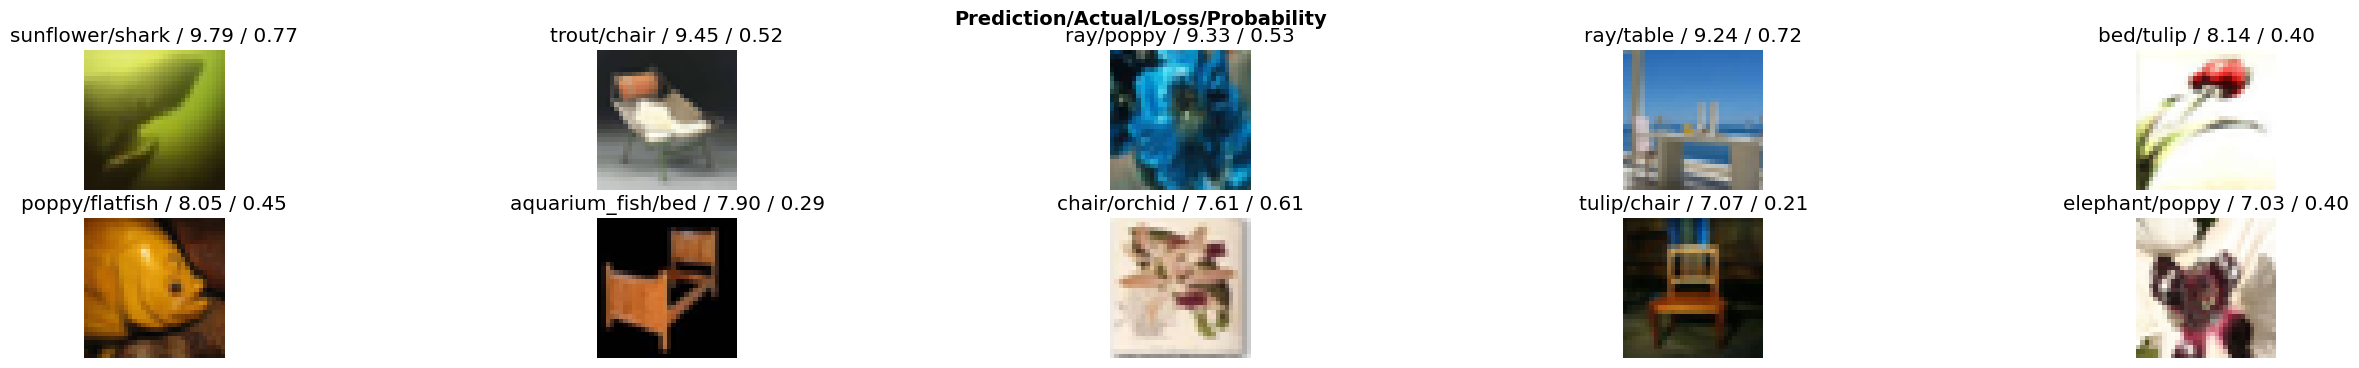

In [ ]:
# Mostrar las 10 clases del conjunto de test con el mayor nivel de confusión
interp_test.plot_top_losses(10, nrows = 2, figsize = (32,4))

### **1.3.5. Análisis de los Resultados**

- Loss en Training: 2.091269

- Accuracy en Training: 0.366489

- Loss en Validation: 2.194186

- Accuracy en Validation: 0.34 (Utilizaremos esta métrica para comparar modelos en el ejercicio 2)

- Accuracy en Test: 0.336

Si observamos la tabla que proporciona los valores de las métricas en cada época, observamos que la pérdida (loss) está disminuyendo tanto en el conjunto de entrenamiento como en el de validación. Esto indica que el modelo está aprendiendo de los datos y generalizando bien a los ejemplos no vistos. Podemos ver que se está produciendo un poco de sobreajuste (overfitting, es decir, que el modelo puede estar aprendiendo a memorizar los datos de entrenamiento en lugar de generalizar a datos nuevos), aunque tampoco mucho. Como se ve en la gráfica `losses`, el error de la función de pérdida en entrenamiento y en validación decaen de igual manera hasta aproximadamente la época 3 (x = 2 en la gráfica) y a partir de ahí la función de pérdida de validación no se disminuye  en la misma proporción que la de entrenamiento (la de validación queda un poco por encima de la de entrenamiento). Como ya se comentó anteriormente, si se aumenta el número de épocas de entrenamiento del modelo, y como para seis épocas no se produce demasiado, se ha considerado establecer dicho número de épocas.

En dicha tabla, se observa también que la precisión (accuracy) en el conjunto de validación también está mejorando, lo cual es una señal positiva.

En general, los resultados indican un progreso positivo en términos de pérdida y precisión a medida que el modelo se entrena en más épocas. Sin embargo, el valor obtenido de precisión en el conjunto de validación deja un poco que desear (sabemos que se puede mejorar más). Por ello, en el ejercicio 2, vamos a realizar ajustes en la arquitectura del modelo para mejorar aún más el rendimiento y evitar el sobreajuste.



<font color='blue'>What is the total number of parameters of the created model? Break down the account made to reach that figure.




Para calcular el número total de parámetros de nuestro modelo, necesitamos sumar el número de parámetros en cada capa.

La fórmula general para calcular el número de parámetros en una capa convolucional es:

$$ \text{Número de parámetros} = (\text{Tamaño del kernel} ⋅ \text{Número de canales de entrada} + 1\ \text{(en caso de haber bias)}) ⋅ \text{Número de canales de salida}$$

También, aunque no se pida, justificaremos el volumen de salida de cada capa convolucional, el cual se calcula mediante la fórmula:

$$ \text{Tamaño de salida} = \left( \frac{N + 2 \cdot P - F}{\text{stride}} \right) + 1 $$

donde:

- $\text{Tamaño de salida}$: Tamaño de la salida de la capa convolucional. Representa las dimensiones (altura y ancho) del volumen resultante después de aplicar la operación de convolución.

- $N$: Tamaño de la entrada (input volume). En el contexto de la capa convolucional, esto se refiere al tamaño de la imagen de entrada.

- $P$: Es el tamaño del relleno (padding). Como ya se explicó anteriormente, el relleno se agrega a la entrada antes de aplicar la convolución y este ayuda a mantener el tamaño de la salida. Puede ser útil para evitar la pérdida de información en los bordes de la imagen.

- $F$: Altura/Anchura (son iguales) del filtro/kernel.

- $stride$: Es el tamaño del paso (stride). Como ya se explicó anteriormente, este indica la cantidad de píxeles que el filtro se desplaza en cada paso durante la convolución.

También tenemos la fórmula general para calcular el número de parámetros en una capa fully-connected:

$$ \text{Número de parámetros} = (\text{in_features} + 1\ \text{(en caso de haber bias)}) ⋅ \text{out_features}$$

donde:

- $\text{in_features}$: Número de neuronas en la entrada de la capa.
- $\text{out_features}$: Número de neuronas en la salida de la capa.

Vamos a desglosar la cuenta para cada capa del modelo:

1. Primera capa convolucional:
  - Volumen de entrada: 32 x 32 x 3 ($N = 32$).
  - Filtros/Kernels usados: 4 de 7 x 7 con stride 1 y padding 0 ($F = 7, P = 0, stride = 1$).
  - Volumen de salida: (32 + 2 * 0 - 7) / 1 + 1 = 26 --> 26 x 26 x 4
  - Número de parámetros: Cada filtro tiene 7 * 7 * 3 + 1 = 148 parámetros --> La capa tiene 148 * 4 = 592 parámetros (coincide con el número indicado en el resumen del modelo dado por la función `learn.summary()`).

2. Primera capa de activación ReLU: No se calculan parámetros.

3. Capa de Max Pooling: No se calculan parámetros (pero, al aplicarse un filtro 2 x 2, reduce a la mitad las dimensiones del volumen de salida de la anterior capa convolucional. Es decir, si el volumen de salida era de 26 x 26 x 4, ahora pasa a ser de 13 x 13 x 4).

4. Segunda capa convolucional:
  - Volumen de entrada: 13 x 13 x 4 ($N = 13$).
  - Filtros/Kernels usados: 10 de 5 x 5 con stride 1 y padding 0 ($F = 5, P = 0, stride = 1$).
  - Volumen de salida: (13 + 2 * 0 - 5) / 1 + 1 = 9 --> 9 x 9 x 10
  - Número de parámetros: Cada filtro tiene 5 * 5 * 4 + 1 = 101 parámetros --> La capa tiene 101 * 10 = 1010 parámetros (coincide con el número indicado en el resumen del modelo dado por la función `learn.summary()`).

5. Segunda capa de activación ReLU: No se calculan parámetros.

6. Capa de aplanamiento (Flatten): No se calculan parámetros.

7. Primera capa fully-connected:
  - Número de neuronas en la entrada: 810 (= 9 * 9 * 10, resultado de aplicar flatten al volumen de salida de la segunda capa convolucional).
  - Número de neuronas en la salida: 50.
  - Número de parámetros: (810 + 1) * 50 = 40 550 (coincide con el número indicado en el resumen del modelo dado por la función `learn.summary()`).

8. Tercera capa de activación ReLU: No se calculan parámetros.

9. Segunda capa fully-connected:
  - Número de neuronas en la entrada: 50 (número de neuronas en la salida de la primera capa fully-connected).
  - Número de neuronas en la salida: 25.
  - Número de parámetros: (50 + 1) * 25 = 1275 (coincide con el número indicado en el resumen del modelo dado por la función `learn.summary()`).

10. Capa de activación Softmax (no se incluye explícitamente en el modelo, pero se encuentra internamente. Véase la respuesta a la segunda pregunta de este ejercicio): No se calculan parámetros.

Ahora, sumamos el número de parámetros de todas las capas:

$$ 592 + 0 + 0 + 1010 + 0 + 0 + 40\ 550 + 0 + 1275 + 0 = 43\ 427 $$

En conclusión:

$$ \text{Número total de parámetros del modelo} = 43\ 427, $$

lo cual coincide con el número indicado en el resumen del modelo dado por la función `learn.summary()`, tal y como se esperaba.

<font color='blue'>When fastai is used, and a multiclass classification problem like the one indicated in this exercise is addressed, is it necessary to incorporate a SoftMax function (`nn.Softmax()`) as last layer/element/component of your model? Justify the answer.

En FastAI, no es necesario incorporar explícitamente una capa `nn.Softmax()` como última capa del modelo cuando se está abordando un problema de clasificación multiclase (como es nuestro caso). La razón es que FastAI maneja automáticamente la función de activación softmax internamente en la capa de pérdida y en las métricas asociadas.

En particular, cuando especificamos la función de pérdida `CrossEntropyLossFlat()` en el objeto `Learner`, tal y como lo hemos hecho en el código, esta función de pérdida ya incluye la operación softmax. Esto se puede corroborar observando la implementación de la función de pérdida `CrossEntropyLossFlat()` de FastAI, la cual se encuentra en el siguiente enlace:

[26] https://github.com/fastai/fastai/blob/master/fastai/losses.py#L62

En conclusión, no necesitamos agregar explícitamente una capa softmax después de la última capa lineal de nuestro modelo cuando utilizamos FastAI para problemas de clasificación multiclase, ya que FastAI se encarga de ello internamente a través de la función de pérdida y las métricas asociadas.




---



---



---



# <font color='blue'> **Exercise 2:** **Improvement of the BaseNet model (3.5 points)**
<font color='blue'>Now the goal is to create, by making judicious architectural and implementation choices, an enhanced deep network based on *BaseNet*. Students should perform a sensible combination of different elements, which may include all or some of the following: Convolutional layers (Conv2D, either normal or atrous), Pooling layers (Local and Global MaxPooling2D and AveragePooling2D), Dense layers (also called fully-connected (FC) layers), Non-linear activations, (e.g. ReLu, leaky ReLu, etc.), Flattening (i.e. convert 2D features to 1D features),  Batch Normalization, and/or Regularization (e.g. Dropout or weight decay).

<font color='blue'>It is necessary to emphasize that **it is essential to justify the decisions made in the best possible way** (either through empirical evidence or through scientific literature).

<font color='blue'>A good combination of layers can largely improve the performance of our new model on these data. To enhance your network, you may consider adding any combination of the following enhancement options:
1. **Data normalization**. Scale normalization of the input data, in general, makes training easier and more robust. Use the DataLoader or ImageDataLoaders class with the correct parameters so that the data is well conditioned (mean=0, stddev=1) to improve training. You must ensure that test_transform uses the same normalization parameters as train_transform.
2. **Batch normalization**. Batch-normalization layers in most cases help to reduce overfitting and improve model training. Add normalization layers after convolutional layers and before the ReLU layer, but try including it after ReLU layers as well.
3. **Depth increase**. Experiment adding convolutional layers. Do not always put a maxpool layer after each conv layer, as this leads to excessive loss of information by reducing the number of units. If needed use UpSampling (Transposed Convolution) layers to increase the number of units.
4. **Dropout**. This layer introduces regularization by randomly selecting a percentage of active neurons for each mini-batch. This helps the network to specialize neurons in specific and independent information.
5. **Early Stopping**. After how many epochs we should stop training? Keep in mind that you should never use the test set for anything other than the final evaluation. You should decide for how many epochs you will train your model by looking at the training loss and validation accuracy plots (to do so, evaluate the local minima/maxima of the loss function as well as the classification accuracy). Remember that if you choose too many epochs it would quite likely lead to overfitting, while if you select too few your model quite likely won't  learn enough. In your report, you must include a table similar to the one shown in Exercise 1 to illustrate the architecture of your final improved network. In addition, you must explain the steps taken with the partial results obtained that have finally led you to introduce the proposed modifications.
6. **Data augmentation**.  Use the DataLoader or ImageDataLoaders class data zoom parameters, like zoom_range and/or horizontal_flip. Remember that you should not have any data augmentation in the validation or test sets. If you need a better understanding, try reading fastai's tutorial on transformations. Look at data augmentation using image transformations.

<font color='blue'> Feel free to incorporate modifications not included in the aforementioned list.

Vamos a ir observando cómo se realizarían estas técnicas una por una en FastAI para así familiarizarnos con ella. Como la métrica principal, de cara a estimar si estamos generalizando bien (que, en el fondo, es lo que nos interesa), es el accuracy del conjunto de validación, solo mostraremos esta métrica en cada técnica, excepto en el modelo final (en el que combinaremos varias técnicas de forma razonada) donde mostraremos todo, como hicimos en el ejercicio 1.

## **2.1. Mejora 1: Data Normalization**

La normalización de datos es una técnica crucial en el aprendizaje profundo (deep learning) que busca mejorar la convergencia y la estabilidad del entrenamiento de modelos. Esta técnica ayuda a conseguir:

- Convergencia más rápida: La normalización de datos ayuda a que los modelos converjan más rápidamente durante el entrenamiento.

- Estabilidad del entrenamiento: Ayuda a estabilizar y acelerar el proceso de entrenamiento, especialmente en redes neuronales profundas.

- Mitigación de gradientes explosivos o desvanecientes: Ayuda a prevenir problemas asociados con gradientes que son demasiado grandes o demasiado pequeños, como los gradientes explosivos o desvanecientes que pueden ocurrir en capas profundas.

Para imágenes, la normalización suele implicar la escala de los píxeles. La normalización común implica restar la media de la imagen y dividir por la desviación estándar. Esto centra los datos alrededor de cero y escala la varianza.

Es crucial aplicar la misma transformación de normalización tanto al conjunto de entrenamiento como al conjunto de prueba para garantizar la coherencia. Esto significa que los parámetros de normalización, como la media y la desviación estándar, deben calcularse en el conjunto de entrenamiento y luego aplicarse tanto al conjunto de entrenamiento como al conjunto de prueba.

En FastAI, existen diferentes opciones para aplicar esta técnica. Para aplicarla, habría que incluir dentro del Datablock una de las siguientes opciones:

- `batch_tfms = Normalize.from_stats(*cifar_stats)`: Utiliza la media y la desviación típica precalculadas para el conjunto de datos CIFAR. Como estamos trabajando con CIFAR100, utilizaremos este método.

- `batch_tfms = Normalize()`: Útil cuando no se tiene información previa sobre la distribución de píxeles y se desea calcular la media y la desviación estándar del conjunto de entrenamiento.

- `batch_tfms = Normalize.from_stats(mean, std)`: Nos permite proporcionar manualmente la media y la desviación típica (las cuales hemos tenido que calcular anteriormente) para la normalización.

Para más información, se puede consultar la siguiente documentación de FastAI:

[27] https://docs.fast.ai/data.transforms.html#normalize


In [ ]:
# Definición del Datablock
DataNorm_CIFAR100db = DataBlock(
                          blocks     = (ImageBlock, CategoryBlock),
                          get_items  = get_image_files,
                          splitter   = RandomSplitter(valid_pct = 0.1, seed = 42),
                          get_y      = parent_label,
                          batch_tfms = Normalize.from_stats(*cifar_stats)    # Data Normalization
                      )

# Definición del DataLoad para el conjunto de datos de entrenamiento y el conjunto de datos de validación
DataNorm_train_val_CIFAR100dl = DataNorm_CIFAR100db.dataloaders(path/'train', bs = 32)


LEARNING RATE: 0.0012022644514217973 



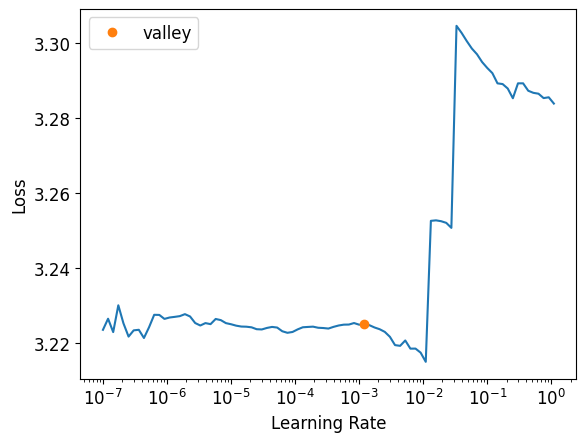

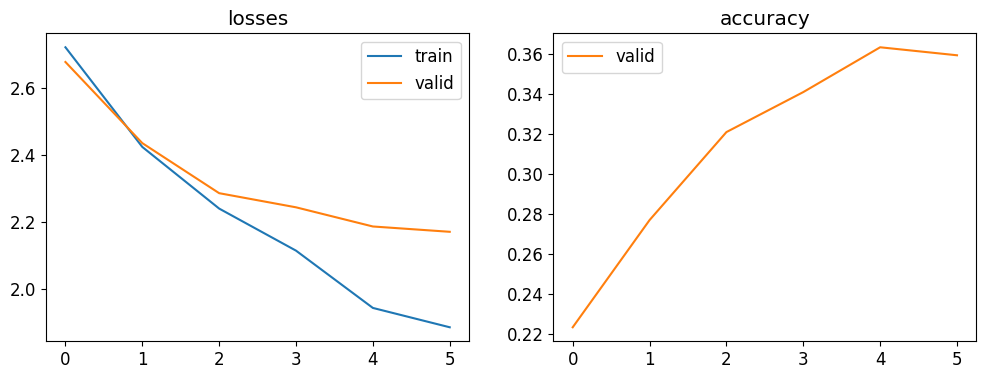


ACCURACY POR ÉPOCA en el conjunto VALIDATION:

	ÉPOCA 0 :  22.32 %

	ÉPOCA 1 :  27.68 %

	ÉPOCA 2 :  32.08 %

	ÉPOCA 3 :  34.08 %

	ÉPOCA 4 :  36.32 %

	ÉPOCA 5 :  35.92 %

ACCURACY en el conjunto VALIDATION:  35.92 %



Sequential (Input shape: 32 x 3 x 32 x 32)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 4 x 26 x 26    
Conv2d                                    592        True      
ReLU                                                           
____________________________________________________________________________
                     32 x 4 x 13 x 13    
MaxPool2d                                                      
____________________________________________________________________________
                     32 x 10 x 9 x 9     
Conv2d                                    1010       True      
ReLU                                                           
____________________________________________________________________________
                     32 x 810            
Flatten                                                        
____________________________________________________________________________
                     32 x 50     

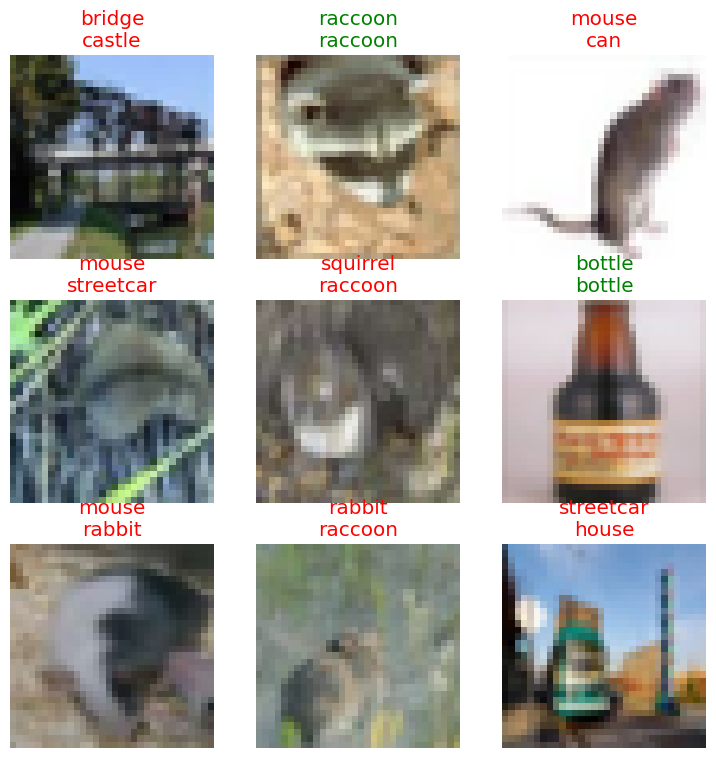

In [ ]:
# Objeto Learner
DataNorm_learn = Learner(DataNorm_train_val_CIFAR100dl, baseNet, loss_func = CrossEntropyLossFlat(), metrics = accuracy)

# Encontrar el valor óptimo del learning rate (lr)
lr = DataNorm_learn.lr_find()
print(f'LEARNING RATE: {lr[0]} \n')

# Ejecutar el optimizador one-cycle
DataNorm_learn.fit_one_cycle(n_epoch = 6, lr_max = lr[0])

# Mostrar la curva de accuracy en validación a lo largo de las diferentes épocas
DataNorm_learn.recorder.plot_metrics()

# Accuracy en el conjunto de validación
final_metrics_val = DataNorm_learn.recorder.values[-1] # Últimos valores de las métricas almacenados en el historial

print('\nACCURACY POR ÉPOCA en el conjunto VALIDATION:')
for i in range(len(DataNorm_learn.recorder.values)):
  epoch_metrics_val = DataNorm_learn.recorder.values[i]  # Valores de las métricas en la época correspondiente
  epoch_acc_val = epoch_metrics_val[-1]                  # Accuracy en validación en la época correspondiente
  print('\n\tÉPOCA', i, ': ', round(float(epoch_acc_val) * 100, 4), '%')

final_acc_val = final_metrics_val[-1]                    # Accuracy en validación de la última época de entrenamiento

print('\nACCURACY en el conjunto VALIDATION: ', round(float(final_acc_val) * 100, 4), '%\n')

# Mostrar resultados tras el entrenamiento del modelo
DataNorm_learn.show_results()

# Mostrar todos los detalles del objeto Learner
DataNorm_learn.summary()

### **2.1.1. Análisis de los Resultados**

- Loss en Training: 1.886374

- Loss en Validation: 2.171413

- Accuracy en Validation: 0.359200

Si observamos la tabla que proporciona los valores de las métricas en cada época, observamos que el la pérdida en el conjunto de entrenamiento tiende a disminuir, lo cual es positivo, y la pérdida en el conjunto de validación también disminuye, indicando que el modelo generaliza bien a datos no vistos.


En dicha tabla, se observa también que el accuracy en el conjunto de validación aumenta gradualmente con el tiempo, lo cual también es positivo. Cabe destacar que con el mero hecho de normalizar los datos, ya hemos obtenido una pequeña mejora del accuracy en el conjunto de validación (de 34% a 35.92%)

Si comparamos estos resultados con los del ejercicio 1, se tiene que:

- El modelo con data normalization parece tener una tendencia a un rendimiento superior en términos de accuracy.

- La normalización parece contribuir a una mejor generalización, ya que la brecha entre la pérdida en el conjunto de entrenamiento y en el conjunto de validación es menor en comparación con el modelo sin data normalization (menor overfitting, pero sigue estando presente).

- Ambos modelos muestran mejoras en el accuracy y la disminución de la pérdida a lo largo de las épocas.

## **2.2. Mejora 2: Batch Normalization**




Batch Normalization es una técnica que normaliza las activaciones de cada capa en una red neuronal. Consiste en calcular la media y la desviación estándar de las activaciones dentro de un mini batch y luego normalizar las activaciones restando la media y dividiendo por la desviación estándar. Esta técnica resulta beneficiosa para:

- Mitigar el desvanecimiento/explosión del gradiente: Ayuda a mantener activaciones en un rango más estable durante el entrenamiento, evitando problemas de desvanecimiento o explosión del gradiente.

- Acelerar el entrenamiento: Permite el uso de tasas de aprendizaje más altas, acelerando el proceso de entrenamiento.

- Mejorar la generalización: Contribuye a una mejor generalización del modelo a nuevos datos.

Batch Normalization se puede aplicar después de las capas convolucionales.
También se puede colocar después de la función de activación (como ReLU), lo cual a veces puede ser beneficioso. De igual forma, también se puede utilizar después de las capas fully-connected de la misma manera que en capas convolucionales, lo cual puede resultar beneficioso, especialmente en arquitecturas profundas.

No hay una regla estricta de dónde aplicarla (la elección óptima puede depender de la arquitectura específica y la naturaleza del conjunto de datos). En la práctica, se recomienda experimentar con diferentes configuraciones y observar cómo afecta al rendimiento del modelo en particular.

En FastAI, para aplicar esta técnica, se añade en el modelo la capa `nn.BatchNorm2d(num_features)` después de la capa convolucional (o después de la función de activación) y/o la capa `BatchNorm1d(num_features)` después de la capa fully-connected.

Para más información, se puede consultar la siguiente documentación de PyTorch:

[28] https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm1d.html

[29] https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm2d.html

In [ ]:
BatchNorm_baseNet = sequential(
    nn.Conv2d(in_channels = 3, out_channels = 4, kernel_size = (7,7)),
    nn.BatchNorm2d(num_features = 4),   # Batch Normalization después de la capa de convolución
    nn.ReLU(),
    nn.MaxPool2d(kernel_size = (2,2)),
    nn.Conv2d(in_channels = 4, out_channels = 10, kernel_size = (5,5)),
    nn.ReLU(),
    nn.BatchNorm2d(num_features = 10),  # Batch Normalization después de la capa de convolución y la función de activación
    nn.Flatten(),
    nn.Linear(in_features = 810, out_features = 50),
    nn.BatchNorm1d(num_features = 50),  # Batch Normalization después de la capa fully-connected
    nn.ReLU(),
    nn.Linear(in_features = 50, out_features = 25)
)

LEARNING RATE: 0.010964781977236271 



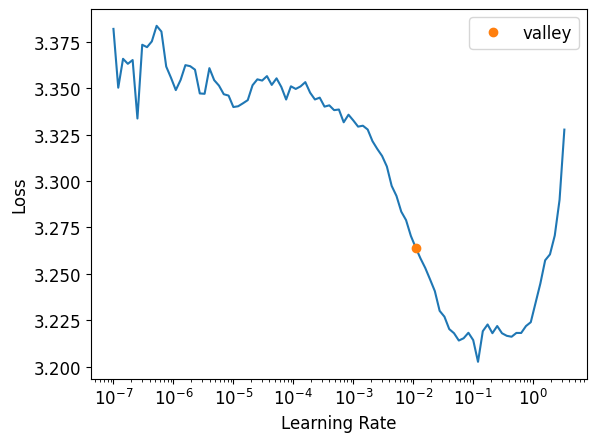

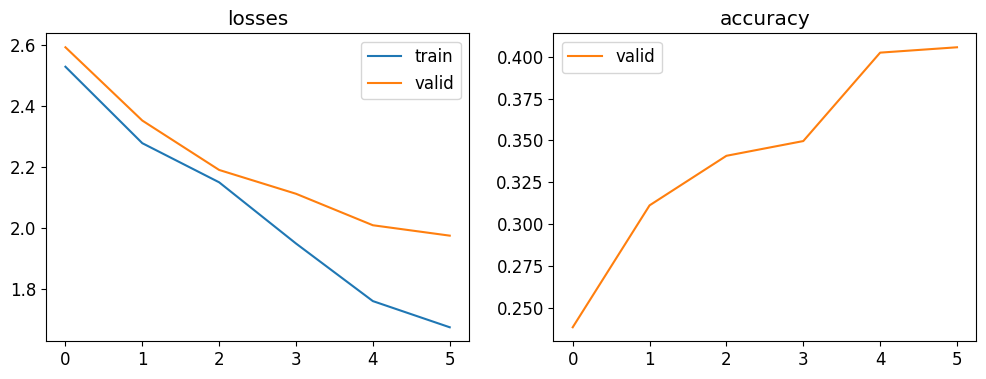


ACCURACY POR ÉPOCA en el conjunto VALIDATION:

	ÉPOCA 0 :  23.84 %

	ÉPOCA 1 :  31.12 %

	ÉPOCA 2 :  34.08 %

	ÉPOCA 3 :  34.96 %

	ÉPOCA 4 :  40.24 %

	ÉPOCA 5 :  40.56 %

ACCURACY en el conjunto VALIDATION:  40.56 %



Sequential (Input shape: 32 x 3 x 32 x 32)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 4 x 26 x 26    
Conv2d                                    592        True      
BatchNorm2d                               8          True      
ReLU                                                           
____________________________________________________________________________
                     32 x 4 x 13 x 13    
MaxPool2d                                                      
____________________________________________________________________________
                     32 x 10 x 9 x 9     
Conv2d                                    1010       True      
ReLU                                                           
BatchNorm2d                               20         True      
____________________________________________________________________________
                     32 x 810            
Flatten                                       

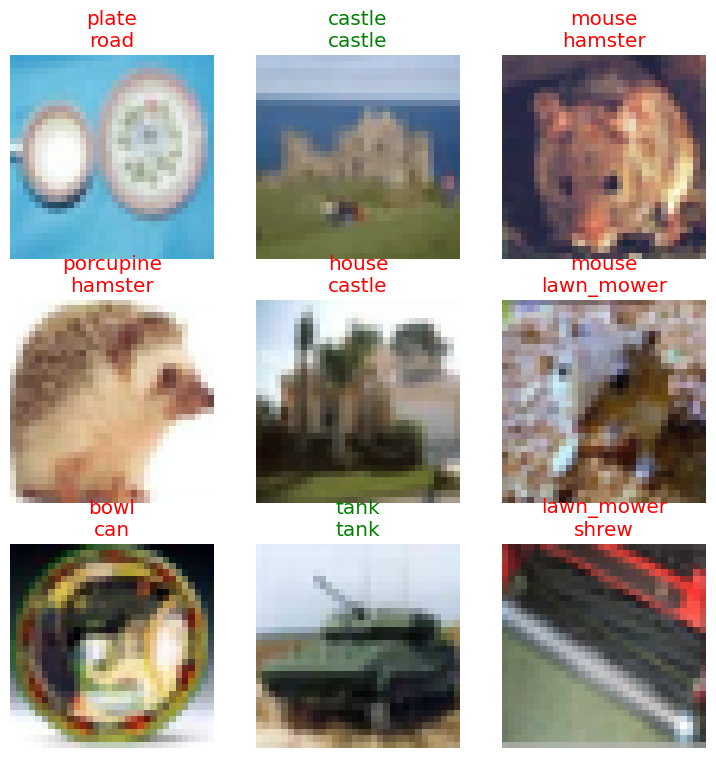

In [ ]:
# Objeto Learner
BatchNorm_learn = Learner(train_val_CIFAR100dl, BatchNorm_baseNet, loss_func = CrossEntropyLossFlat(), metrics = accuracy)

# Encontrar el valor óptimo del learning rate (lr)
lr = BatchNorm_learn.lr_find()
print(f'LEARNING RATE: {lr[0]} \n')

# Ejecutar el optimizador one-cycle
BatchNorm_learn.fit_one_cycle(n_epoch = 6, lr_max = lr[0])

# Mostrar la curva de accuracy en validación a lo largo de las diferentes épocas
BatchNorm_learn.recorder.plot_metrics()

# Accuracy en el conjunto de validación
final_metrics_val = BatchNorm_learn.recorder.values[-1] # Últimos valores de las métricas almacenados en el historial

print('\nACCURACY POR ÉPOCA en el conjunto VALIDATION:')
for i in range(len(BatchNorm_learn.recorder.values)):
  epoch_metrics_val = BatchNorm_learn.recorder.values[i] # Valores de las métricas en la época correspondiente
  epoch_acc_val = epoch_metrics_val[-1]                  # Accuracy en validación en la época correspondiente
  print('\n\tÉPOCA', i, ': ', round(float(epoch_acc_val) * 100, 4), '%')

final_acc_val = final_metrics_val[-1]                    # Accuracy en validación de la última época de entrenamiento

print('\nACCURACY en el conjunto VALIDATION: ', round(float(final_acc_val) * 100, 4), '%\n')

# Mostrar resultados tras el entrenamiento del modelo
BatchNorm_learn.show_results()

# Mostrar todos los detalles del objeto Learner
BatchNorm_learn.summary()

### **2.2.1. Análisis de los Resultados**

- Loss en Training: 1.672691

- Loss en Validation: 1.974052

- Accuracy en Validation: 0.405600

Si observamos la tabla que proporciona los valores de las métricas en cada época, observamos que el la pérdida en el conjunto de entrenamiento tiende a disminuir, lo cual es positivo (indica una buena convergencia), y la pérdida en el conjunto de validación también disminuye, indicando que el modelo generaliza bien a datos no vistos.


En dicha tabla, se observa también que el accuracy en el conjunto de validación aumenta gradualmente con el tiempo, lo cual también es positivo. Cabe destacar que con el mero hecho de aplicar esta técnica de batch normalization, ya hemos obtenido una mejora considerable del accuracy en el conjunto de validación (de 34% a 40.56%)

Si comparamos estos resultados con los del ejercicio 1, se tiene que:

- La incorporación de Batch Normalization ha mejorado significativamente el rendimiento del modelo.

- La brecha entre la pérdida de entrenamiento y validación es menor en comparación con el modelo sin normalización, indicando una menor tendencia al sobreajuste (contribuyendo así a la regularización del modelo).

- El aumento en la precisión en el conjunto de validación es un indicador positivo de que Batch Normalization ha mejorado la capacidad del modelo para generalizar a nuevos datos.

## **2.3. Mejora 3: Depth Increase**

La técnica Depth Increase en el contexto de deep learning se refiere a la estrategia de aumentar la profundidad de una red neuronal convolucional mediante la adición de capas convolucionales. La profundidad de la red se refiere a la cantidad de capas que tiene. Esta técnica aporta los siguientes beneficios:

- Aumento de la capacidad representativa: Añadir más capas convolucionales proporciona a la red la capacidad de aprender representaciones más complejas y abstractas de los datos. Ante esto, no es necesario siempre agregar capas de maxpooling después de cada capa convolucional. Esto puede llevar a una pérdida excesiva de información espacial. En su lugar, se pueden usar capas de UpSampling (o Transposed Convolution) para aumentar la resolución espacial.

- Mejora de la jerarquía de características: Cada capa convolucional puede aprender características más específicas y de alto nivel a medida que se profundiza en la red.

- Expresividad del Modelo: Una red más profunda tiene más parámetros y, por lo tanto, una mayor capacidad para expresar patrones y relaciones en los datos.

Se recomienda llevar un control de los parámetros de la red ya que a medida que se aumenta la profundidad, también se aumenta el número de dichos parámetros. Esto se realiza con el fin de evitar problemas de sobreajuste y demandas computacionales excesivas.

Vamos a basarnos en redes neuronales dedicadas a clasificación vistas en teoria, las cuales sabemos que funcionan correctamente. Si tenemos en mentela arquitectura de *BaseNet* que hemos implementado, vemos que tiene mucha similitudes con la la arquitectura *Lenet-5*. La arquitectura *Lenet-5* fue superada por la arquitectura *AlexNet*, habiendo un gran salto de mejora (lo cual fue algo revolucionario). Por ello, vamos a incrementar la profundidad de nuestra arquitectura *BaseNet* basándonos en la arquitectura de *AlexNet* (y haciendo adaptaciones a nuestro problema. No se asegura que obtengamos mejores resultados). La arquitectura a implementar no es directa, ya que, observando la arquitectura de *AlexNet*, sus imágenes de entrada son de 227 x 227 x 3 mientras que las nuestras son de 32 x 32 x 3. Las posibles soluciones para solventar este problema son las siguientes:

- Interpolación de la imagen de 32 x 32 a 227 x 227. Esta solución no nos parece adecuada ya que el aumento sería demasiado grande y no aportaría demasiada información.

- Reducción del tamaño de filtro/kernel de la imagen, pero siguiendo con la misma filosofía (escogemos esta opción).  

In [ ]:
DepthInc_baseNet = nn.Sequential(
    nn.Conv2d(in_channels = 3, out_channels = 8, kernel_size = (3,3), stride = 2, padding = 1),     # Capa 1: Convolución
    nn.ReLU(inplace = True),                                                                        # Capa 2: Función de Activación ReLU
    nn.MaxPool2d(kernel_size = (2,2)),                                                              # Capa 3: Agrupación Máxima (MaxPooling2D 2x2)
    nn.Conv2d(in_channels = 8, out_channels = 16, kernel_size = (3,3), padding = 1),                # Capa 4: Convolución
    nn.ReLU(inplace = True),                                                                        # Capa 5: Función de Activación ReLU
    nn.MaxPool2d(kernel_size = (2,2)),                                                              # Capa 6: Agrupación Máxima (MaxPooling2D 2x2)
    nn.Conv2d(in_channels = 16, out_channels = 32, kernel_size = (3,3), padding = 1),               # Capa 7: Convolución
    nn.ReLU(inplace = True),                                                                        # Capa 8: Función de Activación ReLU
    nn.Conv2d(in_channels = 32, out_channels = 128, kernel_size = (3,3), padding = 1),              # Capa 9: Convolución
    nn.ReLU(inplace = True),                                                                        # Capa 10: Función de Activación ReLU
    nn.Conv2d(in_channels = 128, out_channels = 256, kernel_size = (3,3), padding = 1),             # Capa 11: Convolución
    nn.ReLU(inplace = True),                                                                        # Capa 12: Función de Activación ReLU
    nn.MaxPool2d(kernel_size = (2,2)),                                                              # Capa 13: Agrupación Máxima (MaxPooling2D 2x2)
    nn.AdaptiveAvgPool2d(output_size = (6, 6)),                                                     # Capa 14: Agrupación Media Adaptativa (AdaptiveAvgPool2D)
    nn.Flatten(),                                                                                   # Capa 15: Pasar de tensor tridimensional a tensor unidimensional (vector 1D)
    nn.Linear(in_features = 9216, out_features = 50),                                               # Capa 16: Fully-Connected
    nn.ReLU(inplace = True),                                                                        # Capa 17: Función de Activación ReLU
    nn.Linear(in_features = 50, out_features = 25),                                                 # Capa 18: Fully-Connected (25 clases de salida)
)

LEARNING RATE: 0.00015848931798245758 



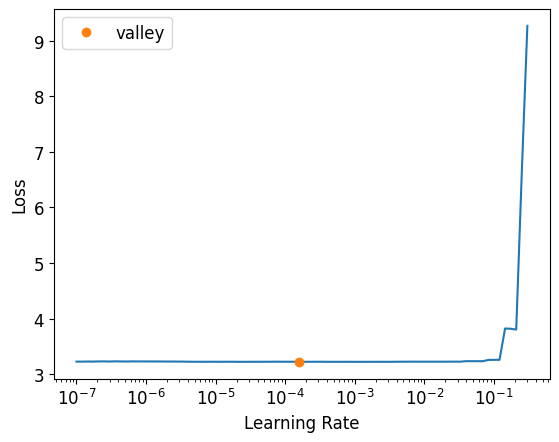

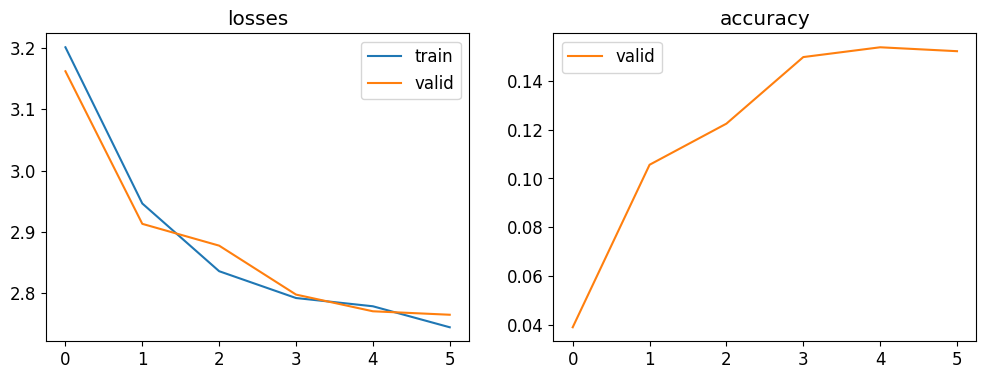


ACCURACY POR ÉPOCA en el conjunto VALIDATION:

	ÉPOCA 0 :  3.92 %

	ÉPOCA 1 :  10.56 %

	ÉPOCA 2 :  12.24 %

	ÉPOCA 3 :  14.96 %

	ÉPOCA 4 :  15.36 %

	ÉPOCA 5 :  15.2 %

ACCURACY en el conjunto VALIDATION:  15.2 %



Sequential (Input shape: 32 x 3 x 32 x 32)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 8 x 16 x 16    
Conv2d                                    224        True      
ReLU                                                           
____________________________________________________________________________
                     32 x 8 x 8 x 8      
MaxPool2d                                                      
____________________________________________________________________________
                     32 x 16 x 8 x 8     
Conv2d                                    1168       True      
ReLU                                                           
____________________________________________________________________________
                     32 x 16 x 4 x 4     
MaxPool2d                                                      
____________________________________________________________________________
                     32 x 32 x 4 

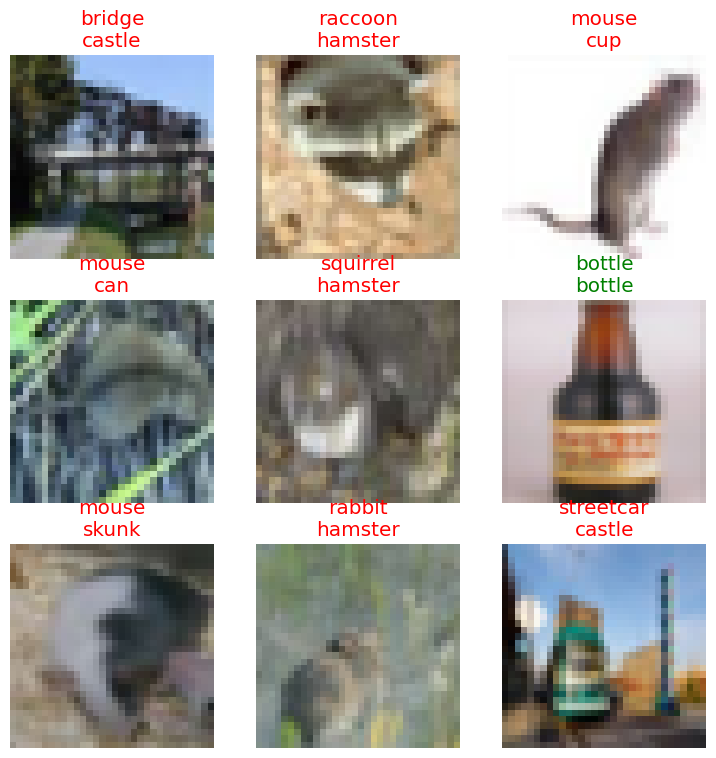

In [ ]:
# Objeto Learner
DepthInc_learn = Learner(train_val_CIFAR100dl, DepthInc_baseNet, loss_func = CrossEntropyLossFlat(), metrics = accuracy)

# Encontrar el valor óptimo del learning rate (lr)
lr = DepthInc_learn.lr_find()
print(f'LEARNING RATE: {lr[0]} \n')

# Ejecutar el optimizador one-cycle
DepthInc_learn.fit_one_cycle(n_epoch = 6, lr_max = lr[0])

# Mostrar la curva de accuracy en validación a lo largo de las diferentes épocas
DepthInc_learn.recorder.plot_metrics()

# Accuracy en el conjunto de validación
final_metrics_val = DepthInc_learn.recorder.values[-1] # Últimos valores de las métricas almacenados en el historial

print('\nACCURACY POR ÉPOCA en el conjunto VALIDATION:')
for i in range(len(DepthInc_learn.recorder.values)):
  epoch_metrics_val = DepthInc_learn.recorder.values[i]  # Valores de las métricas en la época correspondiente
  epoch_acc_val = epoch_metrics_val[-1]                  # Accuracy en validación en la época correspondiente
  print('\n\tÉPOCA', i, ': ', round(float(epoch_acc_val) * 100, 4), '%')

final_acc_val = final_metrics_val[-1]                    # Accuracy en validación de la última época de entrenamiento

print('\nACCURACY en el conjunto VALIDATION: ', round(float(final_acc_val) * 100, 4), '%\n')

# Mostrar resultados tras el entrenamiento del modelo
DepthInc_learn.show_results()

# Mostrar todos los detalles del objeto Learner
DepthInc_learn.summary()

Nótese que ahora el número total de parámetros de nuestro modelo es de 800 317, un número muy elevado en comparación a los 43 427 parámetros de nuestro modelo original *BaseNet*.

### **2.3.1. Análisis de los Resultados**

- Loss en Training: 2.744850

- Loss en Validation: 2.765266

- Accuracy en Validation: 0.152000

Si observamos la tabla que proporciona los valores de las métricas en cada época, observamos que el la pérdida en el conjunto de entrenamiento tiende a disminuir, lo cual es positivo (indica una buena convergencia), y la pérdida en el conjunto de validación también disminuye, indicando que el modelo generaliza bien a datos no vistos.


En dicha tabla, se observa también que el accuracy en el conjunto de validación aumenta gradualmente con el tiempo, lo cual también es positivo. Cabe destacar que, en este caso, el accuracy en validación es demasiado bajo. Es posible que la arquitectura con profundidad incrementada que se está utilizando o los hiperparámetros necesiten ajustes para que esta técnica sea beneficiosa. Los diversos motivos son muy variados. De igual forma, como se ha comentado anteriormente, este no es nuestro modelo final, solo estamos ilustrando una a una cada una de las diferentes técnicas para ya finalmente combinarlas y conseguir una gran mejora del accuracy obtenido en el modelo del ejercicio 1.

Si comparamos estos resultados con los del ejercicio 1, se tiene que:

- El modelo original sin mejoras tiene una tendencia a tener una mayor precisión en comparación con el modelo con aumento de profundidad en todas las épocas.

- La pérdida en entrenamiento y validación del modelo con aumento de profundidad tiende a ser más alta en comparación con el modelo base en todas las épocas. Esto sugiere que el modelo con aumento de profundidad puede estar teniendo dificultades para aprender o está sobreajustando los datos. También, la brecha entre la pérdida de entrenamiento y validación es mucho menor en comparación con el modelo sin normalización.

## **2.4. Mejora 4: Dropout**

Dropout es una técnica de regularización utilizada comúnmente en redes neuronales para prevenir el sobreajuste (overfitting). La idea central detrás del dropout es apagar (eliminar) aleatoriamente un conjunto de neuronas durante el entrenamiento de la red, lo que hace que la red sea más robusta y generalice mejor a datos no vistos.

Durante cada iteración de entrenamiento, cada neurona tiene una probabilidad predefinida de ser "apagada" (eliminada temporalmente) con una probabilidad llamada tasa de dropout. Esto significa que la neurona no contribuirá ni aprenderá en esa iteración.

La aplicación aleatoria de dropout ayuda a que las neuronas se vuelvan más independientes entre sí, ya que no pueden depender demasiado de un conjunto específico de neuronas para realizar predicciones. Esto mejora la generalización del modelo.

En FastAI, para aplicar esta técnica, se añade en el modelo la capa `nn.Dropout(p)` después de una capa de convolución o después de una capa fully-connected.

Para más información, se puede consultar la siguiente documentación de PyTorch:

[30] https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html

In [ ]:
Dropout_baseNet = sequential(
    nn.Conv2d(in_channels = 3, out_channels = 4, kernel_size = (7,7)),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size = (2,2)),
    nn.Conv2d(in_channels = 4, out_channels = 10, kernel_size = (5,5)),
    nn.ReLU(),
    nn.Flatten(),
    nn.Dropout(p = 0.3),                              # Dropout con una tasa de 0.3
    nn.Linear(in_features = 810, out_features = 50),
    nn.ReLU(),
    nn.Linear(in_features = 50, out_features = 25),
)

LEARNING RATE: 0.001737800776027143 



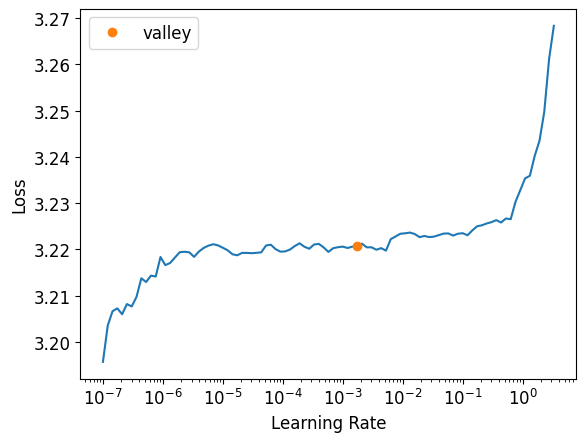

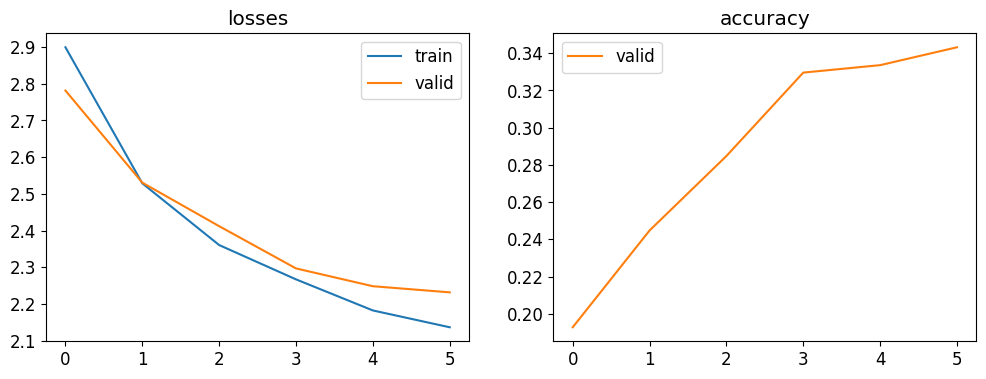


ACCURACY POR ÉPOCA en el conjunto VALIDATION:

	ÉPOCA 0 :  19.28 %

	ÉPOCA 1 :  24.48 %

	ÉPOCA 2 :  28.48 %

	ÉPOCA 3 :  32.96 %

	ÉPOCA 4 :  33.36 %

	ÉPOCA 5 :  34.32 %

ACCURACY en el conjunto VALIDATION:  34.32 %



Sequential (Input shape: 32 x 3 x 32 x 32)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 4 x 26 x 26    
Conv2d                                    592        True      
ReLU                                                           
____________________________________________________________________________
                     32 x 4 x 13 x 13    
MaxPool2d                                                      
____________________________________________________________________________
                     32 x 10 x 9 x 9     
Conv2d                                    1010       True      
ReLU                                                           
____________________________________________________________________________
                     32 x 810            
Flatten                                                        
Dropout                                                        
______________________________________________

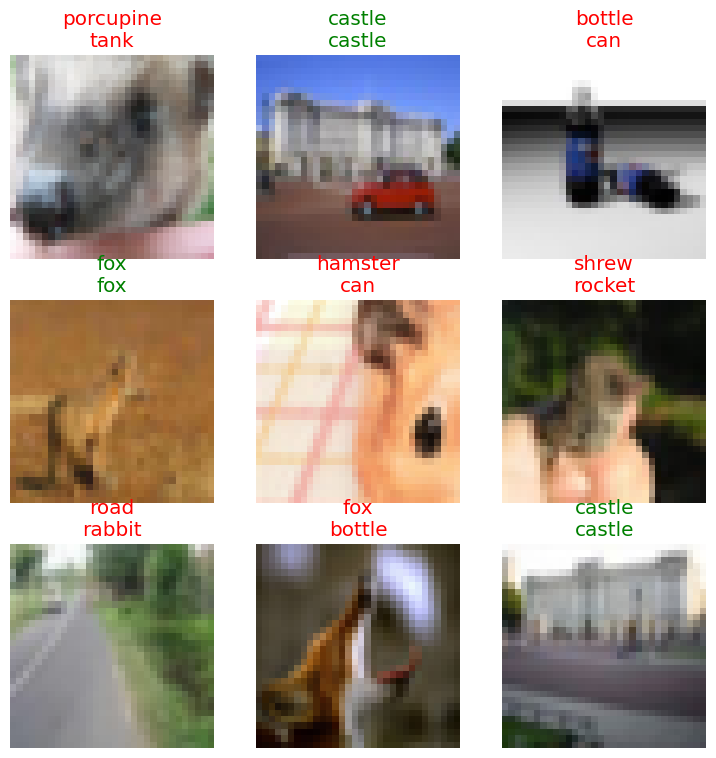

In [ ]:
# Objeto Learner
Dropout_learn = Learner(train_val_CIFAR100dl, Dropout_baseNet, loss_func = CrossEntropyLossFlat(), metrics = accuracy)

# Encontrar el valor óptimo del learning rate (lr)
lr = Dropout_learn.lr_find()
print(f'LEARNING RATE: {lr[0]} \n')

# Ejecutar el optimizador one-cycle
Dropout_learn.fit_one_cycle(n_epoch = 6, lr_max = lr[0])

# Mostrar la curva de accuracy en validación a lo largo de las diferentes épocas
Dropout_learn.recorder.plot_metrics()

# Accuracy en el conjunto de validación
final_metrics_val = Dropout_learn.recorder.values[-1] # Últimos valores de las métricas almacenados en el historial

print('\nACCURACY POR ÉPOCA en el conjunto VALIDATION:')
for i in range(len(Dropout_learn.recorder.values)):
  epoch_metrics_val = Dropout_learn.recorder.values[i]   # Valores de las métricas en la época correspondiente
  epoch_acc_val = epoch_metrics_val[-1]                  # Accuracy en validación en la época correspondiente
  print('\n\tÉPOCA', i, ': ', round(float(epoch_acc_val) * 100, 4), '%')

final_acc_val = final_metrics_val[-1]                    # Accuracy en validación de la última época de entrenamiento

print('\nACCURACY en el conjunto VALIDATION: ', round(float(final_acc_val) * 100, 4), '%\n')

# Mostrar resultados tras el entrenamiento del modelo
Dropout_learn.show_results()

# Mostrar todos los detalles del objeto Learner
Dropout_learn.summary()

### **2.4.1. Análisis de los Resultados**

- Loss en Training: 2.136570

- Loss en Validation: 2.231740

- Accuracy en Validation: 0.343200

Si observamos la tabla que proporciona los valores de las métricas en cada época, observamos que el la pérdida en el conjunto de entrenamiento tiende a disminuir, lo cual es positivo (indica una buena convergencia), y la pérdida en el conjunto de validación también disminuye, indicando que el modelo generaliza bien a datos no vistos.


En dicha tabla, se observa también que el accuracy en el conjunto de validación aumenta gradualmente con el tiempo, lo cual también es positivo.

Si comparamos estos resultados con los del ejercicio 1, se tiene que:

- La pérdida en el conjunto de entrenamiento en el modelo con Dropout es generalmente mayor que en el modelo sin Dropout. Esto indica que el modelo con Dropout está aprendiendo menos los detalles específicos del conjunto de entrenamiento, lo que es un indicio de reducción de sobreajuste.

- La pérdida en el conjunto de validación en el modelo con Dropout es menor en algunas épocas en comparación con el modelo sin Dropout. Esto nos sugiere que el modelo con Dropout generaliza mejor a datos no vistos.

- Aunque Dropout ayuda a reducir el sobreajuste, puede llevar a una pequeña disminución en la precisión o, al menos, mantener prácticamente la misma (como ocurre en este caso). Esto se debe a que algunas neuronas se apagan aleatoriamente durante el entrenamiento, lo que puede dificultar que la red ajuste completamente los datos de entrenamiento.

## **2.5. Mejora 5: Early Stopping**

Early Stopping es una técnica utilizada en el entrenamiento de modelos de deep learning, con el objetivo de evitar el sobreajuste y mejorar la eficiencia del entrenamiento. La idea básica detrás de Early Stopping es detener el entrenamiento del modelo una vez que ciertos criterios de detención se cumplen, evitando así que el modelo continúe aprendiendo más allá del punto óptimo. La elección del número de épocas es crítica. Demasiadas épocas pueden llevar a sobreajuste, mientras que muy pocas pueden resultar en un modelo subentrenado. Early Stopping proporciona una forma de tomar esta decisión de manera adaptativa durante el entrenamiento.

Durante el entrenamiento, se monitorean métricas clave, como la pérdida en el conjunto de entrenamiento y la precisión en el conjunto de validación. Estas métricas proporcionan información sobre el rendimiento del modelo en datos de entrenamiento y datos no vistos.

Los criterios de detención suelen estar basados en el comportamiento de las métricas monitoreadas. Un criterio común es observar si la pérdida en el conjunto de validación deja de disminuir o comienza a aumentar. Otro criterio podría ser si la precisión en el conjunto de validación deja de mejorar.

Para aplicar Early Stopping en FastAI, se añade a la función `fit_one_cycle()` el parámetro `cbs = EarlyStoppingCallback()`, donde a la función `EarlyStoppingCallback()` se le pueden poner parámetros como:

- `monitor`: Indica la métrica que se va a monitorizar para ir viendo si el modelo mejora o no. Si no se especifica, se toma por defecto `monitor = 'valid_loss'`.

- `patience`: Número entero que indica que si el modelo no mejora (en términos de la métrica especificada en `monitor`) en un número `patience` de épocas seguidas, entonces se detiene el entrenamiento.

Para más información, se puede consultar la siguiente documentación de FastAI:

[31] https://docs.fast.ai/callback.tracker.html#earlystoppingcallback

LEARNING RATE: 0.0006918309954926372 



No improvement since epoch 13: early stopping


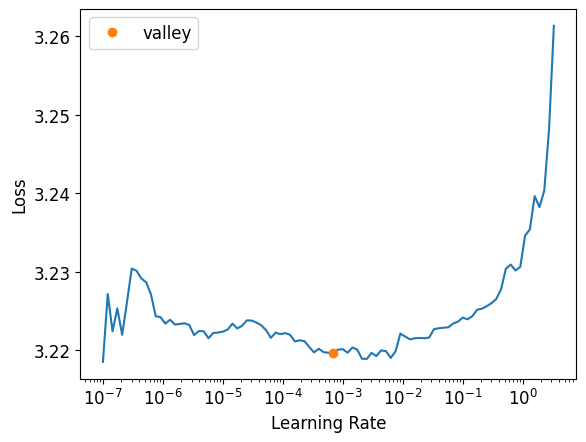

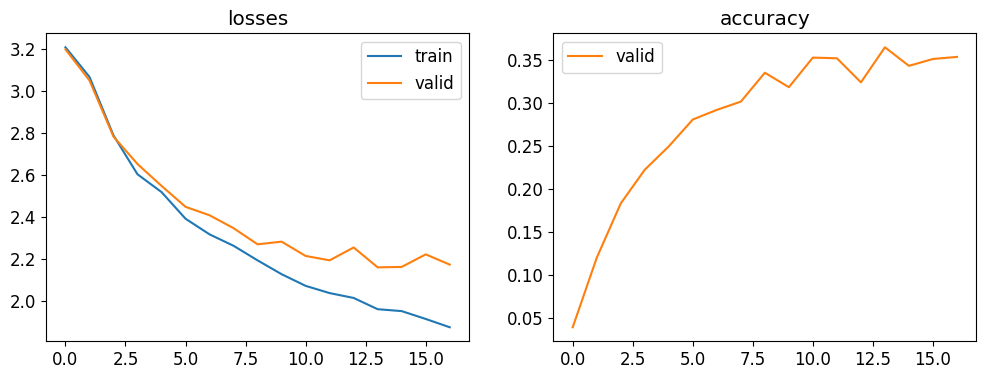


ACCURACY POR ÉPOCA en el conjunto VALIDATION:

	ÉPOCA 0 :  3.92 %

	ÉPOCA 1 :  12.0 %

	ÉPOCA 2 :  18.32 %

	ÉPOCA 3 :  22.24 %

	ÉPOCA 4 :  24.96 %

	ÉPOCA 5 :  28.08 %

	ÉPOCA 6 :  29.2 %

	ÉPOCA 7 :  30.16 %

	ÉPOCA 8 :  33.52 %

	ÉPOCA 9 :  31.84 %

	ÉPOCA 10 :  35.28 %

	ÉPOCA 11 :  35.2 %

	ÉPOCA 12 :  32.4 %

	ÉPOCA 13 :  36.48 %

	ÉPOCA 14 :  34.32 %

	ÉPOCA 15 :  35.12 %

	ÉPOCA 16 :  35.36 %

ACCURACY en el conjunto VALIDATION:  35.36 %



Sequential (Input shape: 32 x 3 x 32 x 32)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 4 x 26 x 26    
Conv2d                                    592        True      
ReLU                                                           
____________________________________________________________________________
                     32 x 4 x 13 x 13    
MaxPool2d                                                      
____________________________________________________________________________
                     32 x 10 x 9 x 9     
Conv2d                                    1010       True      
ReLU                                                           
____________________________________________________________________________
                     32 x 810            
Flatten                                                        
____________________________________________________________________________
                     32 x 50     

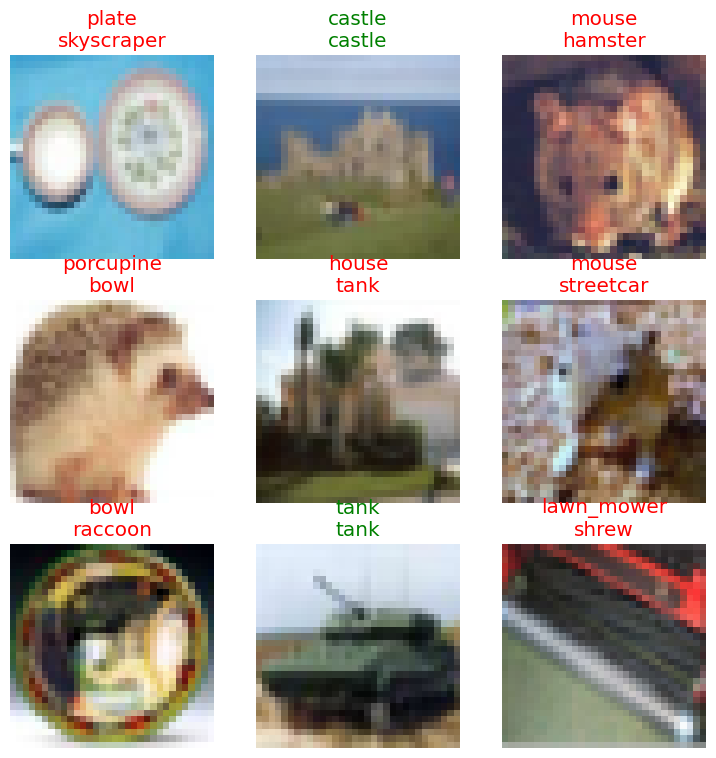

In [ ]:
# Objeto Learner
EarlyStopping_learn = Learner(train_val_CIFAR100dl, baseNet, loss_func = CrossEntropyLossFlat(), metrics = accuracy)

# Encontrar el valor óptimo del learning rate (lr)
lr = EarlyStopping_learn.lr_find()
print(f'LEARNING RATE: {lr[0]} \n')

# Ejecutar el optimizador one-cycle
EarlyStopping_learn.fit_one_cycle(n_epoch = 30, lr_max = lr[0], cbs = EarlyStoppingCallback(patience = 3))    # Early Stopping

# Mostrar la curva de accuracy en validación a lo largo de las diferentes épocas
EarlyStopping_learn.recorder.plot_metrics()

# Accuracy en el conjunto de validación
final_metrics_val = EarlyStopping_learn.recorder.values[-1] # Últimos valores de las métricas almacenados en el historial

print('\nACCURACY POR ÉPOCA en el conjunto VALIDATION:')
for i in range(len(EarlyStopping_learn.recorder.values)):
  epoch_metrics_val = EarlyStopping_learn.recorder.values[i]  # Valores de las métricas en la época correspondiente
  epoch_acc_val = epoch_metrics_val[-1]                       # Accuracy en validación en la época correspondiente
  print('\n\tÉPOCA', i, ': ', round(float(epoch_acc_val) * 100, 4), '%')

final_acc_val = final_metrics_val[-1]                    # Accuracy en validación de la última época de entrenamiento

print('\nACCURACY en el conjunto VALIDATION: ', round(float(final_acc_val) * 100, 4), '%\n')

# Mostrar resultados tras el entrenamiento del modelo
EarlyStopping_learn.show_results()

# Mostrar todos los detalles del objeto Learner
EarlyStopping_learn.summary()

Vemos que se indica que no ha habido mejora del `valid_loss` (decremento en el caso de dicha métrica) en las 3 épocas siguientes a la época 13, por lo que el entrenamiento del modelo termina.

### **2.5.1. Análisis de los Resultados**

- Loss en Training: 1.873432

- Loss en Validation: 2.172318

- Accuracy en Validation: 0.353600

Si comparamos estos resultados con los del ejercicio 1, se tiene que:

- El modelo con Early Stopping muestra una pérdida en el conjunto de entrenamiento menor en la mayoría de las épocas, indicando una mejor convergencia y ajuste a los datos de entrenamiento.

- El modelo con Early Stopping tiene una pérdida en el conjunto de validación menor en varias épocas, lo cual indica una mejor generalización a datos no vistos.

- El accuracy en el conjunto de validación es más alto para el modelo con Early Stopping, sugiriendo que este modelo es capaz de realizar predicciones más precisas en datos no utilizados durante el entrenamiento.

- Como se esperaba, la introducción de Early Stopping parece contribuir a una reducción del sobreajuste, ya que la pérdida en el conjunto de entrenamiento es menor en comparación con el modelo original en varias épocas.

## **2.6. Mejora 6: Data Augmentation**

La técnica de Data Augmentation es una estrategia utilizada en el entrenamiento de modelos de deep learning para mejorar la capacidad de generalización del modelo y reducir el sobreajuste. Consiste en aplicar transformaciones aleatorias y realistas a los datos de entrenamiento, generando así nuevas muestras de datos a partir de las existentes. Estas transformaciones no cambian la etiqueta de la clase, pero introducen variabilidad en la apariencia de las imágenes.

Algunas de las transformaciones comunes realizadas durante la data augmentation en el contexto de imágenes incluyen:

1. Rotación: Girar la imagen en un ángulo aleatorio.
2. Desplazamiento horizontal y vertical: Mover la imagen hacia la derecha izquierda o arriba/abajo.
3. Zoom: Aumentar o disminuir el tamaño de la imagen.
4. Inversión horizontal/vertical: Reflejar la imagen horizontal o verticalmente.

Al aplicar esta técnica, se generan nuevas instancias de datos, lo que amplía el conjunto de entrenamiento y evita el sobreajuste al proporcionar al modelo una variedad más amplia de ejemplos. Esta variabilidad introducida ayuda al modelo a aprender patrones más robustos y a generalizar mejor a datos no vistos. También ayuda a que el modelo sea invariante a ciertas transformaciones, lo que significa que el modelo será capaz de reconocer objetos independientemente de su orientación, posición, tamaño, etc.

En FastAI, para aplicar Data Augmentation, tenemos la función `aug_transforms()`, la cual debe colocarse en el parámetro `batch_tfms` de la función `DataBlock()` a la hora de crear nuestro Datablock o en la función `dataloaders()` a la hora de crear nuestro Dataload. Se pueden modificar diferentes parámetros de la función `aug_transforms()` con el fin de adaptar las transformaciones que se quieren realizar (se puede especificar el mínimo y el máximo de zoom a aplicar, el máximo grado de rotación, etc.).

En nuestro caso, en la función `aug_transforms()` solo especificamos el parámetro `mult = 2` (por defecto tiene un valor de 1), el cual indica el valor por el cual se multiplican los valores de los parámetros `max_rotate`, `max_lightning` y `max_warp`.

Para más información, se puede consultar la siguiente documentación de FastAI:

[32] https://docs.fast.ai/vision.augment.html#aug_transforms

In [ ]:
# Definición del Datablock
DataAug_CIFAR100db = DataBlock(
                        blocks    = (ImageBlock, CategoryBlock),
                        get_items = get_image_files,
                        splitter  = RandomSplitter(valid_pct = 0.1, seed = 42),
                        get_y     = parent_label
                     )

# Definición del DataLoad para el conjunto de datos de entrenamiento y el conjunto de datos de validación
DataAug_train_val_CIFAR100dl = DataAug_CIFAR100db.dataloaders(path/'train', bs = 32, batch_tfms = aug_transforms(mult = 2))  # Data Augmentation

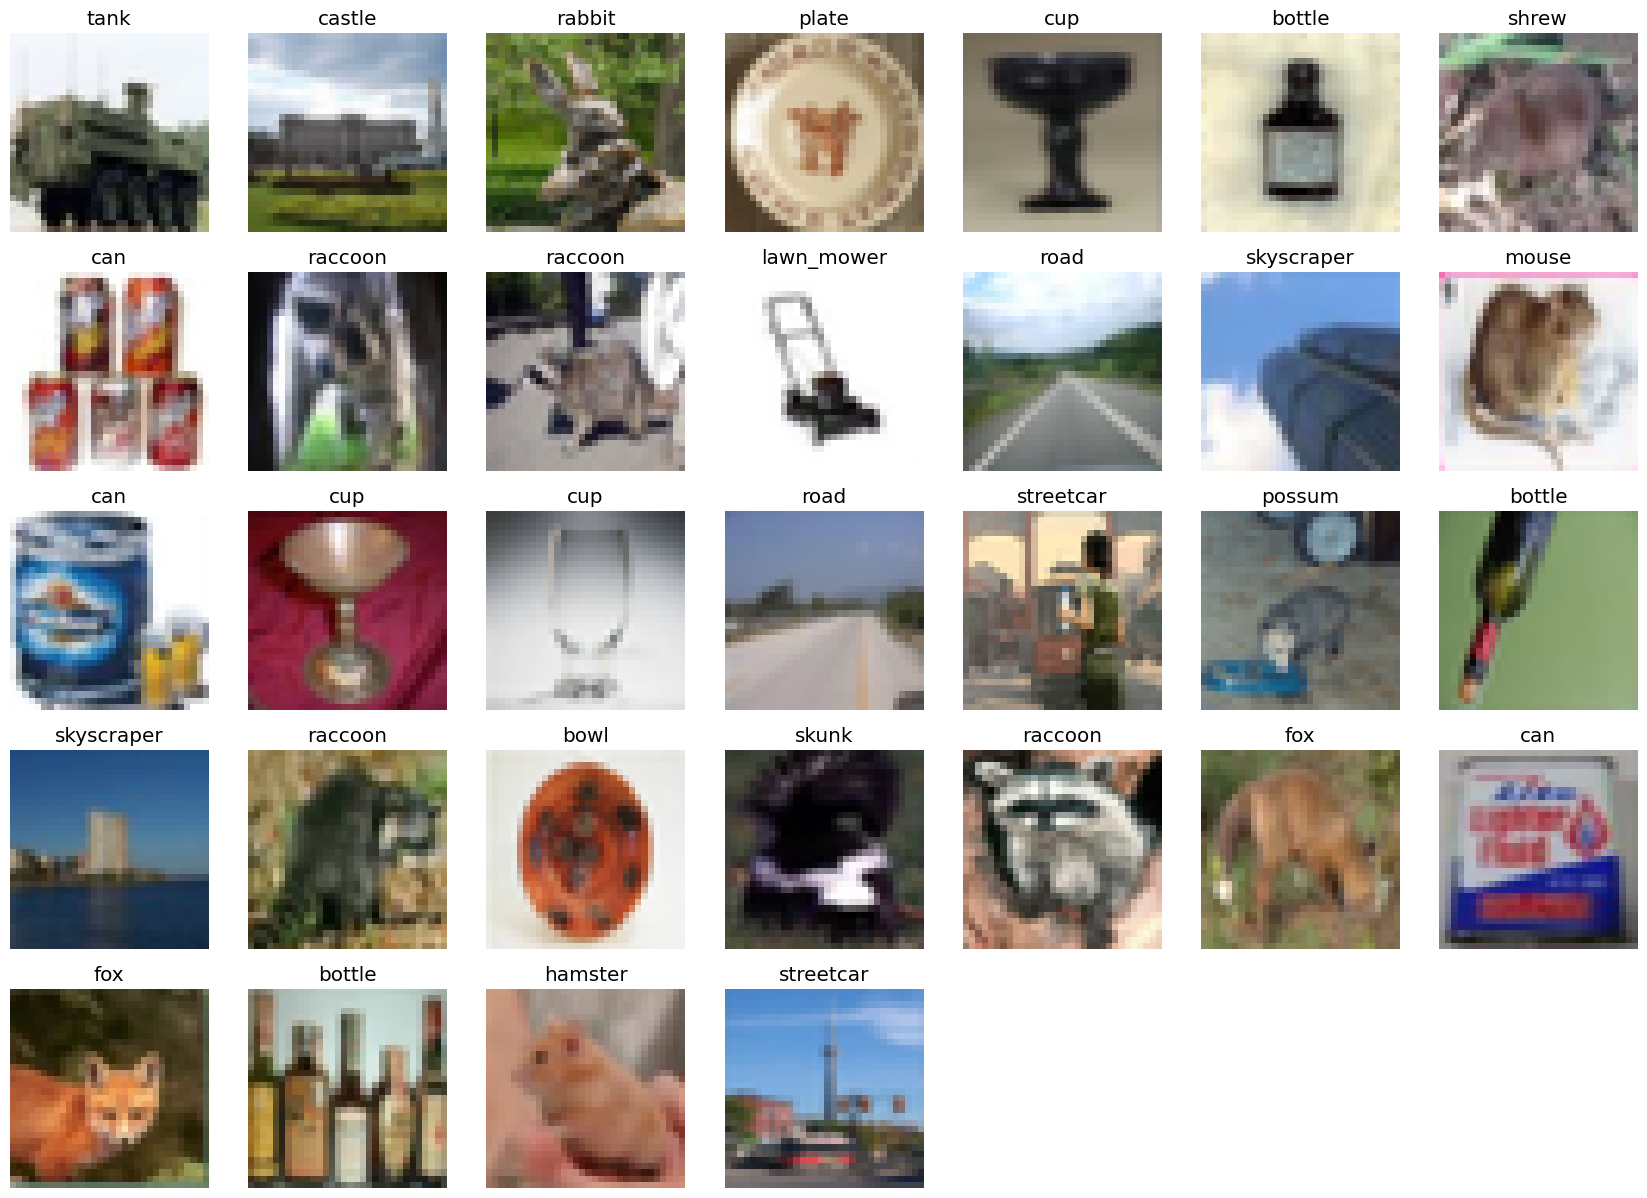

In [ ]:
# Muestra un batch de imágenes del conjunto de entrenamiento
DataAug_train_val_CIFAR100dl.train.show_batch(max_n = 32)

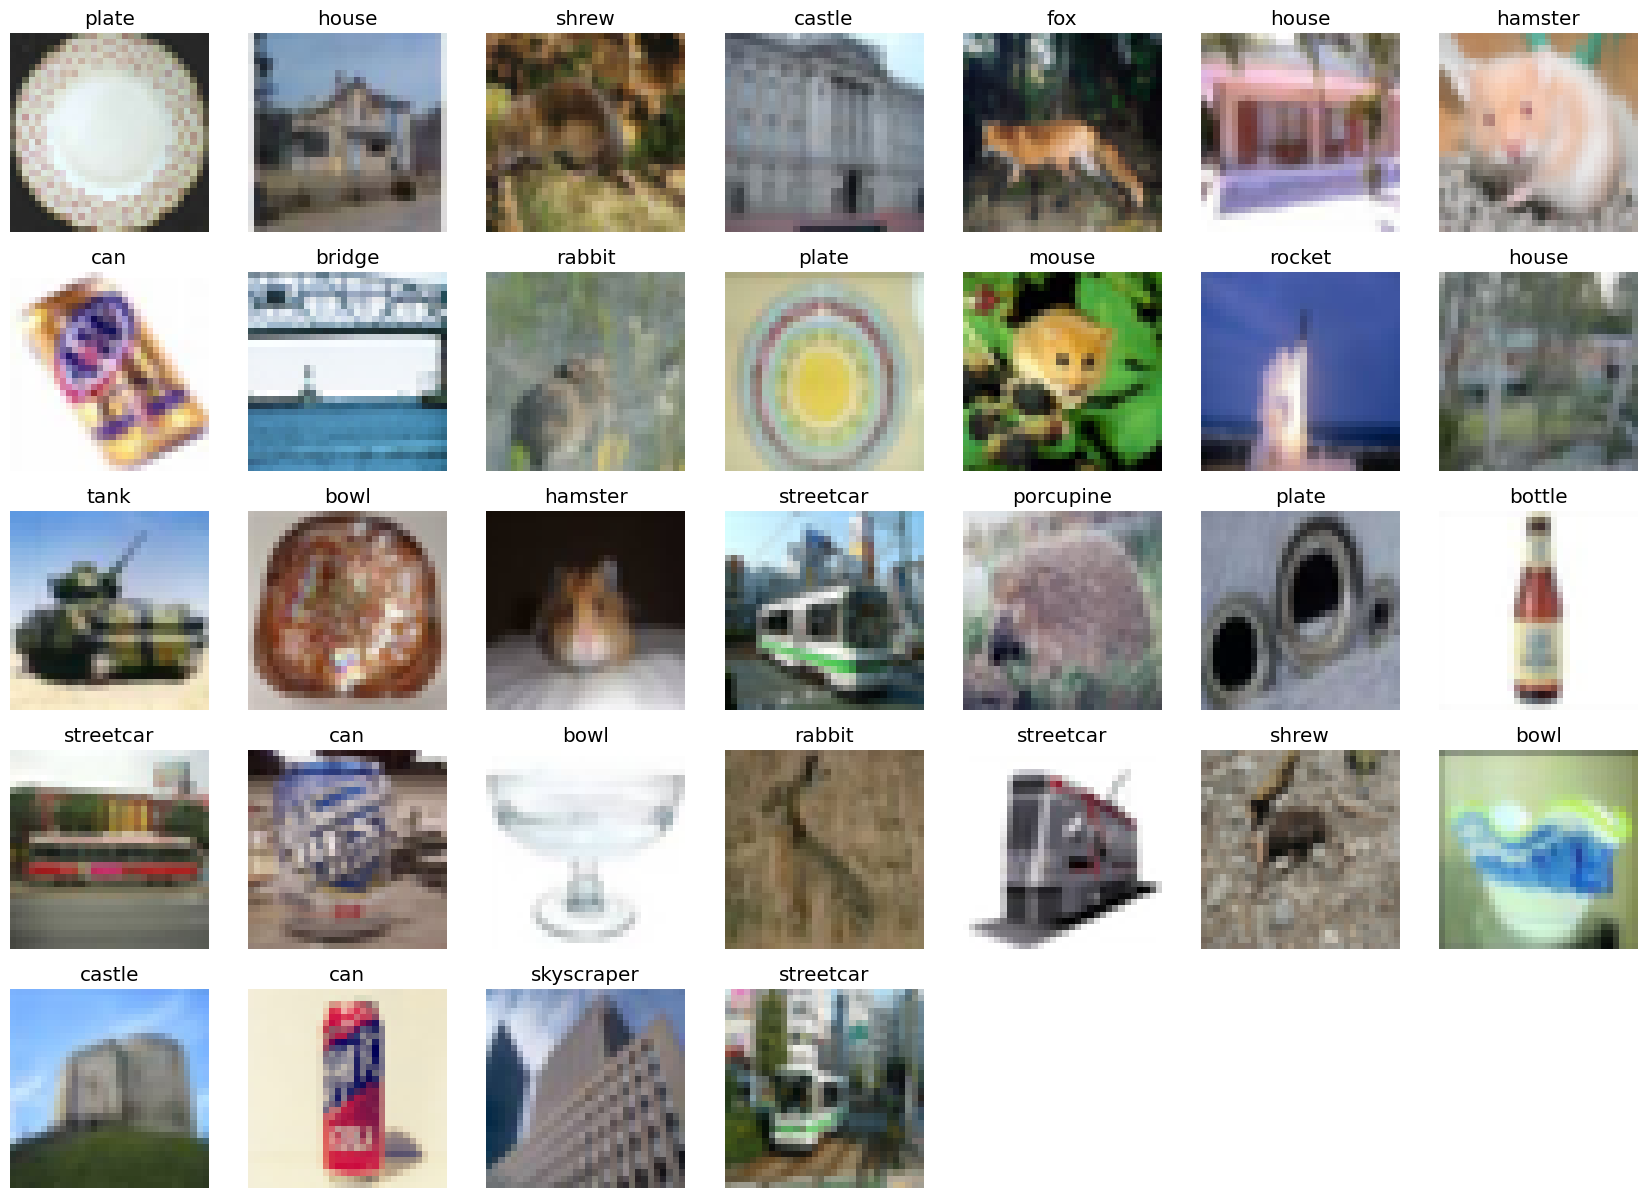

In [ ]:
# Muestra un batch de imágenes del conjunto de validación
DataAug_train_val_CIFAR100dl.valid.show_batch(max_n = 32)

Esta técnica solo se aplica al conjunto de entrenamiento (no al de validación ni al de test). A la hora de mostrar un batch de imágenes del conjunto de entrenamiento, se observa en algunas imágenes que las transformaciones se están aplicando correctamente. Se planteó la duda de si el incluir `batch_tfms = aug_transforms()` en `DataAug_CIFAR100db.dataloaders()` también aplicaba las transformaciones al conjunto de validación (lo cual no debería de hacerse). En un primer momento, a la hora de mostrar un batch de imágenes del conjunto de validación, parece ser que dichas transformaciones no se aplican en el conjunto. Sin embargo, omo las imágenes del dataset CIFAR100 son pequeñas (y por lo tanto, borrosas), no estábamos seguros del todo. Por ello, se ha probado el mismo código pero con el dataset MNIST, en el cual hemos corroborado que las transformaciones solo se aplican al conjunto de entrenamiento (excluyendo el conjunto de validación).

LEARNING RATE: 0.0002754228771664202 



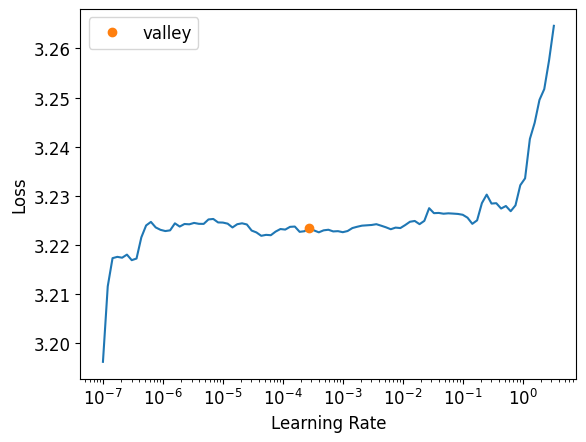

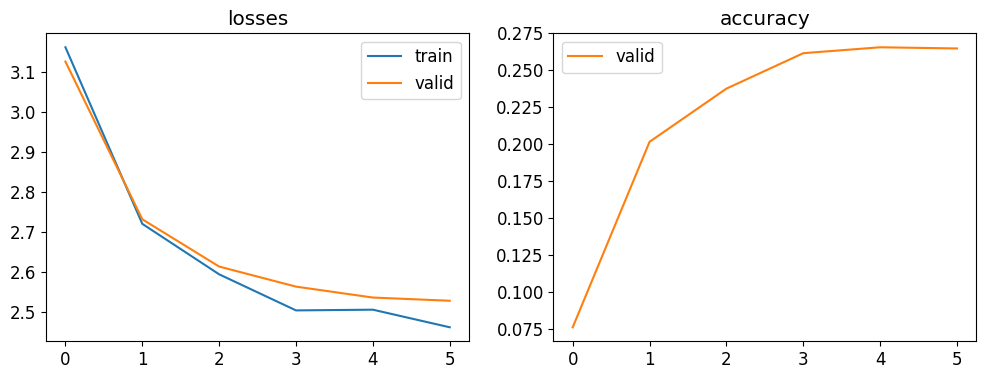


ACCURACY POR ÉPOCA en el conjunto VALIDATION:

	ÉPOCA 0 :  7.6 %

	ÉPOCA 1 :  20.16 %

	ÉPOCA 2 :  23.76 %

	ÉPOCA 3 :  26.16 %

	ÉPOCA 4 :  26.56 %

	ÉPOCA 5 :  26.48 %

ACCURACY en el conjunto VALIDATION:  26.48 %



Sequential (Input shape: 32 x 3 x 32 x 32)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 4 x 26 x 26    
Conv2d                                    592        True      
ReLU                                                           
____________________________________________________________________________
                     32 x 4 x 13 x 13    
MaxPool2d                                                      
____________________________________________________________________________
                     32 x 10 x 9 x 9     
Conv2d                                    1010       True      
ReLU                                                           
____________________________________________________________________________
                     32 x 810            
Flatten                                                        
____________________________________________________________________________
                     32 x 50     

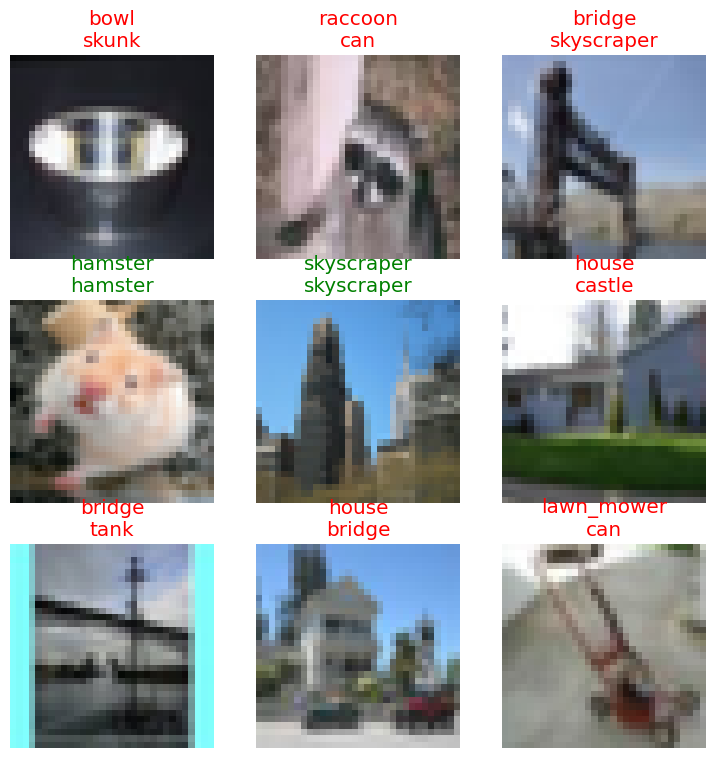

In [ ]:
# Objeto Learner
DataAug_learn = Learner(DataAug_train_val_CIFAR100dl, baseNet, loss_func = CrossEntropyLossFlat(), metrics = accuracy)

# Encontrar el valor óptimo del learning rate (lr)
lr = DataAug_learn.lr_find()
print(f'LEARNING RATE: {lr[0]} \n')

# Ejecutar el optimizador one-cycle
DataAug_learn.fit_one_cycle(n_epoch = 6, lr_max = lr[0])

# Mostrar la curva de accuracy en validación a lo largo de las diferentes épocas
DataAug_learn.recorder.plot_metrics()

# Accuracy en el conjunto de validación
final_metrics_val = DataAug_learn.recorder.values[-1] # Últimos valores de las métricas almacenados en el historial

print('\nACCURACY POR ÉPOCA en el conjunto VALIDATION:')
for i in range(len(DataAug_learn.recorder.values)):
  epoch_metrics_val = DataAug_learn.recorder.values[i]  # Valores de las métricas en la época correspondiente
  epoch_acc_val = epoch_metrics_val[-1]                 # Accuracy en validación en la época correspondiente
  print('\n\tÉPOCA', i, ': ', round(float(epoch_acc_val) * 100, 4), '%')

final_acc_val = final_metrics_val[-1]                    # Accuracy en validación de la última época de entrenamiento

print('\nACCURACY en el conjunto VALIDATION: ', round(float(final_acc_val) * 100, 4), '%\n')

# Mostrar resultados tras el entrenamiento del modelo
DataAug_learn.show_results()

# Mostrar todos los detalles del objeto Learner
DataAug_learn.summary()

### **2.6.1. Análisis de los Resultados**

- Loss en Training: 2.462956

- Loss en Validation: 2.529101

- Accuracy en Validation: 0.264800

Si comparamos estos resultados con los del ejercicio 1, se tiene que:

- El modelo con Data Augmentation tiene una tendencia a tener un loss de entrenamiento más alto en las primeras épocas, pero en las últimas épocas, la diferencia se reduce.

- En varias épocas, el modelo con Data Augmentation muestra un ligero aumento en la pérdida en el conjunto de validación en comparación con el modelo sin técnica aplicada. Esto podría indicar que la Data Augmentation no ha mejorado significativamente la generalización.

- El modelo sin técnica aplicada muestra un accuracy en el conjunto de validación más alto en la mayoría de las épocas, indicando que podría estar generalizando mejor. De igual forma, como se ha comentado anteriormente, este no es nuestro modelo final, solo estamos ilustrando una a una cada una de las diferentes técnicas para ya finalmente combinarlas y conseguir una gran mejora del accuracy obtenido en el modelo del ejercicio 1.

- Data Augmentation está ayudando a reducir la brecha entre el rendimiento en el conjunto de entrenamiento y el conjunto de validación, indicando una reducción en el sobreajuste.


## **2.7. Modelo Final**

Haciendo una combinación de todas las técnicas anteriores, construímos nuestro modelo final como se muestra a continuación (existen infinitos ajustes posibles y ninguna fórmula exacta que utilizar, por lo que se ha ido experimentando con diferentes valores de los hiperparámetros hasta alcanzar una especificación que nos ofrece buenos resultados, así como probando con el número de capas convolucionales a añadir, pero siempre siguiendo la lógica y la intuición):

### **2.7.1. Preparación y Carga de Datos**

In [ ]:
# Transformaciones de Data Augmentation
tfms = aug_transforms(max_rotate = 20, max_zoom = 1.5, max_lighting = 0.5, max_warp = 0.1, p_affine = 0.5)

# Definición del Datablock
final_CIFAR100db = DataBlock(
                          blocks     = (ImageBlock, CategoryBlock),
                          get_items  = get_image_files,
                          splitter   = RandomSplitter(valid_pct = 0.1, seed = 42),
                          get_y      = parent_label,
                          item_tfms  = Resize(64),                                    # Redimensionamos las imágenes  de 32 x 32 a 64 x 64 píxeles
                          batch_tfms = [Normalize.from_stats(*cifar_stats), *tfms]    # Data Normalization y Data Augmentation
                      )

# Definición del DataLoad para el conjunto de datos de entrenamiento y el conjunto de datos de validación
final_train_val_CIFAR100dl = final_CIFAR100db.dataloaders(path/'train', bs = 32)


### **2.7.2. Definición del Modelo**

In [ ]:
final_baseNet = nn.Sequential(
    nn.Conv2d(in_channels = 3, out_channels = 64, kernel_size = (3,3)),     # Capa 1: Convolución
    nn.BatchNorm2d(num_features = 64),                                      # Capa 2: Batch Normalization después de la capa de convolución
    nn.ReLU(),                                                              # Capa 3: Función de Activación ReLU
    nn.Conv2d(in_channels = 64, out_channels = 64, kernel_size = (3,3)),    # Capa 4: Convolución
    nn.BatchNorm2d(num_features = 64),                                      # Capa 5: Batch Normalization después de la capa de convolución
    nn.ReLU(),                                                              # Capa 6: Función de Activación ReLU
    nn.MaxPool2d(kernel_size = (2,2)),                                      # Capa 7: Agrupación Máxima (MaxPooling2D 2x2)
    nn.Conv2d(in_channels = 64, out_channels = 128, kernel_size = (3,3)),   # Capa 8: Convolución
    nn.BatchNorm2d(num_features = 128),                                     # Capa 9: Batch Normalization después de la capa de convolución
    nn.ReLU(),                                                              # Capa 10: Función de Activación ReLU
    nn.Conv2d(in_channels = 128, out_channels = 128, kernel_size = (3,3)),  # Capa 11: Convolución
    nn.BatchNorm2d(num_features = 128),                                     # Capa 12: Batch Normalization después de la capa de convolución
    nn.ReLU(),                                                              # Capa 13: Función de Activación ReLU
    nn.Conv2d(in_channels = 128, out_channels = 256, kernel_size = (3,3)),  # Capa 14: Convolución
    nn.BatchNorm2d(num_features = 256),                                     # Capa 15: Batch Normalization después de la capa de convolución
    nn.ReLU(),                                                              # Capa 16: Función de Activación ReLU
    nn.Conv2d(in_channels = 256, out_channels = 256, kernel_size = (3,3)),  # Capa 17: Convolución
    nn.BatchNorm2d(num_features = 256),                                     # Capa 18: Batch Normalization después de la capa de convolución
    nn.ReLU(),                                                              # Capa 19: Función de Activación ReLU
    nn.MaxPool2d(kernel_size = (2,2)),                                      # Capa 20: Agrupación Máxima (MaxPooling2D 2x2)
    nn.Conv2d(in_channels = 256, out_channels = 512, kernel_size = (3,3)),  # Capa 21: Convolución
    nn.BatchNorm2d(num_features = 512),                                     # Capa 22: Batch Normalization después de la capa de convolución
    nn.ReLU(),                                                              # Capa 23: Función de Activación ReLU
    nn.Conv2d(in_channels = 512, out_channels = 512, kernel_size = (3,3)),  # Capa 24: Convolución
    nn.BatchNorm2d(num_features = 512),                                     # Capa 25: Batch Normalization después de la capa de convolución y la función de activación
    nn.ReLU(),                                                              # Capa 26: Función de Activación ReLU
    nn.MaxPool2d(kernel_size = (2,2)),                                      # Capa 27: Agrupación Máxima (MaxPooling2D 2x2)
    nn.Flatten(),                                                           # Capa 28: Pasar de tensor tridimensional a tensor unidimensional (vector 1D)
    nn.Linear(in_features = 4608, out_features = 512),                      # Capa 29: Fully-Connected
    nn.BatchNorm1d(num_features = 512),                                     # Capa 30: Batch Normalization después de la capa fully-connected
    nn.Dropout(p = 0.3),                                                    # Capa 31: Dropout con una tasa de 0.3
    nn.ReLU(),                                                              # Capa 32: Función de Activación ReLU
    nn.Linear(in_features = 512, out_features = 25),                        # Capa 33: Fully-Connected (25 clases de salida)
)

Al igual que hicimos en el ejercicio 1, vamos a calcular el número total de parámetros de nuestro modelo, para lo cual necesitamos sumar el número de parámetros en cada capa.

Recordemos que la fórmula general para calcular el número de parámetros en una capa convolucional es:

$$ \text{Número de parámetros} = (\text{Tamaño del kernel} ⋅ \text{Número de canales de entrada} + 1\ \text{(en caso de haber bias)}) ⋅ \text{Número de canales de salida}$$

También calcularemos el volumen de salida de cada capa convolucional, el cual se calcula mediante la fórmula:

$$ \text{Tamaño de salida} = \left( \frac{N + 2 \cdot P - F}{\text{stride}} \right) + 1 $$

donde:

- $\text{Tamaño de salida}$: Tamaño de la salida de la capa convolucional. Representa las dimensiones (altura y ancho) del volumen resultante después de aplicar la operación de convolución.

- $N$: Tamaño de la entrada (input volume). En el contexto de la capa convolucional, esto se refiere al tamaño de la imagen de entrada.

- $P$: Es el tamaño del relleno (padding). Como ya se explicó anteriormente, el relleno se agrega a la entrada antes de aplicar la convolución y este ayuda a mantener el tamaño de la salida. Puede ser útil para evitar la pérdida de información en los bordes de la imagen.

- $F$: Altura/Anchura (son iguales) del filtro/kernel.

- $stride$: Es el tamaño del paso (stride). Como ya se explicó anteriormente, este indica la cantidad de píxeles que el filtro se desplaza en cada paso durante la convolución.

Recordemos también la fórmula general para calcular el número de parámetros en una capa fully-connected:

$$ \text{Número de parámetros} = (\text{in_features} + 1\ \text{(en caso de haber bias)}) ⋅ \text{out_features}$$

donde:

- $\text{in_features}$: Número de neuronas en la entrada de la capa.
- $\text{out_features}$: Número de neuronas en la salida de la capa.

Ahora tenemos también capas de Batch Normalization, la cual tiene dos conjuntos de parámetros: uno para la escala (weight) y otro para el sesgo (bias). Así, la fórmula general para calcular el número de parámetros en una capa de Batch Normalization con num_features características es:

$$\text{Número de parámetros} = 2 ⋅ \text{num_features}$$


Hay que tener en cuenta que redimensionamos las dimensiones de las imágenes de entrada iniciales, pasando de 32 x 32 píxeles a 64 x 64 píxeles. Vamos a desglosar la cuenta para cada capa del modelo:

1. Primera capa convolucional:
  - Volumen de entrada: 64 x 64 x 3 ($N = 64$).
  - Filtros/Kernels usados: 64 de 3 x 3 con stride 1 y padding 0 ($F = 3, P = 0, stride = 1$).
  - Volumen de salida: (64 + 2 * 0 - 3) / 1 + 1 = 62 --> 62 x 62 x 64
  - Número de parámetros: Cada filtro tiene 3 * 3 * 3 + 1 = 28 parámetros --> La capa tiene 28 * 64 = 1792 parámetros.

2. Primera capa de Batch Normalization:
  - num_features: 64.
  - Número de parámetros: 2 * 64 = 128

3. Primera capa de activación ReLU: No se calculan parámetros.

4. Segunda capa convolucional:
  - Volumen de entrada: 62 x 62 x 64 ($N = 62$).
  - Filtros/Kernels usados: 64 de 3 x 3 con stride 1 y padding 0 ($F = 3, P = 0, stride = 1$).
  - Volumen de salida: (62 + 2 * 0 - 3) / 1 + 1 = 60 --> 60 x 60 x 64
  - Número de parámetros: Cada filtro tiene 3 * 3 * 64 + 1 = 577 parámetros --> La capa tiene 577 * 64 = 36 928 parámetros.

5. Segunda capa de Batch Normalization:
  - num_features: 64.
  - Número de parámetros: 2 * 64 = 128

6. Segunda capa de activación ReLU: No se calculan parámetros.

7. Primera capa de Max Pooling: No se calculan parámetros (pero, al aplicarse un filtro 2 x 2, reduce a la mitad las dimensiones del volumen de salida de la anterior capa convolucional. Es decir, si el volumen de salida era de 60 x 60 x 64, ahora pasa a ser de 30 x 30 x 64).

8. Tercera capa convolucional:
  - Volumen de entrada: 30 x 30 x 64 ($N = 30$).
  - Filtros/Kernels usados: 128 de 3 x 3 con stride 1 y padding 0 ($F = 3, P = 0, stride = 1$).
  - Volumen de salida: (30 + 2 * 0 - 3) / 1 + 1 = 28 --> 28 x 28 x 128
  - Número de parámetros: Cada filtro tiene 3 * 3 * 64 + 1 = 577 parámetros --> La capa tiene 577 * 128 = 73 856 parámetros.

9. Tercera capa de Batch Normalization:
  - num_features: 128.
  - Número de parámetros: 2 * 128 = 256

10. Tercera capa de activación ReLU: No se calculan parámetros.

11. Cuarta capa convolucional:
  - Volumen de entrada: 28 x 28 x 128 ($N = 28$).
  - Filtros/Kernels usados: 128 de 3 x 3 con stride 1 y padding 0 ($F = 3, P = 0, stride = 1$).
  - Volumen de salida: (28 + 2 * 0 - 3) / 1 + 1 = 26 --> 26 x 26 x 128
  - Número de parámetros: Cada filtro tiene 3 * 3 * 128 + 1 = 1153 parámetros --> La capa tiene 1153 * 128 = 147 584 parámetros.

12. Cuarta capa de Batch Normalization:
  - num_features: 128.
  - Número de parámetros: 2 * 128 = 256

13. Cuarta capa de activación ReLU: No se calculan parámetros.

14. Quinta capa convolucional:
  - Volumen de entrada: 26 x 26 x 128 ($N = 26$).
  - Filtros/Kernels usados: 256 de 3 x 3 con stride 1 y padding 0 ($F = 3, P = 0, stride = 1$).
  - Volumen de salida: (26 + 2 * 0 - 3) / 1 + 1 = 24 --> 24 x 24 x 256
  - Número de parámetros: Cada filtro tiene 3 * 3 * 128 + 1 = 1153 parámetros --> La capa tiene 1153 * 256 = 295 168 parámetros.

15. Quinta capa de Batch Normalization:
  - num_features: 256.
  - Número de parámetros: 2 * 256 = 512

16. Quinta capa de activación ReLU: No se calculan parámetros.

17. Sexta capa convolucional:
  - Volumen de entrada: 24 x 24 x 256 ($N = 24$).
  - Filtros/Kernels usados: 256 de 3 x 3 con stride 1 y padding 0 ($F = 3, P = 0, stride = 1$).
  - Volumen de salida: (24 + 2 * 0 - 3) / 1 + 1 = 22 --> 22 x 22 x 256
  - Número de parámetros: Cada filtro tiene 3 * 3 * 256 + 1 = 2305 parámetros --> La capa tiene 2305 * 256 = 590 080 parámetros.

18. Sexta capa de Batch Normalization:
  - num_features: 256.
  - Número de parámetros: 2 * 256 = 512

19. Sexta capa de activación ReLU: No se calculan parámetros.

20. Segunda capa de Max Pooling: No se calculan parámetros (pero, al aplicarse un filtro 2 x 2, reduce a la mitad las dimensiones del volumen de salida de la anterior capa convolucional. Es decir, si el volumen de salida era de 22 x 22 x 256, ahora pasa a ser de 11 x 11 x 256).

21. Séptima capa convolucional:
  - Volumen de entrada: 11 x 11 x 256 ($N = 11$).
  - Filtros/Kernels usados: 512 de 3 x 3 con stride 1 y padding 0 ($F = 3, P = 0, stride = 1$).
  - Volumen de salida: (11 + 2 * 0 - 3) / 1 + 1 = 9 --> 9 x 9 x 512
  - Número de parámetros: Cada filtro tiene 3 * 3 * 256 + 1 = 2305 parámetros --> La capa tiene 2305 * 512 = 1 180 160 parámetros.

22. Séptima capa de Batch Normalization:
  - num_features: 512.
  - Número de parámetros: 2 * 512 = 1024

23. Séptima capa de activación ReLU: No se calculan parámetros.

24. Octava capa convolucional:
  - Volumen de entrada: 9 x 9 x 512 ($N = 9$).
  - Filtros/Kernels usados: 512 de 3 x 3 con stride 1 y padding 0 ($F = 3, P = 0, stride = 1$).
  - Volumen de salida: (9 + 2 * 0 - 3) / 1 + 1 = 7 --> 7 x 7 x 512
  - Número de parámetros: Cada filtro tiene 3 * 3 * 512 + 1 = 4609 parámetros --> La capa tiene 409 * 512 = 2 359 808 parámetros.
  
25. Octava capa de Batch Normalization:
  - num_features: 512.
  - Número de parámetros: 2 * 512 = 1024

26. Octava capa de activación ReLU: No se calculan parámetros.

27. Tercera capa de Max Pooling: No se calculan parámetros (pero, al aplicarse un filtro 2 x 2, reduce a la mitad las dimensiones del volumen de salida de la anterior capa convolucional. Es decir, si el volumen de salida era de 7 x 7 x 512, ahora pasa a ser de 3 x 3 x 512).

28. Capa de aplanamiento (Flatten): No se calculan parámetros.

29. Primera capa fully-connected:
  - Número de neuronas en la entrada: 4608 (= 3 * 3 * 512, resultado de aplicar flatten al volumen de salida de la octava capa convolucional tras el max pooling 2 x 2).
  - Número de neuronas en la salida: 512.
  - Número de parámetros: (4608 + 1) * 512 = 2 359 808

30. Novena capa de Batch Normalization:
  - num_features: 512.
  - Número de parámetros: 2 * 512 = 1024

31. Capa de Dropout: No se calculan parámetros.

32. Novena capa de activación ReLU: No se calculan parámetros.

33. Segunda capa fully-connected:
  - Número de neuronas en la entrada: 512 (número de neuronas en la salida de la primera capa fully-connected).
  - Número de neuronas en la salida: 25.
  - Número de parámetros: (512 + 1) * 25 = 12 825

34. Capa de activación Softmax (no se incluye explícitamente en el modelo, pero se encuentra internamente. Véase la respuesta a la segunda pregunta del primer ejercicio): No se calculan parámetros.

Ahora, sumamos el número de parámetros de todas las capas:

$$1792 + 128 + 0 + 36\ 928 + 128 + 0 + 0 + 73\ 856 + 256 + 0 + 147\ 584 + 256 + 0 + 295\ 168 + 512 + 0 + 590\ 080 + 512 + 0 + 0 + 1\ 180\ 160 + 1024 + 0 + 2\ 359\ 808 + 1024 + 0 + 0 + 0 + 2\ 359\ 808 + 1024 + 0 + 0 + 12\ 825 + 0 = 7\ 062\ 873$$

En conclusión:

$$ \text{Número total de parámetros del modelo} = 7\ 062\ 873, $$

De esta forma, construímos la siguiente tabla (similar a la que se muestra en el ejercicio 1) para ilustrar la arquitectura de nuestra red mejorada final:

 Layer Type | Kernel Size (for convolutional layers) | Input / Output Dimension | Input / Output Channels (for convolutional layers)
 :-: | :-: | :-: | :-:
 Conv | 3 x 3 | 64 x 64 / 62 x 62 | 3 / 64       
 BatchNorm | - | 62 x 62 / 62 x 62 | -     
 ReLU | - | 62 x 62 / 62 x 62 | -         
 Conv | 3 x 3 | 62 x 62 / 60 x 60 | 64 / 64       
 BatchNorm | - | 60 x 60 / 60 x 60 | -     
 ReLU | - | 60 x 60 / 60 x 60 | -    
 MaxPooling | 2 x 2 | 60 x 60 / 30 x 30 | -
 Conv | 3 x 3 | 30 x 30 / 28 x 28 | 64 / 128       
 BatchNorm | - | 28 x 28 / 28 x 28 | -     
 ReLU | - | 28 x 28 / 28 x 28 | -         
 Conv | 3 x 3 | 28 x 28 / 26 x 26 | 128 / 128       
 BatchNorm | - | 26 x 26 / 26 x 26 | -     
 ReLU | - | 26 x 26 / 26 x 26 | -         
 Conv | 3 x 3 | 26 x 26 / 24 x 24 | 128 / 256       
 BatchNorm | - | 24 x 24 / 24 x 24 | -     
 ReLU | - | 24 x 24 / 24 x 24 | -         
 Conv | 3 x 3 | 24 x 24 / 22 x 22 | 256 / 256       
 BatchNorm | - | 22 x 22 / 22 x 22 | -     
 ReLU | - | 22 x 22 / 22 x 22 | -         
 MaxPooling | 2 x 2 | 22 x 22 / 11 x 11 | -
 Conv | 3 x 3 | 11 x 11 / 9 x 9 | 256 / 512       
 BatchNorm | - | 9 x 9 / 9 x 9 | -     
 ReLU | - | 9 x 9 / 9 x 9 | -         
 Conv | 3 x 3 | 9 x 9 / 7 x 7 | 512 / 512       
 BatchNorm | - | 7 x 7 / 7 x 7 | -     
 ReLU | - | 7 x 7 / 7 x 7 | -         
 MaxPooling | 2 x 2 | 7 x 7 / 3 x 3 | -
 Flatten | - | 3 x 3 / 4608 | -
 FC | - | 4608 / 512 | -
 BatchNorm | - | 512 / 512 | -  
 Dropout | - | 512 / 512 | -
 ReLU | - | 512 / 512 | -         
 FC | - | 512 / 25 | -



### **2.7.3. Entrenamiento y Validación del Modelo**

LEARNING RATE: 0.00015848931798245758 



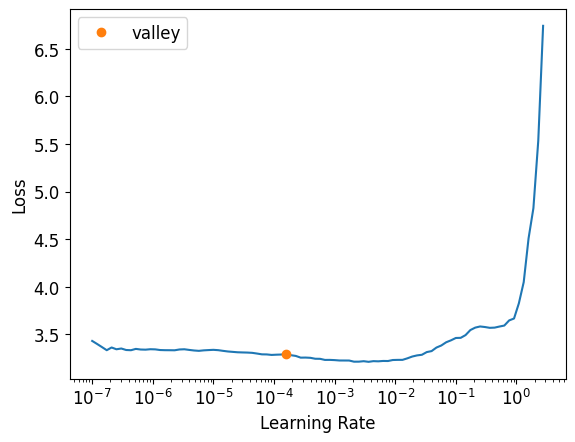

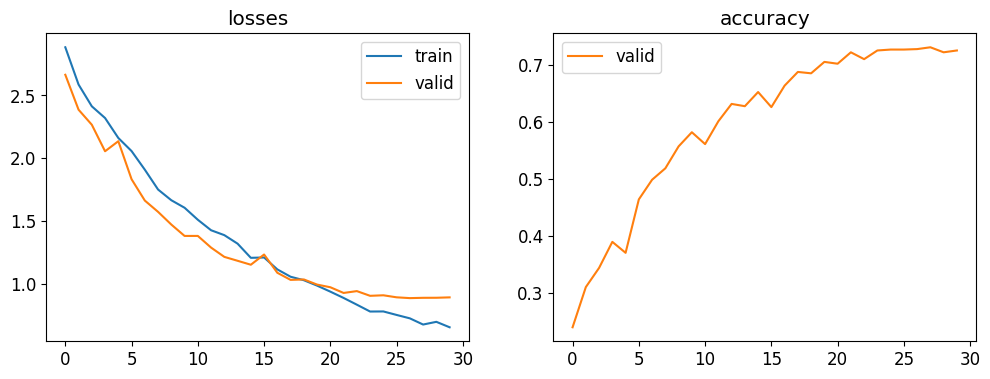


ACCURACY POR ÉPOCA en el conjunto VALIDATION:

	ÉPOCA 0 :  24.0 %

	ÉPOCA 1 :  31.04 %

	ÉPOCA 2 :  34.4 %

	ÉPOCA 3 :  38.96 %

	ÉPOCA 4 :  37.04 %

	ÉPOCA 5 :  46.4 %

	ÉPOCA 6 :  49.84 %

	ÉPOCA 7 :  51.84 %

	ÉPOCA 8 :  55.68 %

	ÉPOCA 9 :  58.16 %

	ÉPOCA 10 :  56.08 %

	ÉPOCA 11 :  60.08 %

	ÉPOCA 12 :  63.12 %

	ÉPOCA 13 :  62.72 %

	ÉPOCA 14 :  65.2 %

	ÉPOCA 15 :  62.56 %

	ÉPOCA 16 :  66.32 %

	ÉPOCA 17 :  68.72 %

	ÉPOCA 18 :  68.48 %

	ÉPOCA 19 :  70.48 %

	ÉPOCA 20 :  70.16 %

	ÉPOCA 21 :  72.16 %

	ÉPOCA 22 :  70.96 %

	ÉPOCA 23 :  72.48 %

	ÉPOCA 24 :  72.64 %

	ÉPOCA 25 :  72.64 %

	ÉPOCA 26 :  72.72 %

	ÉPOCA 27 :  73.04 %

	ÉPOCA 28 :  72.16 %

	ÉPOCA 29 :  72.48 %

ACCURACY en el conjunto VALIDATION:  72.48 %



Sequential (Input shape: 32 x 3 x 64 x 64)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 64 x 62 x 62   
Conv2d                                    1792       True      
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     32 x 64 x 60 x 60   
Conv2d                                    36928      True      
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     32 x 64 x 30 x 30   
MaxPool2d                                                      
____________________________________________________________________________
                     32 x 128 x 28 x 28  
Conv2d                                    7385

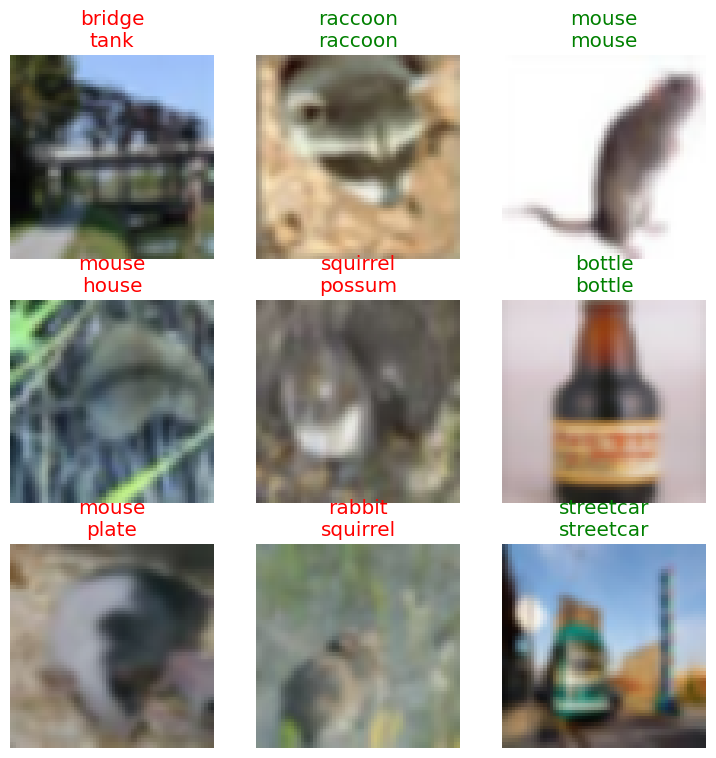

In [ ]:
# Objeto Learner
final_learn = Learner(final_train_val_CIFAR100dl, final_baseNet, loss_func = CrossEntropyLossFlat(), metrics = accuracy)

# Encontrar el valor óptimo del learning rate (lr)
lr = final_learn.lr_find()
print(f'LEARNING RATE: {lr[0]} \n')

# Ejecutar el optimizador one-cycle
final_learn.fit_one_cycle(n_epoch = 30, lr_max = lr[0], cbs = EarlyStoppingCallback(patience = 5))    # Early Stopping

# Mostrar la curva de accuracy en validación a lo largo de las diferentes épocas
final_learn.recorder.plot_metrics()

# Accuracy en el conjunto de validación
final_metrics_val = final_learn.recorder.values[-1] # Últimos valores de las métricas almacenados en el historial

print('\nACCURACY POR ÉPOCA en el conjunto VALIDATION:')
for i in range(len(final_learn.recorder.values)):
  epoch_metrics_val = final_learn.recorder.values[i]  # Valores de las métricas en la época correspondiente
  epoch_acc_val = epoch_metrics_val[-1]               # Accuracy en validación en la época correspondiente
  print('\n\tÉPOCA', i, ': ', round(float(epoch_acc_val) * 100, 4), '%')

final_acc_val = final_metrics_val[-1]                    # Accuracy en validación de la última época de entrenamiento

print('\nACCURACY en el conjunto VALIDATION: ', round(float(final_acc_val) * 100, 4), '%\n')

# Mostrar resultados tras el entrenamiento del modelo
final_learn.show_results()

# Mostrar todos los detalles del objeto Learner
final_learn.summary()

Observamos que, tal y como se esperaba, los números del volumen de salida y los números de parámetros de cada capa (y del modelo completo) proporcionados por  la función `learn.summary()`, coinciden con los números que hemos calculado anteriormente para nuestro modelo. Podemos ver que la nuena arquitectura tiene aproximadamente 7 millones de parámetros, una diferencia bastante grande con respecto a la arquitectura inicial, que recordemos que tenía aproximadamente 40 000 parámetros. Sim embargo, veremos más adelante que, comparando los resultados, compensa enormemente (además, el incremento del tiempo de ejecución de cada época en este nuevo modelo tampoco es muy elevado).

### **2.7.4. Predicciones y Matriz de Confusión**

In [ ]:
# Generación de predicciones del modelo entrenado en el conjunto de entrenamiento
preds, targs, _ = final_learn.get_preds(dl = final_train_val_CIFAR100dl.train, with_decoded = True)

# Accuracy en el conjunto de entrenamiento
acc_train = accuracy(preds, targs)
print('\nACCURACY en el conjunto TRAINING: ', round(float(acc_train) * 100, 4), '%')


ACCURACY en el conjunto TRAINING:  82.6578 %



Número de ejemplos de training: 11250



ACCURACY en el conjunto TRAINING:  82.9067 %


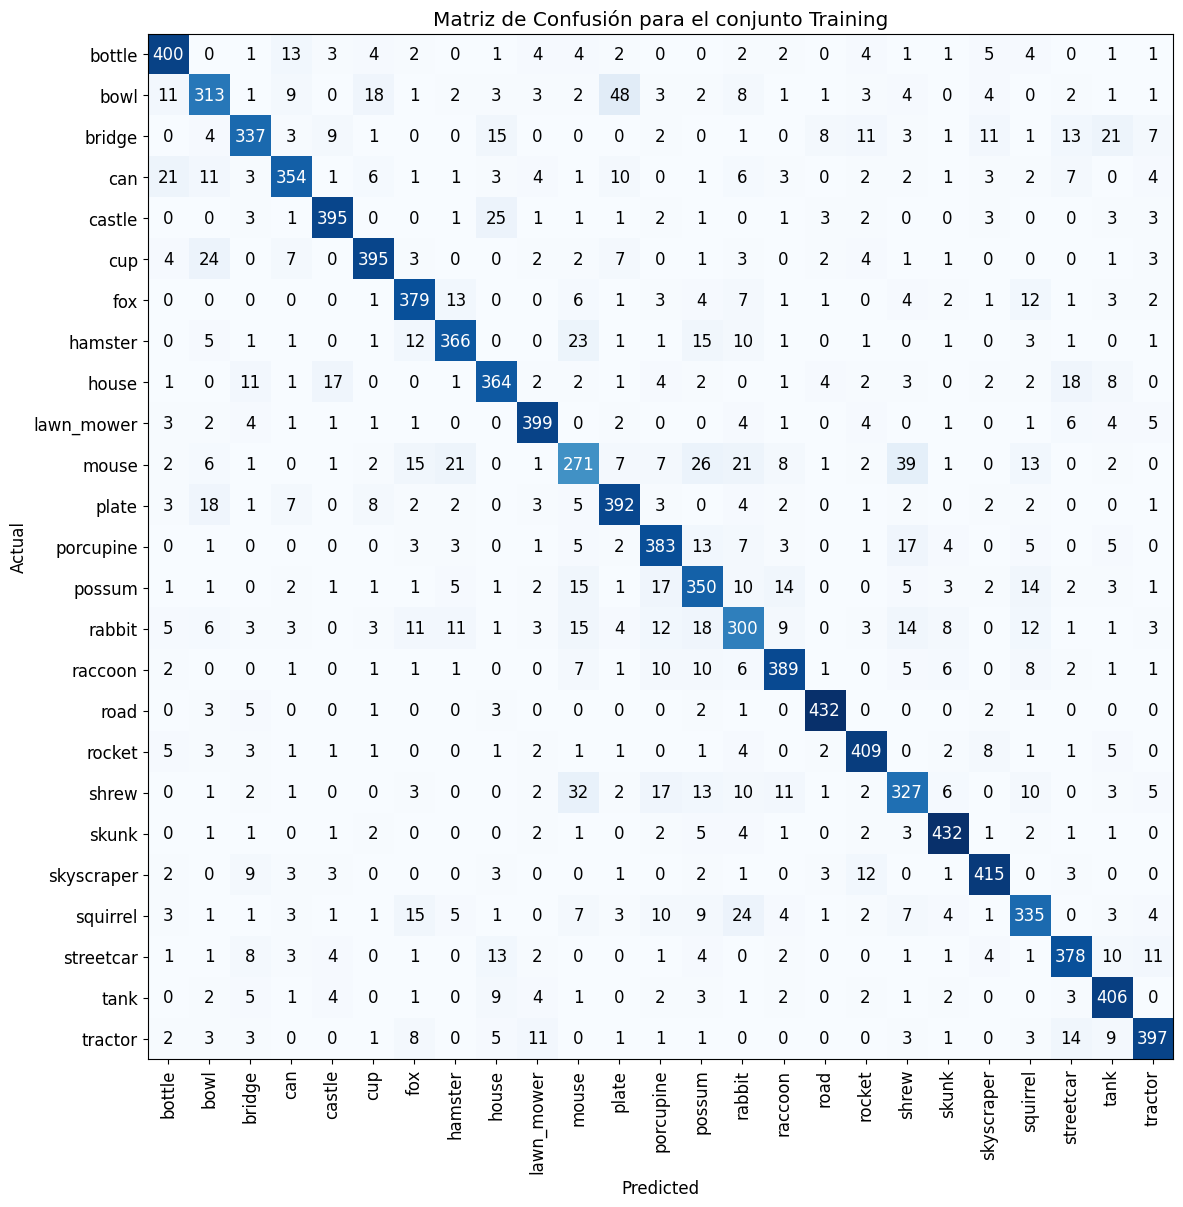

In [ ]:
# Matriz de confusión del conjunto de entrenamiento
interp_train = ClassificationInterpretation.from_learner(final_learn, 0, final_train_val_CIFAR100dl.train)
cm_train = interp_train.confusion_matrix()

print('\nNúmero de ejemplos de training:', np.sum(cm_train))
interp_train.plot_confusion_matrix(figsize = (12, 12), title = 'Matriz de Confusión para el conjunto Training')
print('\nACCURACY en el conjunto TRAINING: ', round(np.sum(np.diagonal(cm_train)) / np.sum(cm_train) * 100, 4), '%')

Podemos ver una diferencia bastante grande con respecto a la matriz de confusión de la arquitectura original. Recordemos que la matriz de confusión del ejercicio 1 tenía zonas oscuras por toda la matriz (fuera de la diagonal) mientras que la matriz de confusión de este modelo final, aunque sigue teniendo algunos fallos, se nota que tiende mucho más a ser una matriz diagonal, siendo dicha diagonal de un color muchísimo más oscuro que el resto de la matriz.




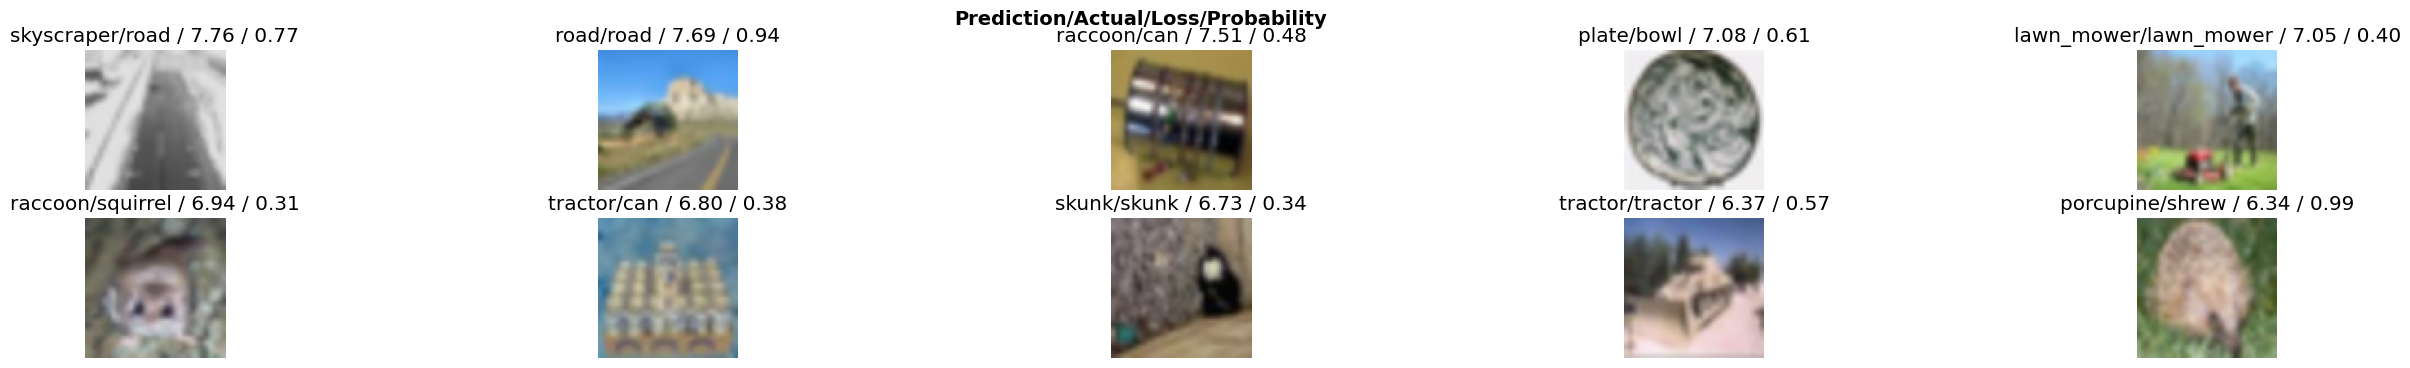

In [ ]:
# Mostrar las 10 clases del conjunto de entrenamiento con el mayor nivel de confusión
interp_train.plot_top_losses(10, nrows = 2, figsize = (32,4))

La discrepancia en los valores de accuracy en el conjunto de entrenamiento entre los dos bloques de código (uno a partir de las predicciones y otro mediante la matriz de confusión) es posible que se deba a pequeñas diferencias en la implementación interna de las funciones de FastAI a la hora de calcular dicho accuracy con respecto a la forma en que se calcula en el segundo bloque a través de la matriz de confusión. También puede ser que  los resultados difieran ligeramente debido a redondeos y representación numérica.



In [ ]:
# Definición del DataLoad para el conjunto de datos de prueba (test)
final_test_CIFAR100dl = final_learn.dls.test_dl(files_test, with_labels = True)

# Generación de predicciones del modelo entrenado en el conjunto de test
preds, targs, _ = final_learn.get_preds(dl = final_test_CIFAR100dl, with_decoded = True)

# Accuracy en el conjunto de test
acc_test = accuracy(preds, targs)
print('\nACCURACY en el conjunto TEST: ', round(float(acc_test) * 100, 4), '%')


ACCURACY en el conjunto TEST:  72.44 %



Número de ejemplos de test: 2500



ACCURACY en el conjunto TEST:  72.44 %


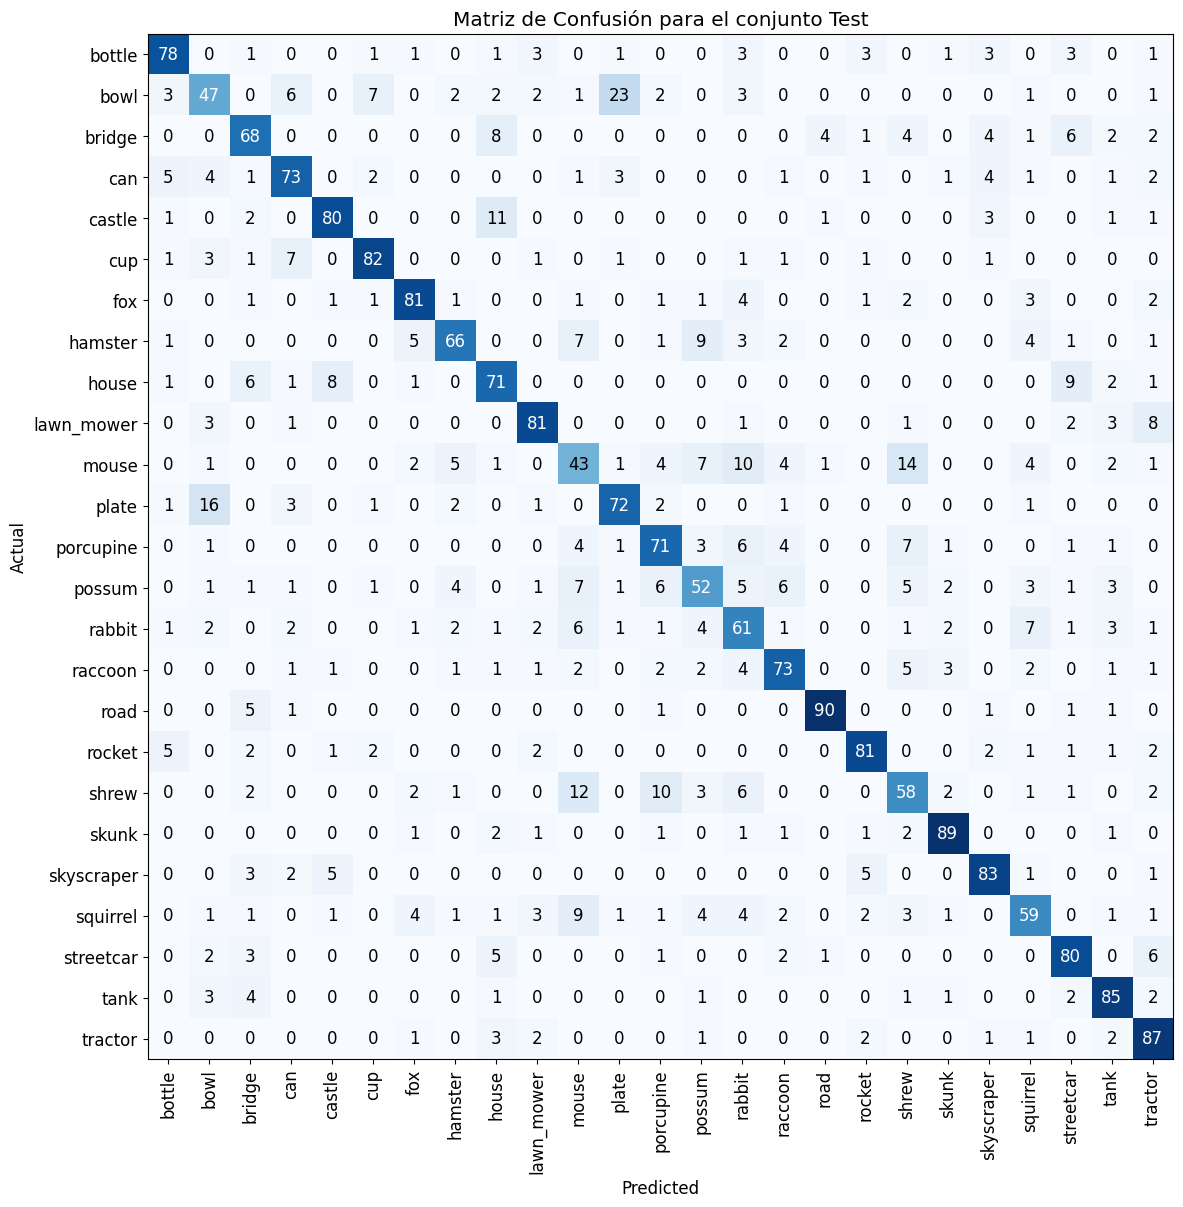

In [ ]:
# Matriz de confusión del conjunto de test
interp_test = ClassificationInterpretation.from_learner(final_learn, 1, final_test_CIFAR100dl)
cm_test = interp_test.confusion_matrix()

print('\nNúmero de ejemplos de test:', np.sum(cm_test))
interp_test.plot_confusion_matrix(figsize = (12, 12), title = 'Matriz de Confusión para el conjunto Test')
print('\nACCURACY en el conjunto TEST: ', round(np.sum(np.diagonal(cm_test)) / np.sum(cm_test) * 100, 4), '%')

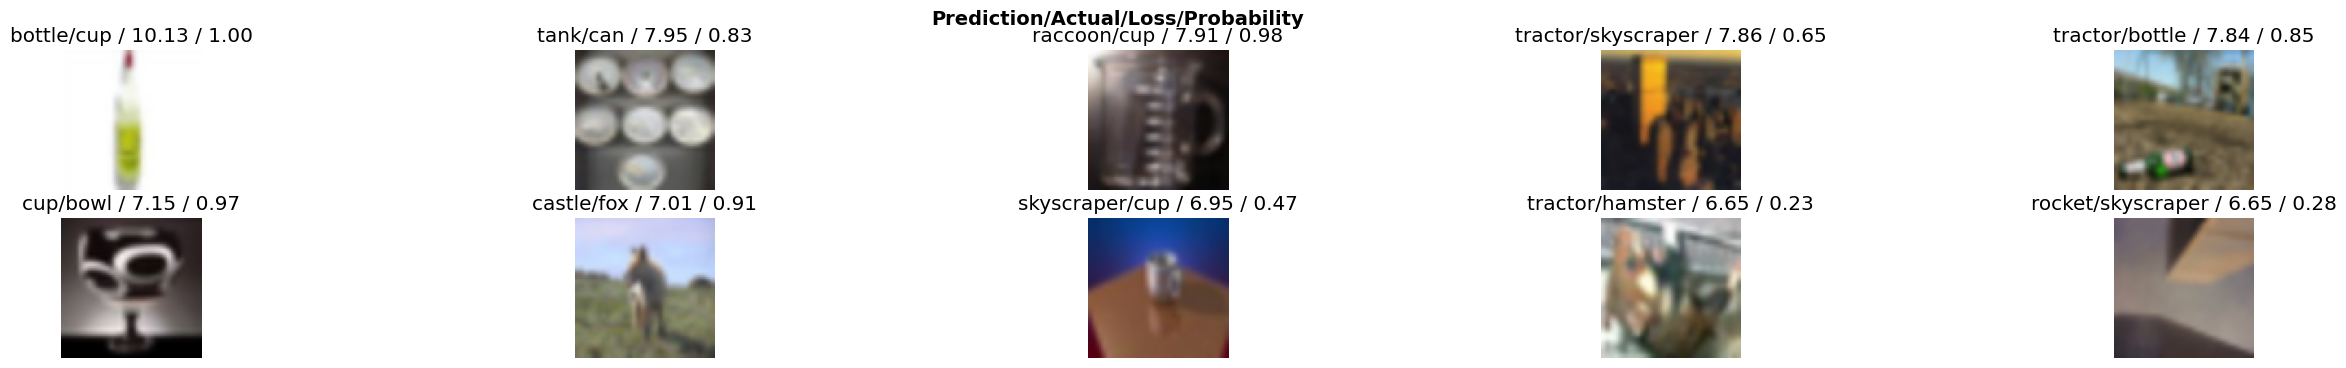

In [ ]:
# Mostrar las 10 clases del conjunto de test con el mayor nivel de confusión
interp_test.plot_top_losses(10, nrows = 2, figsize = (32,4))

### **2.7.5. Análisis de los Resultados**

Los resultados obtenidos por el modelo final son los siguientes:

- Loss en Training: 0.655681

- Accuracy en Training: 0.829067

- Loss en Validation: 0.893603

- Accuracy en Validation: 0.724800

- Accuracy en Test: 0.7244

Recordemos los resultados obtenidos por el modelo del ejercicio 1:

- Loss en Training: 2.091269

- Accuracy en Training: 0.366489

- Loss en Validation: 2.194186

- Accuracy en Validation: 0.34

- Accuracy en Test: 0.336

Si comparamos ambos modelos, se observa que:

- El modelo mejorado muestra un aumento significativo (un poco más del doble) en el accuracy del conjunto de validación. Mientras que el modelo original tenía un accuracy final del 34%, el modelo final ha logrado alcanzar un 72.48%.

- En ambos modelos, el loss en ambos conjuntos (entrenamiento y validación) disminuye considerablemente a lo largo de las épocas, indicando una buena capacidad de los modelos para aprender y generalizar. Sin embargo, dicha capacidad es mejor en el modelo final ya que la brecha entre el loss de entrenamiento y el loss de validación parece haber disminuido en el modelo final en comparación con el modelo original. Por tanto, se ha reducido el sobreajuste (overfitting) en el modelo final, consiguiendo así una mejora en la capacidad de generalización.

En conclusión, tal y como se esperaba, los resultados sugieren que las técnicas aplicadas, han tenido un impacto positivo en la capacidad del modelo para aprender y generalizar. El accuracy significativamente mayor en el conjunto de validación y la reducción del sobreajuste (overfitting) indican una mejora en el rendimiento del modelo.